### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt 

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline 

###  Datasets to be studied
 I) Confirmed Cases Dataset of COVID-19
 
 II) Death Cases Dataset of COVID-19
 
 III) Recovered Cases Dataset of COVID-19
 
 IV)Testing Dataset of COVID-19
 
 V) INFORM Risk Index dataset

####  Confirmed Cases of COVID-19 

In [3]:
# import os
# os.chdir('/kaggle/working')
# os.getcwd()
# print(os.listdir("../input"))

##### Reading data from the Source and dropping not required columns

In [4]:
# Importing  Confirmed Cases Dataset
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed = pd.read_csv(url_confirmed, index_col="Country/Region")
# df_confirmed = pd.read_csv("../input/covid19time-series-data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv",
#                           header = 0, index_col="Country/Region")
df_confirmed.drop(['Lat', 'Long' ], axis=1, inplace=True)
df_confirmed.head(3)


,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981
Albania,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570
Algeria,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872,25484,26159


##### Data Preprocessing for the dataset I

In [5]:
# Country grouping on original dataframe        
gr_confirmed = df_confirmed.groupby("Country/Region").sum()
gr_confirmed.head(3)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872,25484,26159


In [6]:
# Checking for the missing values in the Confirmed Cases dataset

gr_confirmed.isnull().sum().sum()
gr_confirmed.isna().sum().sum()

# Hence, there are no missing values in our Confirmed Cases data. 

0

##### Shifting all data to one starting point & converting the Dates format to Days

Converting the Dates format to Days to bring all countries data to start from 1 starting point "Day1: 1"
Day1: 1,  is the day on which the confirmed cases for the country got greater than or equal to 10 

In [7]:
# Adding data for China (1-Jan to 21-Jan from a China CDC publication)
lab=[]
for i in range(1,22):
    lab.append("1/" + str(i) + "/20")
    gr_confirmed.insert(loc=i-1,column=lab[i-1], value=0)
gr_confirmed.loc["China"][0:10] = 20
gr_confirmed.loc["China"][10:21] = 310

# Remove Diamond princess and MS Zaandam
gr_confirmed = gr_confirmed.drop(["Diamond Princess", "MS Zaandam"])

gr_confirmed1= gr_confirmed.copy() # To have a copy of Confirmed Cases dataset in date format because ahead we are going to transform the data to days format
gr_confirmed1 = gr_confirmed1.reset_index()
# gr_confirmed.head(3)

# Dates are converted into no of days since 1/1/20 so that 1/1/20 corresponds to day 1
gr_confirmed_melt = gr_confirmed
dates = gr_confirmed_melt.keys()
FMT = '%m/%d/%y'

days = dates.map(lambda x: (datetime.strptime(x, FMT) - datetime.strptime("1/1/20", FMT)).days)

days = days + 1 # +1 is to start the days from 1 instead of 0

gr_confirmed_melt.columns = days # = dates will convert the columns to date formats again

x_lag = gr_confirmed_melt.ge(10).idxmax(axis=1) # x_lag gives position of first value in each row which is greater than or equal to 10

for i in range(gr_confirmed_melt.shape[0]): # gr_confirmed_melt.shape[0] = 187 (no. of rows) and gr_confirmed_melt.shape[1] = 138 (no. of columns)
    gr_confirmed_melt.iloc[i] = gr_confirmed_melt.iloc[i].shift(periods=-x_lag[i]+1) # all data shift to one starting point 
# gr_confirmed_melt.head(3)

# Melting our Confirmed Cases dataset

gr_confirmed_melt = gr_confirmed_melt.reset_index()
gr_confirmed_melt = pd.melt(gr_confirmed_melt,id_vars= "Country/Region", 
                       value_vars=days, var_name="Days", 
                       value_name="Cumulative Confirmed Count").sort_values(["Country/Region","Days"])

gr_confirmed_melt.set_index("Country/Region", inplace = True)
# gr_confirmed_melt.shape
gr_confirmed_melt.head(5)

,Days,Cumulative Confirmed Count
Country/Region,,
Afghanistan,1,11.0
Afghanistan,2,16.0
Afghanistan,3,21.0
Afghanistan,4,22.0
Afghanistan,5,22.0


#### Deaths due to COVID-19 

##### Reading data from the source and removing not required columns

In [8]:
# Importing Deaths Dataset
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_death = pd.read_csv(url_death, index_col="Country/Region")
# df_death = pd.read_csv('../input/covid19time-series-data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv', 
#                        header = 0, index_col="Country/Region")
df_death.drop(['Lat', 'Long'], axis=1, inplace=True)
df_death.head(3)

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675,683,703,721,733,746,774,807,819,826,864,898,920,936,957,971,994,1010,1012,1048,1094,1113,1147,1164,1181,1185,1186,1190,1211,1225
Albania,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49,51,53,55,58,62,65,69,72,74,76,79,81,83,83,85,89,93,95,97,101,104,107,111,112,113,117,120,123,128
Algeria,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760,767,777,788,799,811,825,837,845,852,861,869,878,885,892,897,905,912,920,928,937,946,952,959,968,978,988,996,1004,1011,1018,1028,1040,1052,1057,1068,1078,1087,1100,1111,1124,1136


##### Data Preprocessing 

In [9]:
# Country grouping on original dataframe        
gr_death = df_death.groupby("Country/Region").sum()
gr_death.head(3)

# # Now adding Australian dataframe
# gr_death = pd.concat([gr_death, Aust_death])

# Adding data for China (1-Jan to 20-Jan) 
lab=[]
for i in range(1,22):
    lab.append("1/" + str(i) + "/20")
    gr_death.insert(i-1,lab[i-1],0)
gr_death.loc["China"][0:10] = 1
gr_death.loc["China"][10:21] = 1

# Remove Diamond princess
gr_death = gr_death.drop(["Diamond Princess", "MS Zaandam"])
# gr_death.to_csv("C:/Users/user/Downloads/COVID-19 Related Info/Deaths.csv")

gr_death1 = gr_death.copy() # To have a copy of death dataset in date format because ahead we are going to transform the data to days format
gr_death1 = gr_death1.reset_index()
# gr_death1.to_csv("C:/Users/user/Downloads/COVID-19 Related Info/Created Files/Deaths_datewise.csv")

gr_death.head(3)

,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,1/7/20,1/8/20,1/9/20,1/10/20,1/11/20,1/12/20,1/13/20,1/14/20,1/15/20,1/16/20,1/17/20,1/18/20,1/19/20,1/20/20,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675,683,703,721,733,746,774,807,819,826,864,898,920,936,957,971,994,1010,1012,1048,1094,1113,1147,1164,1181,1185,1186,1190,1211,1225
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49,51,53,55,58,62,65,69,72,74,76,79,81,83,83,85,89,93,95,97,101,104,107,111,112,113,117,120,123,128
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760,767,777,788,799,811,825,837,845,852,861,869,878,885,892,897,905,912,920,928,937,946,952,959,968,978,988,996,1004,1011,1018,1028,1040,1052,1057,1068,1078,1087,1100,1111,1124,1136


In [10]:
# Checking for the missing values in the death Cases dataset

gr_death.isnull().sum().sum()
gr_death.isna().sum().sum()

# Hence, there are no missing values in our death Cases data. 

0

##### Shifting all data to one starting point & converting the Dates format to Days
Converting the Dates format to Days to bring all countries data to start from 1 starting point "Day1: 1"
Day1: 1,  is the day on which the confirmed cases for the country got greater than or equal to 5 

In [11]:
# Dates are converted into no of days since 1/1/20 so that 1/1/20 corresponds to day 1
gr_death_melt = gr_death
dates = gr_death_melt.keys()
FMT = '%m/%d/%y'

days = dates.map(lambda x: (datetime.strptime(x, FMT) - datetime.strptime("1/1/20", FMT)).days)
days = days + 1
# +1 is to start the days from 1 instead of 0

gr_death_melt.columns = days # = dates will convert the columns to date formats again

x_lag  # x_lag gives position of first value in each row which is greater than or equal to 5 in confirmed cases dataset

for i in range(gr_death_melt.shape[0]): # gr_death_melt.shape[0] = 187 (no. of rows) and gr_death_melt.shape[1] = 138 (no. of columns)
    gr_death_melt.iloc[i] = gr_death_melt.iloc[i].shift(periods=-x_lag[i]+1) # all data shift to one starting point 
# gr_death_melt.head(3)

# Melting our Confirmed Cases dataset

gr_death_melt = gr_death_melt.reset_index()
gr_death_melt = pd.melt(gr_death_melt,id_vars= "Country/Region", 
                       value_vars=days, var_name="Days", 
                       value_name="Cumulative Death Count").sort_values(["Country/Region","Days"])

gr_death_melt.set_index("Country/Region", inplace = True)
# gr_death_melt.to_csv("C:/Users/user/Downloads/COVID-19 Related Info/Created Files/Deaths_daywise_melted.csv")
# gr_death_melt.shape
gr_death_melt.head(5)

,Days,Cumulative Death Count
Country/Region,,
Afghanistan,1,0.0
Afghanistan,2,0.0
Afghanistan,3,0.0
Afghanistan,4,0.0
Afghanistan,5,0.0


#### Recovered Cases of COVID-19

##### Reading data from the source and dropping not required columns

In [12]:
# Importing dataset for Recovered Cases
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
df_recovered = pd.read_csv(url_recovered, index_col="Country/Region")
# df_recovered = pd.read_csv("../input/covid19time-series-data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv",
#                            header = 0, index_col="Country/Region")

df_recovered.drop(['Lat', 'Long'], axis=1, inplace=True)
df_recovered.head(3)


,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179,188,188,207,220,228,252,260,310,331,345,397,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454,22456,22824,23151,23273,23634,23741,23741,23924,24550,24602
Albania,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327,345,356,385,394,403,410,422,431,455,470,488,519,531,543,570,595,605,620,627,650,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014,2062,2091,2137,2214,2264,2311,2352,2397,2463,2523,2608
Algeria,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61,62,90,90,90,113,237,347,405,460,591,601,691,708,783,846,894,1047,1099,1152,1204,1355,1408,1479,1508,1558,1651,1702,1779,1821,1872,1936,1998,2067,2197,2323,2467,2546,2678,2841,2998,3058,3158,3271,3409,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748,5894,6067,6218,6297,6453,6631,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842,7943,8078,8196,8324,8422,8559,8674,8792,8920,9066,9202,9371,9674,9897,10040,10342,10832,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019,14295,14792,15107,15430,15744,16051,16400,16646,16983,17369,17369


##### Data Prepocessing 

In [13]:
# Country grouping on original dataframe        
gr_recovered = df_recovered.groupby("Country/Region").sum()

# Now adding Australian dataframe
# gr_death = pd.concat([gr_death, Aust_death])

# Adding data for China (1-Jan to 20-Jan) 
lab=[]
for i in range(1,22):
    lab.append("1/" + str(i) + "/20")
    gr_recovered.insert(i-1,lab[i-1],0)
gr_recovered.loc["China"][0:10] = 0
gr_recovered.loc["China"][10:21] = 0

# Remove Diamond princess
gr_recovered = gr_recovered.drop(["Diamond Princess", "MS Zaandam"])

# Adding the prefix to  all columns of Deaths dataset columns, which are dates to distingish them 
# from dates under Confirmed Cases dataset columns which are also same dates.
# gr_recovered = gr_recovered.add_prefix("Recovered Cases on ")
# gr_recovered.to_csv("C:/Users/user/Downloads/COVID-19 Related Info/Recovered.csv")
gr_recovered1 = gr_recovered.copy()  # To have a copy of Recovered Cases dataset in date format because ahead we are going to transform the data to days format
gr_recovered1 = gr_recovered1.reset_index()
# gr_recovered1.to_csv("C:/Users/user/Downloads/COVID-19 Related Info/Created Files/Recovered_datewise.csv")

# gr_recovered.shape
gr_recovered.head(3)

,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,1/7/20,1/8/20,1/9/20,1/10/20,1/11/20,1/12/20,1/13/20,1/14/20,1/15/20,1/16/20,1/17/20,1/18/20,1/19/20,1/20/20,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179,188,188,207,220,228,252,260,310,331,345,397,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454,22456,22824,23151,23273,23634,23741,23741,23924,24550,24602
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327,345,356,385,394,403,410,422,431,455,470,488,519,531,543,570,595,605,620,627,650,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014,2062,2091,2137,2214,2264,2311,2352,2397,2463,2523,2608
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61,62,90,90,90,113,237,347,405,460,591,601,691,708,783,846,894,1047,1099,1152,1204,1355,1408,1479,1508,1558,1651,1702,1779,1821,1872,1936,1998,2067,2197,2323,2467,2546,2678,2841,2998,3058,3158,3271,3409,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748,5894,6067,6218,6297,6453,6631,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842,7943,8078,8196,8324,8422,8559,8674,8792,8920,9066,9202,9371,9674,9897,10040,10342,10832,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019,14295,14792,15107,15430,15744,16051,16400,16646,1

In [14]:
# Checking for the missing values in the Recovered Cases dataset

gr_recovered.isnull().sum().sum()
gr_recovered.isna().sum().sum()

# Hence, there are no missing values in our Recovered Cases data. 

0

##### Shifting all data to one starting point & converting the Dates format to Days
Converting the Dates format to Days to bring all countries data to start from 1 starting point "Day1: 1"
Day1: 1,  is the day on which the confirmed cases for the country got greater than or equal to 10 

In [15]:
# Dates are converted into no of days since 1/1/20 so that 1/1/20 corresponds to day 1
gr_recovered_melt = gr_recovered
dates = gr_recovered_melt.keys()
FMT = '%m/%d/%y'

days = dates.map(lambda x: (datetime.strptime(x, FMT) - datetime.strptime("1/1/20", FMT)).days)

days = days + 1
# +1 is to start the days from 1 instead of 0

gr_recovered_melt.columns = days # = dates will convert the columns to date formats again

x_lag # x_lag gives position of first value in each row which is greater than or equal to 5 in confirmed cases data

for i in range(gr_recovered_melt.shape[0]): # gr_recovered_melt.shape[0] = 187 (no. of rows) and gr_recovered_melt.shape[1] = 138 (no. of columns)
    gr_recovered_melt.iloc[i] = gr_recovered_melt.iloc[i].shift(periods=-x_lag[i]+1) # all data shift to one starting point 
gr_recovered_melt.head(3)

#### Melting our Confirmed Cases dataset

gr_recovered_melt = gr_recovered_melt.reset_index()
gr_recovered_melt = pd.melt(gr_recovered_melt,id_vars= "Country/Region", 
                       value_vars=days, var_name="Days", 
                       value_name="Cumulative Recovered Count").sort_values(["Country/Region","Days"])

gr_recovered_melt.set_index("Country/Region", inplace = True)
# gr_recovered_melt.to_csv("C:/Users/user/Downloads/COVID-19 Related Info/Created Files/Recovered_daywise_melted.csv")
# gr_recovered_melt.shape
gr_recovered_melt.head(5)

,Days,Cumulative Recovered Count
Country/Region,,
Afghanistan,1,0.0
Afghanistan,2,0.0
Afghanistan,3,1.0
Afghanistan,4,1.0
Afghanistan,5,1.0


#### Importing Dataset for Testing of COVID-19 

##### Reading data from the source

In [16]:
url_test= 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv'
        
df_test = pd.read_csv(url_test)
#                       , index_col="Entity")
df_test.head(2)

,Entity,ISO code,Date,Source URL,Source label,Notes,Daily change in cumulative total,Cumulative total,Cumulative total per thousand,Daily change in cumulative total per thousand,7-day smoothed daily change,7-day smoothed daily change per thousand
0,Argentina - people tested,ARG,2020-02-11,https://datos.gob.ar/dataset/salud-covid-19-ca...,Government of Argentina,NaN,2.0,2.0,0.0,0.0,NaN,NaN
1,Argentina - people tested,ARG,2020-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Data Preprocessing for the dataset IV

In [17]:
df_test.shape

(13035, 12)

In [18]:
df_test.columns

Index(['Entity', 'ISO code', 'Date', 'Source URL', 'Source label', 'Notes',
       'Daily change in cumulative total', 'Cumulative total',
       'Cumulative total per thousand',
       'Daily change in cumulative total per thousand',
       '7-day smoothed daily change',
       '7-day smoothed daily change per thousand'],
      dtype='object')

###### Changing the "Date" column from object type to type datetime and then changing it to the format present in Confirmed Cases/ Deaths/Recovered Cases datasets for "Dates"

In [19]:
# Changing the "Date" column from object type to type datetime
df_test['Date'] = df_test['Date'].astype('datetime64[ns]')    

# Changing the format of the "Date" column to the one matching the dates in Confirmed Cases/Deaths and Recovered Cases datasets.
df_test['Date'] = df_test['Date'].dt.strftime('%m/%d/%y')
df_test.dtypes

Entity                                            object
ISO code                                          object
Date                                              object
Source URL                                        object
Source label                                      object
Notes                                             object
Daily change in cumulative total                 float64
Cumulative total                                 float64
Cumulative total per thousand                    float64
Daily change in cumulative total per thousand    float64
7-day smoothed daily change                      float64
7-day smoothed daily change per thousand         float64
dtype: object

###### Removing the not required columns for the analysis from the testing data

In [20]:
df_test.drop(['ISO code','Source URL', 'Source label', 'Notes',
#               'Cumulative total',
#               'Daily change in cumulative total',
              'Cumulative total per thousand',
              'Daily change in cumulative total per thousand'], axis=1, inplace=True)
#               '7-day smoothed daily change',
#               7-day smoothed daily change per thousand,], 

###### Selecting the sources/ type of testing data for the countries which have more than 1 source of information

Tests may refer to the number of tests performed, samples tested or the number of people tested – depending on which is reported by the particular country. For some countries the source have tests performed and people tested counts mixed too and thereby provide figures under the name 
"units unclear". Also some of the countries have more than 1 source of reporting testing data and it is seen that different sources can provide data under different categories. For example, for India <i>Source 1</i>provides figures for people tested and <i>Source 2</i> provides data for samples tested. 

Hence, comparisons of testing data across countries are affected by differences in the way the data are reported. For our analysis, the source for the countries for which there is more than one source is chosen based on better consistency of data reporting and/or the type of comparison we are making during the analysis.

Also,since not all countries report testing data on a daily basis. So to generate daily series it is assumed that testing changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window.

In [21]:
df_test = df_test.drop(df_test[df_test["Entity"].isin(['India - people tested',
              'France - tests performed',
              'Italy - people tested',
              'Japan - tests performed',
              'Poland - people tested',
              'Singapore - people tested',
              'Sweden - people tested',
              'United States - tests performed (CDC) (incl. non-PCR)'
              ])].index)

In [22]:
df_test.head(5)

,Entity,Date,Daily change in cumulative total,Cumulative total,7-day smoothed daily change,7-day smoothed daily change per thousand
0,Argentina - people tested,02/11/20,2.0,2.0,NaN,NaN
1,Argentina - people tested,02/12/20,NaN,NaN,NaN,NaN
2,Argentina - people tested,02/13/20,NaN,NaN,NaN,NaN
3,Argentina - people tested,02/14/20,NaN,NaN,NaN,NaN
4,Argentina - people tested,02/15/20,NaN,NaN,NaN,NaN


###### Changing the name columns for better understanding and convenience

In [23]:
# Modifying the name of the "Entity" column to "Country/Region" as in confirmed and deaths datasets to join them using same 
# column with same name
# And renaming other columns to be more informative
df_test= df_test.rename(columns={"Entity":"Country/Region","Cumulative total": "Cumulative Testing Count",
                                "Daily change in cumulative total": "Daily Testing Count",
                                "7-day smoothed daily change": "7-day smoothed daily change in testing",
                                "7-day smoothed daily change per thousand":"7-day smoothed daily change per thousand in testing"
                                }) 
df_test.head(3)

,Country/Region,Date,Daily Testing Count,Cumulative Testing Count,7-day smoothed daily change in testing,7-day smoothed daily change per thousand in testing
0,Argentina - people tested,02/11/20,2.0,2.0,NaN,NaN
1,Argentina - people tested,02/12/20,NaN,NaN,NaN,NaN
2,Argentina - people tested,02/13/20,NaN,NaN,NaN,NaN


In [24]:
# b) To get the country name from the value under Entity column like: "Argentina" from "Argentina - tests performed"
df_test["Country/Region"]= df_test["Country/Region"].str.split(" -", n=1, expand=True)
df_test.head(3)

,Country/Region,Date,Daily Testing Count,Cumulative Testing Count,7-day smoothed daily change in testing,7-day smoothed daily change per thousand in testing
0,Argentina,02/11/20,2.0,2.0,NaN,NaN
1,Argentina,02/12/20,NaN,NaN,NaN,NaN
2,Argentina,02/13/20,NaN,NaN,NaN,NaN


###### Creating separate datasets for Cumulative total, Daily change in cumulative total, 7-day smoothed daily change, 7-day smoothed daily change per thousand

In [25]:
df_test1 = df_test[["Country/Region", "Date", "Cumulative Testing Count"]]
df_test2 = df_test[["Country/Region", "Date", "Daily Testing Count"]]
df_test3 = df_test[["Country/Region", "Date", "7-day smoothed daily change in testing"]]
df_test4 = df_test[["Country/Region", "Date", "7-day smoothed daily change per thousand in testing"]]
data = [df_test1, df_test2, df_test3, df_test4]

###### Unmelting the Testing data such that the individual dates form the separate columns

In [26]:
index = ["Cumulative Testing Count", "Daily Testing Count", "7-day smoothed daily change in testing", "7-day smoothed daily change per thousand in testing"]
df_unmelted = []
for i, df in enumerate(data):
    df_test_unmelted = []
    df_test_unmelted = df.pivot_table(index="Country/Region", columns='Date')
    df_test_unmelted = df_test_unmelted[index[i]].reset_index()
    df_test_unmelted.columns.name = None
    df_unmelted.append(df_test_unmelted)

In [27]:
df_unmelted[0].head()

,Country/Region,01/01/20,01/02/20,01/03/20,01/04/20,01/05/20,01/06/20,01/07/20,01/08/20,01/09/20,01/10/20,01/11/20,01/12/20,01/13/20,01/14/20,01/15/20,01/16/20,01/17/20,01/18/20,01/19/20,01/20/20,01/21/20,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,02/01/20,02/02/20,02/03/20,02/04/20,02/05/20,02/06/20,02/07/20,02/08/20,02/09/20,02/10/20,02/11/20,02/12/20,02/13/20,02/14/20,02/15/20,02/16/20,02/17/20,02/18/20,02/19/20,02/20/20,02/21/20,02/22/20,02/23/20,02/24/20,02/25/20,02/26/20,02/27/20,02/28/20,02/29/20,03/01/20,03/02/20,03/03/20,03/04/20,03/05/20,03/06/20,03/07/20,03/08/20,03/09/20,03/10/20,03/11/20,03/12/20,03/13/20,03/14/20,03/15/20,03/16/20,03/17/20,03/18/20,03/19/20,03/20/20,03/21/20,03/22/20,03/23/20,03/24/20,03/25/20,03/26/20,03/27/20,03/28/20,03/29/20,03/30/20,03/31/20,04/01/20,04/02/20,04/03/20,04/04/20,04/05/20,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20,05/28/20,05/29/20,05/30/20,05/31/20,06/01/20,06/02/20,06/03/20,06/04/20,06/05/20,06/06/20,06/07/20,06/08/20,06/09/20,06/10/20,06/11/20,06/12/20,06/13/20,06/14/20,06/15/20,06/16/20,06/17/20,06/18/20,06/19/20,06/20/20,06/21/20,06/22/20,06/23/20,06/24/20,06/25/20,06/26/20,06/27/20,06/28/20,06/29/20,06/30/20,07/01/20,07/02/20,07/03/20,07/04/20,07/05/20,07/06/20,07/07/20,07/08/20,07/09/20,07/10/20,07/11/20,07/12/20,07/13/20,07/14/20,07/15/20,07/16/20,07/17/20,07/18/20,07/19/20,07/20/20,07/21/20,07/22/20,07/23/20,07/24/20
0,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,5.0,NaN,10.0,19.5,NaN,NaN,24.5,32.0,38.0,45.0,55.5,64.0,91.0,103.5,132.0,165.0,209.0,293.5,342.5,422.0,525.0,649.0,845.5,989.0,1212.0,1521.0,1753.0,2023.5,2440.0,2937.0,3472.0,3880.5,4328.0,4999.5,5596.5,6227.0,7221.5,8630.0,10026.5,11228.5,12144.0,13340.0,14880.0,16600.5,18216.0,19693.0,21230.0,22477.0,24096.0,25937.5,27870.5,29893.5,31824.5,33672.0,35012.0,37043.0,39607.5,41910.5,44354.0,47097.0,49354.0,50899.5,52906.0,55296.0,58001.0,60483.0,62705.0,64380.5,65838.5,67918.0,70613.0,73081.0,75689.0,78066.0,80267.5,81886.0,84556.0,87303.0,90329.0,93185.0,96320.0,99023.5,101027.0,104104.5,108266.5,112372.5,116657.0,121044.0,124443.5,127076.5,130272.5,134021.0,138404.5,143037.0,148144.0,152119.0,154974.0,159016.5,163528.0,168790.5,173647.0,178856.0,183710.0,186497.0,191422.0,197137.5,203082.0,209403.0,216434.0,222734.5,226765.5,231442.5,237397.5,244727.0,252601.0,260491.0,268395.0,273181.0,280541.5,289549.5,298259.5,307644.5,317378.5,325364.5,330480.5,338512.5,347100.0,355779.5,364426.5,373997.0,383087.5,388456.0,396841.0,406529.0,418016.5,428377.0,437889.0,446832.0,452920.0,462523.0,474136.5,485773.5,497248.5,509770.0,520080.5,527556.5,538065.5,550037.5,561137.5,NaN,NaN
1,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143056.0,NaN,NaN,NaN,NaN,NaN,NaN,211261.0,NaN,NaN,NaN,NaN,NaN,NaN,297154.0,302663.0,310700.0,319368.0,330134.0,338346.0,347847.0,353941.0,362136.0,366493.0,371377.0,380003.0,391530.0,406510.0,420996.0,431734.0,439842.0,452441.0,466659.0,482370.0,494257.0,506449.0,517063.0,530679.0,544410.0,563641.0,588868.0,611583.0,633107.0,650214.0,664756.0,688656.0,722549.0,757250.0,79

Every country has "Testing" data available from different dates but on pivoting dates start from 01/01/20 or all countries because one of the countries "Mexico" has the testing data available from this date (the earliest date amongst all countries). So as a result of pivoting, the date columns start from this date. And we will have null values for every other country from 01/01/20 till the date on which the country had testing data reported for the first time. For example for "Argentina" the testing data is available from 04/08/20, so we see "NaN" values from 01/01/20 to 04/07/20. Same is true for other countries. 

###### "7-day smoothed daily change" and 	"7-day smoothed daily change per thousand" start from 08/01/20 instead of 01/01/20 (because week starting on 01/01/20 ends on 07/01/20. But to have same number of dates in all testing dataframes (which is equal to dates in confirmed/deaths and recovered datasets) we insert the dates from 01/01/20 to 07/01/20 in these dataframes.

In [28]:
for index in range(2,4):
    lab=[]
    for i in range(1,8):
        df_unmelted[index] = df_unmelted[index].set_index("Country/Region")
        lab.append("01/0" + str(i) + "/20")
        df_unmelted[index].insert(loc=i-1,column=lab[i-1], value=np.nan)
        df_unmelted[index] = df_unmelted[index].reset_index()
        
df_unmelted[3].head()    

,Country/Region,01/01/20,01/02/20,01/03/20,01/04/20,01/05/20,01/06/20,01/07/20,01/08/20,01/09/20,01/10/20,01/11/20,01/12/20,01/13/20,01/14/20,01/15/20,01/16/20,01/17/20,01/18/20,01/19/20,01/20/20,01/21/20,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,02/01/20,02/02/20,02/03/20,02/04/20,02/05/20,02/06/20,02/07/20,02/08/20,02/09/20,02/10/20,02/11/20,02/12/20,02/13/20,02/14/20,02/15/20,02/16/20,02/17/20,02/18/20,02/19/20,02/20/20,02/21/20,02/22/20,02/23/20,02/24/20,02/25/20,02/26/20,02/27/20,02/28/20,02/29/20,03/01/20,03/02/20,03/03/20,03/04/20,03/05/20,03/06/20,03/07/20,03/08/20,03/09/20,03/10/20,03/11/20,03/12/20,03/13/20,03/14/20,03/15/20,03/16/20,03/17/20,03/18/20,03/19/20,03/20/20,03/21/20,03/22/20,03/23/20,03/24/20,03/25/20,03/26/20,03/27/20,03/28/20,03/29/20,03/30/20,03/31/20,04/01/20,04/02/20,04/03/20,04/04/20,04/05/20,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20,05/28/20,05/29/20,05/30/20,05/31/20,06/01/20,06/02/20,06/03/20,06/04/20,06/05/20,06/06/20,06/07/20,06/08/20,06/09/20,06/10/20,06/11/20,06/12/20,06/13/20,06/14/20,06/15/20,06/16/20,06/17/20,06/18/20,06/19/20,06/20/20,06/21/20,06/22/20,06/23/20,06/24/20,06/25/20,06/26/20,06/27/20,06/28/20,06/29/20,06/30/20,07/01/20,07/02/20,07/03/20,07/04/20,07/05/20,07/06/20,07/07/20,07/08/20,07/09/20,07/10/20,07/11/20,07/12/20,07/13/20,07/14/20,07/15/20,07/16/20,07/17/20,07/18/20,07/19/20,07/20/20,07/21/20,07/22/20,07/23/20,07/24/20
0,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.0005,0.001,0.001,0.001,0.001,0.002,0.002,0.0025,0.003,0.004,0.004,0.005,0.0055,0.0065,0.0075,0.0085,0.009,0.010,0.011,0.012,0.0135,0.0165,0.0195,0.022,0.023,0.0245,0.0275,0.0295,0.030,0.0305,0.0315,0.0325,0.034,0.035,0.0355,0.0365,0.0385,0.0395,0.0395,0.0405,0.043,0.044,0.046,0.048,0.0495,0.050,0.050,0.050,0.051,0.051,0.049,0.0475,0.047,0.047,0.0485,0.0475,0.048,0.0485,0.050,0.051,0.0525,0.053,0.0545,0.055,0.058,0.059,0.0605,0.062,0.066,0.0695,0.074,0.078,0.0805,0.0825,0.0825,0.0815,0.0825,0.0835,0.0855,0.0875,0.088,0.0905,0.093,0.096,0.0965,0.0975,0.100,0.100,0.1025,0.1065,0.1085,0.113,0.119,0.1235,0.127,0.1265,0.1275,0.1315,0.137,0.139,0.1445,0.1465,0.155,0.165,0.169,0.174,0.1795,0.180,0.181,0.183,0.182,0.1815,0.1795,0.1785,0.1825,0.1835,0.1845,0.1875,0.1965,0.202,0.202,0.2015,0.2035,0.2075,0.2135,0.214,0.218,0.227,0.2315,0.236,0.2385,0.2395,0.2385,NaN,NaN
1,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.382,0.396,0.410,0.4250,0.4390,0.4530,0.467,0.481,0.4430,0.4200,0.3990,0.391,0.3680,0.3530,0.3180,0.333,0.313,0.2910,0.2790,0.2980,0.3290,0.3760,0.3900,0.411,0.454,0.485,0.509,0.4920,0.479,0.478,0.509,0.515,0.543,0.597,0.6570,0.710,0.746,0.7510,0.8080,0.890,0.9430,1.030,1.091,1.1480,1.194,1.2350,1.238,1.269,1.234,1.2000,1.159,1.165,1.1350,1.088,1.047,0.9890,1.0230,1.0210,1.1340,1.2700,1.2870,1.2710,1.3240,1.287,1.2770,1.133,0.977,1.0020,1.0170,0.908,0.913,0.9040,0.8980,0.9370,0.924,0.932,1.0760,1.092,1.0900,1.1070,1.0990,1.212,1.259,1.2480,1.2830,1.567,1.594,1.705,1.708,1.

###### Filling Missing values with appropriate values

In [29]:
##### 5a)

# The testing data is not available for all dates for the countries, even after getting first non empty observation for the 
# country for its testing data there are further dates for which no data is available.
# For example for Argenina testing data is available from Apr 8,2020 till present date but is in between missing for some dates
# like April 12, 2020, for Australia first observation on March 22, 2020 but no data till March 28th after that and similarly for 
# other countries. 
# So we will fill those empty values with the previous non-zero values as follows.

# df_test_unmelted.mask(df_test_unmelted.iloc[:, 1:] == 0).ffill(downcast='infer', axis=1, inplace = True)
# for df in df_unmelted:
#     df.iloc[:, 1:] = df.iloc[:, 1:].fillna(method='ffill', downcast='infer', axis=1)
# df_unmelted[0].head(3)

In [30]:
##### 5b)

# Now filling the remaining missing values which are before the first non-zero values for any country with zeroes
# for df in df_unmelted:
#     df.fillna(0, inplace=True)
# df_unmelted[0].head(3)

###### Preparing the testing data to be merged with the "Confirmed Cases"/"Deaths"/"Recovered" Cases datasets by aligning the "Country/Region" column with other datasets 

In [31]:
# Comparing the Confirmed Cases (or/Deaths/ Recovered Cases) dataset with Testing data for different country names for the same
# country or different countries in the two datasets using the gr_confirmed1 file - the datewise dataset copy of confirmed cases
# and the unmelted testing dataset (df_test_unmelted)

countries_in_either_datasets = pd.merge(gr_confirmed1["Country/Region"], df_unmelted[0],  how='outer',on= "Country/Region", indicator = True)
# countries_in_either_datasets

countries_only_in_df_ConfirmedData =countries_in_either_datasets[countries_in_either_datasets['_merge'] == 'left_only']
countries_only_in_df_TestData = countries_in_either_datasets[countries_in_either_datasets['_merge'] == 'right_only']

countries_only_in_df_TestData
# countries_only_in_df_ConfirmedData

,Country/Region,01/01/20,01/02/20,01/03/20,01/04/20,01/05/20,01/06/20,01/07/20,01/08/20,01/09/20,01/10/20,01/11/20,01/12/20,01/13/20,01/14/20,01/15/20,01/16/20,01/17/20,01/18/20,01/19/20,01/20/20,01/21/20,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,02/01/20,02/02/20,02/03/20,02/04/20,02/05/20,02/06/20,02/07/20,02/08/20,02/09/20,02/10/20,02/11/20,02/12/20,02/13/20,02/14/20,02/15/20,02/16/20,02/17/20,02/18/20,02/19/20,02/20/20,02/21/20,02/22/20,02/23/20,02/24/20,02/25/20,02/26/20,02/27/20,02/28/20,02/29/20,03/01/20,03/02/20,03/03/20,03/04/20,03/05/20,03/06/20,03/07/20,03/08/20,03/09/20,03/10/20,03/11/20,03/12/20,03/13/20,03/14/20,03/15/20,03/16/20,03/17/20,03/18/20,03/19/20,03/20/20,03/21/20,03/22/20,03/23/20,03/24/20,03/25/20,03/26/20,03/27/20,03/28/20,03/29/20,03/30/20,03/31/20,04/01/20,04/02/20,04/03/20,04/04/20,04/05/20,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20,05/28/20,05/29/20,05/30/20,05/31/20,06/01/20,06/02/20,06/03/20,06/04/20,06/05/20,06/06/20,06/07/20,06/08/20,06/09/20,06/10/20,06/11/20,06/12/20,06/13/20,06/14/20,06/15/20,06/16/20,06/17/20,06/18/20,06/19/20,06/20/20,06/21/20,06/22/20,06/23/20,06/24/20,06/25/20,06/26/20,06/27/20,06/28/20,06/29/20,06/30/20,07/01/20,07/02/20,07/03/20,07/04/20,07/05/20,07/06/20,07/07/20,07/08/20,07/09/20,07/10/20,07/11/20,07/12/20,07/13/20,07/14/20,07/15/20,07/16/20,07/17/20,07/18/20,07/19/20,07/20/20,07/21/20,07/22/20,07/23/20,07/24/20,_merge
186,Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,28.0,33.0,34.0,37.0,38.0,43.0,48.0,53.0,NaN,56.0,62.0,NaN,64.0,72.0,74.0,75.0,76.0,NaN,77.0,78.0,80.0,NaN,82.0,NaN,NaN,83.0,86.0,98.0,112.0,135.0,170.0,193.0,200.0,211.0,262.0,340.0,407.0,483.0,594.0,787.0,928.0,1193.0,1358.0,1816.0,2353.0,3198.0,4184.0,5212.0,6531.0,7825.0,9581.0,11840.0,13961.0,15843.0,17644.0,19935.0,22997.0,27104.0,31737.0,37096.0,41320.0,44168.0,49327.0,55988.0,62090.0,68763.0,76161.0,81998.0,86810.0,93245.0,101418.0,109887.0,118067.0,123769.0,128660.0,131910.0,135125.0,141298.0,149774.0,158155.0,166443.0,172048.0,176075.0,182642.0,190983.0,199801.0,207702.0,214831.0,219277.0,222658.0,230412.0,239153.0,246475.0,253871.0,258368.0,262253.0,266134.0,273890.0,283273.0,291325.0,298924.0,303434.0,307222.0,311274.0,319083.0,327838.0,335525.0,342427.0,349217.0,353414.0,356967.0,364425.0,372761.0,380279.0,387569.0,395317.0,400376.0,404225.0,411733.0,418974.0,425820.0,431833.0,437946.0,441494.0,443635.0,449356.0,455834.0,461147.0,466158.0,470331.0,472481.0,474608.0,479292.0,483844.0,487912.0,491651.0,495377.0,497029.0,498150.0,501823.0,505846.0,509882.0,514285.0,517859.0,519558.0,520871.0,524781.0,529348.0,533635.0,537682.0,542215.0,544769.0,547192.0,551677.0,556089.0,560682.0,565347.0,570456.0,572143.0,573667.0,575381.0,579540.0,584946.0,589628.0,594961.0,597282.0,599069.0,603493.0,608295.0,612989.0,617719.0,622446.0,624780.0,626610.0,632395.0,638484.0,645093.0,650650.0,NaN,right_only
187,Hong Kong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162935.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [32]:
# Doing this check we get to know that in gr_death and gr_confirmed and gr_recovered has 186 rows each and all values are common
# but in test_df there are just 82 rows out of which following rows are just in test_df and some values out of these are different 
# names for the same country presnt in the other 3 dataframes. So we rename those values and keep other which are not present
# in other 3 dataframes just like that, with NAs for their columns for those countries.

# gr_confirmed1 = gr_confirmed1.rename(index={'Taiwan*': 'Taiwan'})
# df_test_unmelted = df_test_unmelted.rename(index={'United States': 'US', "Czech Republic":"Czechia", "South Korea": "Korea, South"})

gr_confirmed1["Country/Region"].replace({'Taiwan*': 'Taiwan'}, inplace = True)
for df in df_unmelted:
    df["Country/Region"].replace({'United States': 'US', "Czech Republic":"Czechia", "South Korea": "Korea, South"}, inplace = True)


In [33]:
# Making the Changes in original datasets of Confirmed Cases/ Deaths/ Recovered  datasets and their melted forms

gr_confirmed = gr_confirmed.rename(index={'Taiwan*': 'Taiwan'})
gr_death = gr_death.rename(index={'Taiwan*': 'Taiwan'})
gr_recovered = gr_recovered.rename(index={'Taiwan*': 'Taiwan'})

gr_confirmed_melt = gr_confirmed_melt.rename(index={'Taiwan*': 'Taiwan'})
gr_death_melt = gr_death_melt.rename(index={'Taiwan*': 'Taiwan'})
gr_recovered_melt = gr_recovered_melt.rename(index={'Taiwan*': 'Taiwan'})

In [34]:
# To include all the countries which are there in Confirmed Cases/ Deaths/ Recovered Cases Datasets 
# By joining the "Country/Region"  column in Confirmed Cases dataset with the whole testing (unmelted) data by joining on
# common column "Country/Region"

# df_test_unmelted = pd.merge(gr_confirmed1['Country/Region'], df_test_unmelted, on='Country/Region', how='outer', indicator=True)
# df_test_unmelted = df_test_unmelted_1[df_test_unmelted_1['_merge'] == 'left_only']
# for df in df_unmelted:
for i in range(0,(len(df_unmelted))):
    df_unmelted[i] = pd.merge(gr_confirmed1['Country/Region'], df_unmelted[i], on='Country/Region', how='left')


In [35]:
# df_unmelted[2]["Country/Region"].unique()
df_unmelted[2].head()

,Country/Region,01/01/20,01/02/20,01/03/20,01/04/20,01/05/20,01/06/20,01/07/20,01/08/20,01/09/20,01/10/20,01/11/20,01/12/20,01/13/20,01/14/20,01/15/20,01/16/20,01/17/20,01/18/20,01/19/20,01/20/20,01/21/20,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,02/01/20,02/02/20,02/03/20,02/04/20,02/05/20,02/06/20,02/07/20,02/08/20,02/09/20,02/10/20,02/11/20,02/12/20,02/13/20,02/14/20,02/15/20,02/16/20,02/17/20,02/18/20,02/19/20,02/20/20,02/21/20,02/22/20,02/23/20,02/24/20,02/25/20,02/26/20,02/27/20,02/28/20,02/29/20,03/01/20,03/02/20,03/03/20,03/04/20,03/05/20,03/06/20,03/07/20,03/08/20,03/09/20,03/10/20,03/11/20,03/12/20,03/13/20,03/14/20,03/15/20,03/16/20,03/17/20,03/18/20,03/19/20,03/20/20,03/21/20,03/22/20,03/23/20,03/24/20,03/25/20,03/26/20,03/27/20,03/28/20,03/29/20,03/30/20,03/31/20,04/01/20,04/02/20,04/03/20,04/04/20,04/05/20,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20,05/28/20,05/29/20,05/30/20,05/31/20,06/01/20,06/02/20,06/03/20,06/04/20,06/05/20,06/06/20,06/07/20,06/08/20,06/09/20,06/10/20,06/11/20,06/12/20,06/13/20,06/14/20,06/15/20,06/16/20,06/17/20,06/18/20,06/19/20,06/20/20,06/21/20,06/22/20,06/23/20,06/24/20,06/25/20,06/26/20,06/27/20,06/28/20,06/29/20,06/30/20,07/01/20,07/02/20,07/03/20,07/04/20,07/05/20,07/06/20,07/07/20,07/08/20,07/09/20,07/10/20,07/11/20,07/12/20,07/13/20,07/14/20,07/15/20,07/16/20,07/17/20,07/18/20,07/19/20,07/20/20,07/21/20,07/22/20,07/23/20,07/24/20
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

###### Filling the NANs with 0 for the countries which were earlier not in testing data but now are after we merged the "Country/Region" column in Confirmed Cases dataset with our testing dataframes.

In [36]:
# for df in df_unmelted:
#     df.fillna(0, inplace=True)
# #     df.set_index("Country/Region", inplace=True)
# df_unmelted[2].head(3)

In [37]:
for df in df_unmelted:
    df.set_index("Country/Region", inplace=True)

#### Shifting all data to one starting point
#### Converting the Dates format to Days to bring all countries data to start from 1 starting point "Day1: 1"
Day1: 1,  is the day on which the confirmed cases for the country got greater than or equal to 5 

In [38]:
name = ["Cumulative Testing Count", "Daily Testing Count", "7-day smoothed daily change in testing", "7-day smoothed daily change per thousand in testing"]
df_melt=[]
for index, df in enumerate(df_unmelted):
    # Dates are converted into no of days since 1/1/20 so that 1/1/20 corresponds to day 1
    df_test_melt = df
    dates = df_test_melt.keys()
    FMT = '%m/%d/%y'

    days = dates.map(lambda x: (datetime.strptime(x, FMT) - datetime.strptime("01/01/20", FMT)).days)
    days = days + 1
    # +1 is to start the days from 1 instead of 0

    df_test_melt.columns = days # = dates will convert the columns to date formats again

    x_lag  # x_lag gives position of first value in each row which is greater than or equal to 5 in confirmed cases data

    for i in range(df_test_melt.shape[0]): # gr_recovered_melt.shape[0] = 187 (no. of rows) and gr_recovered_melt.shape[1] = 138 (no. of columns)
        df_test_melt.iloc[i] = df_test_melt.iloc[i].shift(periods=-x_lag[i]+1) # all data shift to one starting point 
    df_test_melt.head(3)

    #### Melting our Confirmed Cases dataset

    df_test_melt = df_test_melt.reset_index()
    df_test_melt = pd.melt(df_test_melt,id_vars= "Country/Region", 
                           value_vars=days, var_name="Days", 
                           value_name=name[index]).sort_values(["Country/Region","Days"], ignore_index=True)

    df_test_melt.to_csv("C:/Users/user/Downloads/COVID-19 Related info/Created Files/Testing_daywise_melted.csv")
    df_melt.append(df_test_melt)
    

In [39]:
for i in range(1,(len(df_melt))): # loop is for len(data)-1 time, because upper bound is not included
    df_melt[0] = pd.merge(df_melt[0], df_melt[i], how="outer", on=["Country/Region", "Days"])

df_test_melt= df_melt[0]

In [40]:
df_test_melt = df_test_melt.set_index("Country/Region")
df_test_melt.loc["Austria"].head(5)

,Days,Cumulative Testing Count,Daily Testing Count,7-day smoothed daily change in testing,7-day smoothed daily change per thousand in testing
Country/Region,,,,,
Austria,1,NaN,NaN,NaN,NaN
Austria,2,NaN,NaN,NaN,NaN
Austria,3,2683.0,NaN,352.0,0.039
Austria,4,3138.0,455.0,402.0,0.045
Austria,5,3711.0,573.0,466.0,0.052


### Merging the 4 datasets: 
#### Cumulative Confirmed, Deaths, Recovered, and Testing

In [41]:
# gr_confirmed_melt.shape
# gr_death_melt.shape
# gr_recovered_melt.shape
# gr_recovered_melt.shape
# df_test_melt.shape

In [42]:
df1 = gr_confirmed_melt.reset_index()
df2 = gr_death_melt.reset_index()
df3 = gr_recovered_melt.reset_index()
df4 = df_test_melt.reset_index()

In [43]:
# df1.to_csv("C:/Users/user/Downloads/COVID-19 Related info/Created Files/df1.csv")
# df2.to_csv("C:/Users/user/Downloads/COVID-19 Related info/Created Files/df2.csv")
# df3.to_csv("C:/Users/user/Downloads/COVID-19 Related info/Created Files/df3.csv")
# df4.to_csv("C:/Users/user/Downloads/COVID-19 Related info/Created Files/df4.csv")

In [44]:
data = [df1, df2, df3, df4]
len(data)
for i in range(1,(len(data))): # Actually the loop runs for len(data)-1 time, because upper bound is not included
    data[0] = pd.merge(data[0], data[i], how="inner", on=["Country/Region", "Days"])
MergedData = data[0]
# MergedData.set_index("Country/Region", inplace = True)

In [45]:
# MergedData.to_csv("C:/Users/user/Downloads/COVID-19 Related info/Created Files/Merged_Data.csv")

In [46]:
MergedData.head()

,Country/Region,Days,Cumulative Confirmed Count,Cumulative Death Count,Cumulative Recovered Count,Cumulative Testing Count,Daily Testing Count,7-day smoothed daily change in testing,7-day smoothed daily change per thousand in testing
0,Afghanistan,1,11.0,0.0,0.0,NaN,NaN,NaN,NaN
1,Afghanistan,2,16.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,3,21.0,0.0,1.0,NaN,NaN,NaN,NaN
3,Afghanistan,4,22.0,0.0,1.0,NaN,NaN,NaN,NaN
4,Afghanistan,5,22.0,0.0,1.0,NaN,NaN,NaN,NaN


### Adding more information to Merged data

#### Adding Population and Population density information for each country : https://www.worldometers.info/world-population/population-by-country/

##### Reading population data

In [47]:
df_pop = pd.read_csv("C:/Users/user/Downloads/COVID-19 Related info/Population Data.csv", encoding  = 'latin-1')
df_pop.head(3)
# df_pop.shape

,Country/Region,Population,Pop_Density,Land_Area_Kmsq
0,Afghanistan,38928346,60,652860
1,Albania,2877797,105,27400
2,Algeria,43851044,18,2381740


##### Data Cleaning: To match country names  in population data with the country names in our created MergedData above so that we can join them properly

In [48]:
# temp = pd.merge(MergedData, df_pop, how="outer", on=["Country/Region"], indicator = True)

In [49]:
# Check which countries are only in df_pop and which are only in MergedData and see if there are different names 
# for the same countries in the two dataframes and naming them identically

# temp[temp['_merge'] == 'right_only']
# temp[temp['_merge'] == 'left_only']

In [50]:
# df_pop - MergedData
# Myanmar - Burma
# Congo - Congo (Brazzaville)
# DR Congo - Congo (Kinshasa)
# Côte d'Ivoire - Cote d'Ivoire
# Czech Republic (Czechia) - Czechia
# South Korea - Korea, South
#    ? - Kosovo
# Saint Kitts & Nevis- Saint Kitts and Nevis
# St. Vincent & Grenadines - Saint Vincent and the Grenadines
# Sao Tome & Principe - Sao Tome and Principe
# United States - US
# State of Palestine - West Bank and Gaza	

df_pop['Country/Region'] = df_pop['Country/Region'].replace({ 'Myanmar': 'Burma',
                                                               'Congo': 'Congo (Brazzaville)',
                                                               'DR Congo': 'Congo (Kinshasa)',
                                                               'Côte d\'Ivoire': 'Cote d\'Ivoire',
                                                               'Czech Republic (Czechia)': 'Czechia',
                                                              'South Korea': 'Korea, South',
                                                              'Saint Kitts & Nevis':'Saint Kitts and Nevis',
                                                              'St. Vincent & Grenadines':'Saint Vincent and the Grenadines',
                                                              'Sao Tome & Principe':'Sao Tome and Principe',
                                                              'United States': 'US',
                                                              'State of Palestine' : 'West Bank and Gaza',
                                                              })


##### Merging the cleaned population data (df_pop) with the MergedData: Keeping only the countries which are in MergedData (Covid Data)

In [51]:
MergedData = pd.merge(MergedData, df_pop, how="left", on=["Country/Region"])
MergedData.head(3)

,Country/Region,Days,Cumulative Confirmed Count,Cumulative Death Count,Cumulative Recovered Count,Cumulative Testing Count,Daily Testing Count,7-day smoothed daily change in testing,7-day smoothed daily change per thousand in testing,Population,Pop_Density,Land_Area_Kmsq
0,Afghanistan,1,11.0,0.0,0.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0
1,Afghanistan,2,16.0,0.0,0.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0
2,Afghanistan,3,21.0,0.0,1.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0


#### Index for health Capacity in clinics, hospitals and community care centres
<b> The indicator score is the weighted sum of the following sub-indicator scores: </b>
1. Available human resources for the broader healthcare system (50%)
2. Facilities capacity (50%)

<i> Source: </i> https://www.ghsindex.org/

In [52]:
df_hcs = pd.read_csv("C:/Users/user/Downloads/COVID-19 Related info/Health Capacity Score.csv", encoding  = 'latin-1')
df_hcs.head(3)

,Country/Region,Score/100
0,Afghanistan,43.2
1,Albania,10.8
2,Algeria,7.5


##### Data Cleaning: To match country names  in health capacity index data with the country names in our created MergedData above so that we can join them properly

In [53]:
temp1 = pd.merge(MergedData, df_hcs, how="outer", on=["Country/Region"], indicator = True)

In [54]:
# Check which countries are only in df_hi and which are only in MergedData and see if there are different names 
# for the same countries in the two dataframes and naming them identically

# temp1[temp1['_merge'] == 'right_only']
# temp1[temp1['_merge'] == 'left_only']

In [55]:
# df_hcs - MergedData

# Congo (Democratic Republic) - Congo (Kinshasa)
# Côte d'Ivoire - Cote d'Ivoire
# Czech Republic - Czechia
# eSwatini (Swaziland) - Eswatini
# Kyrgyz Republic - Kyrgyzstan
# Myanmar - Burma
# ? - Holy See
# South Korea - Korea, South
# St Kitts and Nevis- Saint Kitts and Nevis
# St Lucia - Saint Lucia
# St Vincent and The Grenadines - Saint Vincent and the Grenadines
# São Tomé and Príncipe - Sao Tome and Principe
# ? - Taiwan
# United States - US
# ? - Western Bank and Gaza
# ? - Western Sahara

df_hcs['Country/Region'] = df_hcs['Country/Region'].replace({ 'Myanmar': 'Burma',
                                                               'Congo (Democratic Republic)': 'Congo (Kinshasa)',
                                                               'Côte d\'Ivoire': 'Cote d\'Ivoire',
                                                               'Czech Republic': 'Czechia',
                                                               'eSwatini (Swaziland)' : 'Eswatini',
                                                               'Kyrgyz Republic': 'Kyrgyzstan',
                                                              'South Korea': 'Korea, South',
                                                              'St Kitts and Nevis':'Saint Kitts and Nevis',
                                                              'St Lucia' : 'Saint Lucia',
                                                              'St Vincent and The Grenadines':'Saint Vincent and the Grenadines',
                                                              'São Tomé and Príncipe':'Sao Tome and Principe',
                                                              'United States': 'US',
                                                              'State of Palestine' : 'West Bank and Gaza'
                                                              })

##### Merging the cleaned Health capacity Index data (df_hcs) with the MergedData: Keeping only the countries which are in MergedData (Covid Data)

In [56]:
MergedData = pd.merge(MergedData, df_hcs, how="left", on=["Country/Region"])
MergedData.head(3)

,Country/Region,Days,Cumulative Confirmed Count,Cumulative Death Count,Cumulative Recovered Count,Cumulative Testing Count,Daily Testing Count,7-day smoothed daily change in testing,7-day smoothed daily change per thousand in testing,Population,Pop_Density,Land_Area_Kmsq,Score/100
0,Afghanistan,1,11.0,0.0,0.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0,43.2
1,Afghanistan,2,16.0,0.0,0.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0,43.2
2,Afghanistan,3,21.0,0.0,1.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0,43.2


In [57]:
MergedData.loc[MergedData["Country/Region"] == "Australia"].head(3)

,Country/Region,Days,Cumulative Confirmed Count,Cumulative Death Count,Cumulative Recovered Count,Cumulative Testing Count,Daily Testing Count,7-day smoothed daily change in testing,7-day smoothed daily change per thousand in testing,Population,Pop_Density,Land_Area_Kmsq,Score/100
1648,Australia,1,12.0,0.0,2.0,NaN,NaN,NaN,NaN,25499884.0,3.0,7682300.0,66.3
1649,Australia,2,12.0,0.0,2.0,NaN,NaN,NaN,NaN,25499884.0,3.0,7682300.0,66.3
1650,Australia,3,12.0,0.0,2.0,NaN,NaN,NaN,NaN,25499884.0,3.0,7682300.0,66.3


#### Extracting Daily Confirmed, Deaths, Recovered, Testing counts from Cumulative Confirmed, Deaths, Recovered, Testing counts

In [58]:
# Get the daily values for confirmed, deaths, recovered and testing from cumulative "Confirmed", "Deaths", "Recovered" and 
# "Testing" values in above data and putting them in separate columns viz. "Daily_Confirmed", "Daily_Deaths", "Daily_Recovered",
# "Daily_Testing" respectively

MergedData['Daily Confirmed Count'] = MergedData['Cumulative Confirmed Count'].diff()#.fillna(MergedData['Cumulative Confirmed Count'])
MergedData["Daily_Confirmed_per_million"] = (MergedData['Daily Confirmed Count']/MergedData["Population"])*1000000
MergedData["Daily_Confirmed_per_million_3day_rolling_average"] = MergedData["Daily_Confirmed_per_million"].rolling(window=3).mean()
MergedData['Daily Death Count'] = MergedData['Cumulative Death Count'].diff()#.fillna(MergedData["Cumulative Death Count"])
MergedData['Daily Recovered Count'] = MergedData['Cumulative Recovered Count']#.diff().fillna(MergedData["Cumulative Recovered Count"])

MergedData = MergedData[["Country/Region", "Days", "Cumulative Confirmed Count", "Daily Confirmed Count", 
                         "Daily_Confirmed_per_million", "Daily_Confirmed_per_million_3day_rolling_average",
                         "Cumulative Death Count", "Daily Death Count", "Cumulative Recovered Count", 
                         "Daily Recovered Count", "Cumulative Testing Count", "Daily Testing Count", 
                         '7-day smoothed daily change in testing', '7-day smoothed daily change per thousand in testing', 
                         "Population", "Pop_Density","Land_Area_Kmsq", 
                         "Score/100", ]]
MergedData.head(5)

,Country/Region,Days,Cumulative Confirmed Count,Daily Confirmed Count,Daily_Confirmed_per_million,Daily_Confirmed_per_million_3day_rolling_average,Cumulative Death Count,Daily Death Count,Cumulative Recovered Count,Daily Recovered Count,Cumulative Testing Count,Daily Testing Count,7-day smoothed daily change in testing,7-day smoothed daily change per thousand in testing,Population,Pop_Density,Land_Area_Kmsq,Score/100
0,Afghanistan,1,11.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0,43.2
1,Afghanistan,2,16.0,5.0,0.128441,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0,43.2
2,Afghanistan,3,21.0,5.0,0.128441,NaN,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0,43.2
3,Afghanistan,4,22.0,1.0,0.025688,0.094190,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0,43.2
4,Afghanistan,5,22.0,0.0,0.000000,0.051376,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0,43.2


In [59]:
# m = MergedData.loc[MergedData["Country/Region"]=="Germany"]
# m["Cumulative Testing Count"] =  m["Cumulative Testing Count"].interpolate()
# m["each day"] = m["Cumulative Testing Count"].diff()
# m["7-day"] = m["each day"].rolling(window=7).mean()
# m

In [60]:
# MergedData1 = MergedData.copy()

In [61]:
# MergedData1["Cumulative Testing Count"]= MergedData1["Cumulative Testing Count"].interpolate()
# MergedData1["Daily Testing Count"] = MergedData1["Cumulative Testing Count"].diff()
# # MergedData["7_day_testing_count_smoothed"] = MergedData["daily_testing_count_smoothed"].rolling(window=7).mean()
# MergedData1.loc[MergedData1["Country/Region"]=="Germany"]

In [62]:
# smoothed_cumulative_testing_count = []
# daily_testing_count_smoothed = []
# # MergedData["7_day_testing_count_smoothed"] = MergedData["7-day smoothed daily change in testing"]
# for country in MergedData1["Country/Region"].unique():
#     smoothed_cumulative_testing_count= MergedData1.loc[MergedData1["Country/Region"]==country]["Cumulative Testing Count"].interpolate()
#     smoothed_cumulative_testing_count = pd.concat[smoothed_cumulative_testing_count]
#         #     MergedData1.MergedData1.loc[MergedData1["Country/Region"]==country]["Cumulative Testing Count"].diff()
# #     MergedData.loc[MergedData["Country/Region"]==country]["7_day_testing_count_smoothed"] = MergedData.loc[MergedData["Country/Region"]==country]["daily_testing_count_smoothed"].rolling(window=7).mean()

#### Deriving  Active Cases, Recovery Rate and Testing Ratios (Cumulative Testing per Population, Daily Testing per 1000, Daily Testing Count per Daily Confirmed Count) from the available columns in the MergedData 

In [63]:
MergedData.columns

Index(['Country/Region', 'Days', 'Cumulative Confirmed Count',
       'Daily Confirmed Count', 'Daily_Confirmed_per_million',
       'Daily_Confirmed_per_million_3day_rolling_average',
       'Cumulative Death Count', 'Daily Death Count',
       'Cumulative Recovered Count', 'Daily Recovered Count',
       'Cumulative Testing Count', 'Daily Testing Count',
       '7-day smoothed daily change in testing',
       '7-day smoothed daily change per thousand in testing', 'Population',
       'Pop_Density', 'Land_Area_Kmsq', 'Score/100'],
      dtype='object')

In [64]:
MergedData["RecoveryRate"] = round(MergedData["Cumulative Recovered Count"]/MergedData["Cumulative Confirmed Count"],4)
MergedData["FatalityRate"] = round(MergedData["Cumulative Death Count"]/MergedData["Cumulative Confirmed Count"],2)
MergedData["ActiveCases"] = MergedData["Cumulative Confirmed Count"]-MergedData["Cumulative Recovered Count"]-MergedData["Cumulative Death Count"]
MergedData["CumConfirmed_per_Population"] = round((MergedData["Cumulative Confirmed Count"]/MergedData["Population"])*100,6)
MergedData["CumTesting_per_Population"] = round(MergedData["Cumulative Testing Count"]/MergedData["Population"],4)
MergedData["CumTesting_per_CumConfirmed"] = round(MergedData["Cumulative Testing Count"]/MergedData["Cumulative Confirmed Count"],4)
MergedData["DailyTesting_per_1000"] = round(MergedData["Daily Testing Count"]/1000,3)
MergedData["DailyTesting_per_DailyConfirmed"] = round(MergedData["Daily Testing Count"]/MergedData["Daily Confirmed Count"],3)

In [65]:
# MergedData.loc[MergedData["Country/Region"] =="US"]

> ### Visualization

<b> Importing related libraries </b>

In [711]:
#output_file-to save the layout in file, show-display the layout , output_notebook-to configure the default output state  to generate the output in jupytor notebook.
from bokeh.io import curdoc, output_file, show #, output_notebook 
#ColumnDataSource makes selection of the column easier and Select is used to create drop down 
from bokeh.models import ColumnDataSource, DataRange1d, Legend, Div, Select, RadioGroup, MultiSelect, Title, Label, Span
from bokeh.models import ZoomInTool,ZoomOutTool, ResetTool, HoverTool, BoxZoomTool
from bokeh.models import CustomJS, Panel, Tabs, BoxAnnotation
from bokeh.plotting import figure 
from bokeh.layouts import column, row, gridplot, layout
from bokeh.palettes import YlOrRd, RdYlGn, Inferno, Viridis, Magma
# output_notebook() #create default state to generate the output


<b> Preparing Data </b>

In [712]:
# Creating a copy of MergedData to be used for converting it to ColumnDataSources for bokeh 
# plots
data = MergedData.copy()

In [713]:
# Spaced column names do not returend values while hovering over bokeh plot, so creating one word 
# names for columns

data.rename(columns={'Country/Region': 'Country',
                     'Cumulative Confirmed Count':'CumConfirmed',
                     'Cumulative Death Count':'CumDeaths',
                     'Cumulative Recovered Count':'CumRecovered',
                     'Cumulative Testing Count':'CumTesting',
                     'Daily Confirmed Count':'DailyConfirmed',
                     'Daily Death Count':'DailyDeaths',
                     'Daily Recovered Count':'DailyRecovered',
                     'Daily Testing Count':'DailyTesting', 
                     '7-day smoothed daily change in testing': '7_day_smoothed_average_testing',
                     '7-day smoothed daily change per thousand in testing': '7_day_smoothed_average_testing_per_thousand',
                     'ActiveCases': 'Active',
                     'Score/100': 'HealthCapacityScore'}, 
                      inplace=True)

#### Visualization 1: Cumulative Confirmed , Recovered, Deaths, Testing Counts Vs. Days for all Countries

In [203]:
# Preparing ColumnDataSources from data_all

data_all=data.loc[:, ['Country','Days', 'CumConfirmed', 'CumDeaths', 'CumRecovered', 'CumTesting']]
data_curr = data_all[data_all['Country'] == 'Australia' ]

Overall = ColumnDataSource(data=data_all)
Curr=ColumnDataSource(data=data_curr)

#------------------------------------------------------------------------------------------

# Creating plots

# Step 1:
# Linking plots to be created with the menu of countries

# Defining callback function which links plots and the select menu

callback = CustomJS(args=dict(source=Overall, current=Curr), code="""
var selected_country = cb_obj.value
current.data['Days']=[]
current.data['CumConfirmed']=[]
current.data['CumDeaths'] = []
current.data['CumRecovered'] = []
current.data['CumTesting'] = []
for(var i = 0; i <= source.get_length(); i++){
	if (source.data['Country'][i] == selected_country){
		current.data['Days'].push(source.data['Days'][i])
		current.data['CumConfirmed'].push(source.data['CumConfirmed'][i])
		current.data['CumDeaths'].push(source.data['CumDeaths'][i])
		current.data['CumRecovered'].push(source.data['CumRecovered'][i])
		current.data['CumTesting'].push(source.data['CumTesting'][i]) 
	 }          
} 
current.change.emit();
""")

#-------------------------------------------------------------------------------------------

# Step 2: Creating menu

menu = Select(options=list(data['Country'].unique()),value='Australia', title="Select Country:")  # drop down menu
# menu.js_on_change('value', callback)
#------------------------------------------------------------------------------------------

# Step 3: Creating plot

# 1.
# Creating empty list for storing two figures :1 with LogScale for y-axis and other with LinearScale
# These two plots are shown in separate tabs in he same plot
P = [] 
axis_type =["log", "linear"]

# 2.
# Creating figure for the plot
for i in range(2):
    p1 = figure(x_axis_label ='Days', y_axis_label = 'Number of Cases', y_axis_type = axis_type[i])#creating figure object 

# 3.
# Plotting line graph on the figure
       
    line1 = p1.line(x='Days', y="CumConfirmed", source=Curr, color = "red", line_width = 2) # plotting the data using glyph circle
    circle1 = p1.circle(x='Days', y="CumConfirmed", source=Curr, color = "red", size = 1)
    line2 = p1.line(x='Days', y="CumDeaths", source=Curr, color = "black", line_width = 2)
    circle2 = p1.circle(x='Days', y="CumDeaths", source=Curr, color = "black", size = 2)
    line3 = p1.line(x='Days', y="CumRecovered", source=Curr, color = "darkgreen", line_width = 2)
    circle3 = p1.circle(x='Days', y="CumRecovered", source=Curr, color = "darkgreen", size = 2)
    line4 = p1.line(x='Days', y="CumTesting", source=Curr, color = "navy", line_width = 2)
    circle4 = p1.circle(x='Days', y="CumTesting", source=Curr, color = "navy", size = 2)  
    
    # Stylize the plot area
    p1.plot_width = 700                # To change the width of the plot
    p1.plot_height = 350                 # To change the height of plot
    p1.background_fill_color = "#1f77b4"   # To add background colorto the figure
    p1.background_fill_alpha = 0.12
    
    # Stylize the grid
    p1.xgrid.grid_line_color = "white"
    p1.ygrid.grid_line_color = "white"
    p1.ygrid.grid_line_alpha = 0.7
    p1.grid.grid_line_dash = [5,3]
    
    # Axes Geometry
    p1.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
    p1.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends
    
    # Stylize the axes
    p1.axis.axis_label_text_font_style = "bold" #"normal", "italic"
    p1.axis.axis_label_text_color = "black"
    # p.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
    p1.yaxis.minor_tick_in = 0
    p1.yaxis.minor_tick_out = 0
    p1.xaxis.minor_tick_in = 0
    p1.xaxis.minor_tick_out = 0

    # Stylize the figure title
    p1.title.text_color = "black"
    p1.title.text_font = "times"
    p1.title.text_font_size = "20px" # px stands for pixel. Have to mention.
    p1.title.align = "center"

    # Stylize the tools
    # Adding customizayion to HoverTool
    p1.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
    hover = HoverTool(tooltips = [(("Day", "@Days")),("Cumulative Confirmed Count", "@CumConfirmed"), ("Cumulative Death Count", "@CumDeaths"), ("Cumulative Recovered Count", "@CumRecovered"), ("Cumulative Testing Count", "@CumTesting")])
    p1.add_tools(hover) # Customization of HoverTool
    
    # Stylize the legends
    legend = Legend(items=[
    ("Cum Confirmed Count",   [line1, circle1]),
    ("Cum Death Count", [line2, circle2]),
    ("Cum Recovered Count", [line3, circle3]),
    ("Cum Testing Count ",[line4, circle4]),    
     ]) #, location=(10,80))
    legend.background_fill_color = "#1f77b4"
    legend.background_fill_alpha = 0.01
    legend.label_text_font = "times"
    legend.label_text_font_size = '12px'
    legend.title = "Select/Unselect:"
    legend.click_policy="hide"  # To disable/hide the legend on click
    
    # Adding the legends as a layout to the figure
    p1.add_layout(legend, 'right')
    
    # Appending the two figures created under for loop, one with y_axis_type="log" and other
    # with y_axis_type = "linear" into list P
    P.append(p1)
    
#------------------------------------------------------------------------------------------
# Creating separate tabs for the two figures created above
tab1 = Panel(child=P[0], title="Log scale")
tab2 = Panel(child=P[1], title="Linear scale")

# Creating list of Tabs
tabs = Tabs(tabs=[ tab1, tab2 ])

#------------------------------------------------------------------------------------------

# Calling the function on change of selection

menu.js_on_change('value', callback) 

#------------------------------------------------------------------------------------------
# Adding title and footer as a <div> tag (a division or a section in an HTML document)

title = Div(text = "<b> Cumulative Confirmed , Deaths, Recovered and Testing counts for individual countries </b>", 
            width=600, style={'font-size': '125%', 'color': 'black'}, align = "center")
footer = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q> </i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "center") 

#------------------------------------------------------------------------------------------
# Creating the layout

layout=column(title,menu,tabs, footer) 

#------------------------------------------------------------------------------------------
# Displaying the layout
show(layout) 


#### Visualization 2: Trajectory of Recovery Rate over the period of days since first 10 confirmed cases in countries individually

In [281]:
# Creating ColumnDataSources from the data_all

data_all=data.loc[:, ['Country','Days', 'CumConfirmed', 'CumRecovered', 'CumDeaths', 'Active', 'CumTesting', 'RecoveryRate', "Population", "Pop_Density"]]

Overall = ColumnDataSource(data=data_all)
Curr = ColumnDataSource(dict(Country = [], Days = [], CumConfirmed = [], CumRecovered = [], CumDeaths = [], Active = [], CumTesting = [], RecoveryRate = [], Population = [], Pop_Density = []))

#------------------------------------------------------------------------------------------

# Creating plots

# Step 1:
# Linking plots to be created with the menu of countries

# Defining callback function which links plots and the select menu

multi_countries_callback = CustomJS(args=dict(source=Overall, current=Curr), code="""
var Selected_Country = cb_obj.value

current.data['Country'] = []
current.data['Days']=[]
current.data['CumConfirmed'] = []
current.data['CumRecovered'] = []
current.data['CumDeaths'] = []
current.data['Active'] = []
current.data['CumTesting'] = []
current.data['RecoveryRate'] = []
current.data['Population'] = []
current.data['Pop_Density'] = []


for(var i = 0; i <= source.get_length(); i++){
	if (Selected_Country.indexOf(source.data['Country'][i]) >= 0){
        current.data['Country'].push(source.data['Country'][i])
		current.data['Days'].push(source.data['Days'][i])
        current.data['CumConfirmed'].push(source.data['CumConfirmed'][i])
        current.data['CumRecovered'].push(source.data['CumRecovered'][i])
        current.data['CumDeaths'].push(source.data['CumDeaths'][i])
        current.data['Active'].push(source.data['Active'][i])
        current.data['CumTesting'].push(source.data['CumTesting'][i])
		current.data['RecoveryRate'].push(source.data['RecoveryRate'][i])
        current.data['Population'].push(source.data['Population'][i])
        current.data['Pop_Density'].push(source.data['Pop_Density'][i])
        
	 }          
} 
current.change.emit();
""")

#-------------------------------------------------------------------------------------------

# Step 2: Creating menu

menu = MultiSelect(options=list(data['Country'].unique()),value=[], title= "Select one or more Country/Region:", ) # drop down menu

#### Plots

#------------------------------------------------------------------------------------------
# Step 3: Creating plots


# 1.
# Creating figure for the plot

p2 = figure(x_axis_label ='Days', y_axis_label = 'Recovery Rate', y_axis_type ="linear")#creating figure object 

# 2.
# Creating the graph on figure
line = p2.line(x='Days', y= "RecoveryRate", source=Curr, color = "black", line_width = 2) # plotting the data using glyph circle


# Stylize the plot area
p2.plot_width = 650                # To change the width of the plot
p2.plot_height = 350                 # To change the height of plot
# p.background_fill_color = "#1f77b4"   # To add background colorto the figure
# p.background_fill_alpha = 0.12

# Stylize the grid
# p2.xgrid.grid_line_color = "white"
# p2.ygrid.grid_line_color = "white"
p2.ygrid.grid_line_alpha = 0.7
# p2.grid.grid_line_dash = [5,3]

# Axes Geometry
# p2.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
# p2.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends

# Stylize the axes
p2.axis.axis_label_text_font_style = "bold" #"normal", "italic"
p2.axis.axis_label_text_color = "black"
# p2.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
p2.yaxis.minor_tick_in = 0
p2.yaxis.minor_tick_out = 0
p2.xaxis.minor_tick_in = 0
p2.xaxis.minor_tick_out = 0


# Box Annotations
verylow_box = BoxAnnotation(bottom = 0, top= 0.25, fill_color=RdYlGn[11][7])
low_box = BoxAnnotation(bottom=0.25, top=0.50, fill_color=RdYlGn[11][4])
medium_box = BoxAnnotation(bottom=0.50, top=0.75, fill_color=RdYlGn[11][4])
high_box = BoxAnnotation(bottom=0.75,top = 1, fill_color=RdYlGn[11][3]) # fill_alpha=0.18,

p2.add_layout(verylow_box)
p2.add_layout(low_box)
p2.add_layout(medium_box)
p2.add_layout(high_box)


# Stylize the figure title
p2.y_range.start = 0
p2.title.text_color = "black"
p2.title.text_font = "times"
p2.title.text_font_size = "20px" # px stands for pixel. Have to mention.
p2.title.align = "center"

# Stylize the tools
# Adding customizayion to HoverTool
p2.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
hover = HoverTool(tooltips = [("Country", "@Country"),("Day", "@Days"),("Total Confirmed", "@CumConfirmed"),("Total Recovered", "@CumRecovered"),("Recovery Rate", "@RecoveryRate{0.00}")])

p2.add_tools(hover) # Customization of HoverTool


#------------------------------------------------------------------------------------------
# Calling the function on change of selection

menu.js_on_change('value', multi_countries_callback) 

#------------------------------------------------------------------------------------------
# Adding title subtitle and footer as a <div> tag (a division or a section in an HTML document)

title = Div(text = "<b> Recovery Rate trajectory for individual countries </b>", 
            width=600, style={'font-size': '125%', 'color': 'black'}, align = "center")
subtitle = Div(text = "<i> Recovery Rate = Cumulative Recovered / Cumulative Confirmed </i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "center") 
footer = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q> </i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "center") 

#------------------------------------------------------------------------------------------
# Creating the layout

# layout1=column(menu,row(plots[0], plots[1]))
layout=column(title, subtitle, menu, p2, footer)

#------------------------------------------------------------------------------------------
# Displaying the layout
show(layout) 


##### Visualization 2.1: Recovery Rate trajectory for top 7 countries with highest health capacity score

In [282]:
# data.loc[data['Country'].isin(['Australia', "France", "Japan", "Korea, South", "Malaysia", "Nepal", "New Zealand", "Singapore", "Taiwan", "Thailand", "US", "United Kingdom", "Veitnam"])] 

In [283]:
# MergedData.loc[MergedData['Country/Region']=="Netherlands"]
# Germany       77.1
# 159   Korea, South       73.2
# 60         Finland       68.8
# 47         Denmark       67.9
# 122    Netherlands       66.3
# 8        Australia       66.3
# 43         Croatia       63.9
# 85           Japan       63.6
# 81         Ireland       63.2
# 15         Belarus       63.1
# 139         Poland       63.0

In [297]:
#### Plots

# Step 3: Creating plots

# 1.
# Creating figure for the plot

p2 = figure(x_axis_label ='Days', y_axis_label = 'Recovery Rate', y_axis_type ="linear", plot_width=850, plot_height = 400)#creating figure object 

# 2.
# Creating the graph on figure
line1 = p2.line(x='Days', y="RecoveryRate", source=ColumnDataSource(data[data["Country"]=="Germany"]), color = "limegreen", line_width = 2.5) # plotting the data using glyph circle
line2 = p2.line(x='Days', y="RecoveryRate", source=ColumnDataSource(data[data["Country"]=="Korea, South"]), color = "dodgerblue", line_width = 2.5) # plotting the data using glyph circle
line3 = p2.line(x='Days', y="RecoveryRate", source=ColumnDataSource(data[data["Country"]=="Finland"]), color = "purple", line_width = 2.5) # plotting the data using glyph circle
line4 = p2.line(x='Days', y="RecoveryRate", source=ColumnDataSource(data[data["Country"]=="Denmark"]), color = "maroon", line_width = 2.5) # plotting the data using glyph circle
line5 = p2.line(x='Days', y="RecoveryRate", source=ColumnDataSource(data[data["Country"]=="Netherlands"]), color = "crimson", line_width = 2.5) # plotting the data using glyph circle
line = p2.line(x='Days', y="RecoveryRate", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", line_width = 3.5) # plotting the data using glyph circle
line7 = p2.line(x='Days', y="RecoveryRate", source=ColumnDataSource(data[data["Country"]=="Japan"]), color = "orangered", line_width = 2.5) # plotting the data using glyph circle

# Stylize the plot area
# p.background_fill_color = "#1f77b4"   # To add background colorto the figure
# p.background_fill_alpha = 0.12

# Stylize the grid
# p2.xgrid.grid_line_color = "white"
# p2.ygrid.grid_line_color = "white"
p2.ygrid.grid_line_alpha = 0.7
# p2.grid.grid_line_dash = [5,3]

# Axes Geometry
p2.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
p2.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends
p2.yaxis.formatter.use_scientific = False

# Stylize the axes
p2.axis.axis_label_text_font_style = "bold" #"normal", "italic"
p2.axis.axis_label_text_color = "black"
# p2.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
p2.yaxis.minor_tick_in = 0
p2.yaxis.minor_tick_out = 0
p2.xaxis.minor_tick_in = 0
p2.xaxis.minor_tick_out = 0


# Box Annotations
verylow_box = BoxAnnotation(bottom = 0, top= 0.25, fill_color=RdYlGn[11][7])
low_box = BoxAnnotation(bottom=0.25, top=0.50, fill_color=RdYlGn[11][4])
medium_box = BoxAnnotation(bottom=0.50, top=0.75, fill_color=RdYlGn[11][4])
high_box = BoxAnnotation(bottom=0.75,top = 1, fill_color=RdYlGn[11][3]) # fill_alpha=0.18,

p2.add_layout(verylow_box)
p2.add_layout(low_box)
p2.add_layout(medium_box)
p2.add_layout(high_box)

#Add spans to the figure
span_25 = Span(location=0.25, dimension='width', line_color='tomato', line_dash=[3,3])
span_75 = Span(location=0.75, dimension='width', line_color='green', line_dash=[3,3])
mytext_span25 = Label(x=0.25, y=0.25, text='0.25', text_color = "black", text_font_size='8pt')
mytext_span75 = Label(x=0.25, y=0.75, text='0.75', text_color = "black", text_font_size='8pt')
p2.add_layout(span_25)
p2.add_layout(span_75)
p2.add_layout(mytext_span25)
p2.add_layout(mytext_span75)


# Stylize the figure title
p2.y_range.start = 0
p2.x_range.start = 0
p2.title.text_color = "black"
p2.title.text_font = "times"
p2.title.text_font_size = "20px" # px stands for pixel. Have to mention.
p2.title.align = "center"

# Stylize the tools
# Adding customization to HoverTool
p2.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
hover = HoverTool(tooltips = [("Country", "@Country"),("Day", "@Days"),("Total Confirmed", "@CumConfirmed"),("Total Recovered", "@CumRecovered"),("Recovery Rate", "@RecoveryRate{0.0000}")])

p2.add_tools(hover) # Customization of HoverTool

# Stylize Legends
legend = (Legend(items=[("Germany", [line1]),
                        ("Korea, South", [line2]),
                        ("Finland", [line3]),
                        ("Denmark", [line4]),
                        ("Netherlands", [line5]),
                        ("Australia", [line]),
                        ("Japan", [line7]),
                       ]))
legend.background_fill_color = "#1f77b4"
legend.background_fill_alpha = 0
legend.border_line_color = None
legend.click_policy="hide"  # To disable/hide the legend on click
p2.add_layout(legend, "right")

# Adding Annotations
mytext1 = Label(x=164, y=0.60, text='Australia', text_color = "navy", text_font_size='10pt', text_font_style = "bold")
p2.add_layout(mytext1)

#------------------------------------------------------------------------------------------
# Adding title subtitle and footer as a <div> tag (a division or a section in an HTML document)

title = Div(text = "<b> Recovery Rate trajectory for Top 7 countries with the highest Health Capacity Scores </b>", 
            width=700, style={'font-size': '125%', 'color': 'black'}, align = "start")
subtitle1 = Div(text = "Health Capacity Score is a highly relevant attribute of the comprehensive Global Health Security Index relating to country's preparedness for COVID-19 <i>(https://www.ghsindex.org)</i>", 
            width=620, style={'font-size': '100%', 'color': 'black'}, align = "start") 
subtitle2 = Div(text = "<i> Recovery Rate = Cumulative Recovered / Cumulative Confirmed </i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "start") 
footer = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q> </i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "center") 

#------------------------------------------------------------------------------------------
# Creating the layout

# layout1=column(menu,row(plots[0], plots[1]))
layout=column(title, subtitle1,subtitle2, p2, footer)

#------------------------------------------------------------------------------------------
# Displaying the layout
show(layout) 


##### Visualization 2.2: Recovery Rate trajectory for top 7 populated countries and Australia

In [287]:
#### Plots

# Step 3: Creating plots


# 1.
# Creating figure for the plot

p2 = figure(x_axis_label ='Days', y_axis_label = 'Recovery Rate', y_axis_type ="linear", plot_width=850, plot_height = 400)#creating figure object 

# 2.
# Creating the graph on figure
line1 = p2.line(x='Days', y="RecoveryRate", source=ColumnDataSource(data[data["Country"]=="China"]), color = "darkgreen", line_width = 2.5) # plotting the data using glyph circle
line2 = p2.line(x='Days', y="RecoveryRate", source=ColumnDataSource(data[data["Country"]=="India"]), color = "orange", line_width = 2.5) # plotting the data using glyph circle
line3 = p2.line(x='Days', y="RecoveryRate", source=ColumnDataSource(data[data["Country"]=="US"]), color = "red", line_width = 2.5) # plotting the data using glyph circle
line4 = p2.line(x='Days', y="RecoveryRate", source=ColumnDataSource(data[data["Country"]=="Indonesia"]), color = "purple", line_width = 2.5) # plotting the data using glyph circle
line5 = p2.line(x='Days', y="RecoveryRate", source=ColumnDataSource(data[data["Country"]=="Pakistan"]), color = "maroon", line_width = 2.5) # plotting the data using glyph circle
line6 = p2.line(x='Days', y="RecoveryRate", source=ColumnDataSource(data[data["Country"]=="Brazil"]), color = "dodgerblue", line_width = 2.5) # plotting the data using glyph circle
line7 = p2.line(x='Days', y="RecoveryRate", source=ColumnDataSource(data[data["Country"]=="Nigeria"]), color = "slateblue", line_width = 2.5) # plotting the data using glyph circle
line = p2.line(x='Days', y="RecoveryRate", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", line_width = 2.5) # plotting the data using glyph circle
circle = p2.circle(x='Days', y="RecoveryRate", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", size = 4) # plotting the data using glyph circle

# Stylize the plot area
# p.background_fill_color = "#1f77b4"   # To add background colorto the figure
# p.background_fill_alpha = 0.12

# Stylize the grid
# p2.xgrid.grid_line_color = "white"
# p2.ygrid.grid_line_color = "white"
p2.ygrid.grid_line_alpha = 0.7
# p2.grid.grid_line_dash = [5,3]

# Axes Geometry
p2.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
p2.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends

# Stylize the axes
p2.axis.axis_label_text_font_style = "bold" #"normal", "italic"
p2.axis.axis_label_text_color = "black"
# p2.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
p2.yaxis.minor_tick_in = 0
p2.yaxis.minor_tick_out = 0
p2.xaxis.minor_tick_in = 0
p2.xaxis.minor_tick_out = 0


# Box Annotations
verylow_box = BoxAnnotation(bottom = 0, top= 0.25, fill_color=RdYlGn[11][7])
low_box = BoxAnnotation(bottom=0.25, top=0.50, fill_color=RdYlGn[11][4])
medium_box = BoxAnnotation(bottom=0.50, top=0.75, fill_color=RdYlGn[11][4])
high_box = BoxAnnotation(bottom=0.75,top = 1, fill_color=RdYlGn[11][3]) # fill_alpha=0.18,

p2.add_layout(verylow_box)
p2.add_layout(low_box)
p2.add_layout(medium_box)
p2.add_layout(high_box)

#Add spans to the figure
span_25 = Span(location=0.25, dimension='width', line_color='tomato', line_dash=[3,3])
span_75 = Span(location=0.75, dimension='width', line_color='green', line_dash=[3,3])
## Annotations for spans
mytext_span25 = Label(x=0.25, y=0.25, text='0.25', text_color = "black", text_font_size='8pt')
mytext_span75 = Label(x=0.25, y=0.75, text='0.75', text_color = "black", text_font_size='8pt')
p2.add_layout(span_25)
p2.add_layout(span_75)
p2.add_layout(mytext_span25)
p2.add_layout(mytext_span75)

# Adding Annotations
mytext1 = Label(x=164, y=0.60, text='Australia', text_color = "navy", text_font_size='10pt', text_font_style = "bold")
p2.add_layout(mytext1)

# Stylize the figure title
p2.y_range.start = 0
p2.x_range.start = 0
p2.title.text_color = "black"
p2.title.text_font = "times"
p2.title.text_font_size = "20px" # px stands for pixel. Have to mention.
p2.title.align = "center"

# Stylize the tools
# Adding customization to HoverTool
p2.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
hover = HoverTool(tooltips = [("Country", "@Country"),("Day", "@Days"),("Total Confirmed", "@CumConfirmed"),("Total Recovered", "@CumRecovered"),("Recovery Rate", "@RecoveryRate{0.00}")])

p2.add_tools(hover) # Customization of HoverTool

# Stylize Legends
legend = (Legend(items=[("China", [line1]),
                        ("India", [line2]),
                        ("US", [line3]),
                        ("Indonesia", [line4]),
                        ("Pakistan", [line5]),
                        ("Brazil", [line6]),
                        ("Nigeria", [line7]),
                        ("Australia", [line, circle])
                        ]))
legend.background_fill_color = "#1f77b4"
legend.background_fill_alpha = 0
legend.border_line_color = None
legend.click_policy="hide"  # To disable/hide the legend on click
p2.add_layout(legend, "right")



#------------------------------------------------------------------------------------------
# Adding title subtitle and footer as a <div> tag (a division or a section in an HTML document)

title = Div(text = "<b> Comparison of Recovery Rate trajectories for <br>Top 7 highly populated countries and moderately populated Australia </b>", 
            width=600, style={'font-size': '125%', 'color': 'black'}, align = "start")
subtitle = Div(text = "<i> Recovery Rate = Cumulative Recovered / Cumulative Confirmed </i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "start") 
footer = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q> </i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "center") 

#------------------------------------------------------------------------------------------
# Creating the layout

# layout1=column(menu,row(plots[0], plots[1]))
layout1=column(title, subtitle, p2, footer)

#------------------------------------------------------------------------------------------
# Displaying the layout
show(layout1) 


#### Visualization 3: Daily Confirmed and Daily Testing trajectories for the countries

In [298]:
# Creating ColumnDataSources from the data_all

data_all=data.loc[:, ['Country','Days', 
                      'DailyConfirmed', 'DailyRecovered',"CumConfirmed", "CumTesting",
                      'DailyTesting', 'DailyTesting_per_DailyConfirmed', "CumTesting_per_CumConfirmed", 
                      "HealthCapacityScore", "Population", "CumConfirmed_per_Population"]]

Overall = ColumnDataSource(data=data_all)
Curr = ColumnDataSource(dict(Country = [], Days = [], 
                             DailyConfirmed = [], DailyRecovered = [], CumConfirmed = [], CumTesting = [],
                             DailyTesting = [], DailyTesting_per_DailyConfirmed=[], CumTesting_per_CumConfirmed = [],
                             HealthCapacityScore = [], Population = [], CumConfirmed_per_Population = []))

#------------------------------------------------------------------------------------------
# Creating plots

# Step 1:
# Linking plots to be created with the menu of countries

# Defining callback function which links plots and the select menu

multi_countries_callback = CustomJS(args=dict(source=Overall, current=Curr), code="""
var Selected_Country = cb_obj.value

current.data['Country'] = []
current.data['Days']=[]
current.data['DailyConfirmed'] = []
current.data['DailyRecovered'] = []
current.data['CumConfirmed'] = []
current.data['CumTesting'] = []
current.data['DailyTesting'] = []
current.data['DailyTesting_per_DailyConfirmed'] = []
current.data['CumTesting_per_CumConfirmed'] = []
current.data['HealthCapacityScore'] = []
current.data['Population'] = []
current.data['CumConfirmed_per_Population'] = []

for(var i = 0; i <= source.get_length(); i++){
	if (Selected_Country.indexOf(source.data['Country'][i]) >= 0){
        current.data['Country'].push(source.data['Country'][i])
		current.data['Days'].push(source.data['Days'][i])
        current.data['CumConfirmed'].push(source.data['CumConfirmed'][i])
        current.data['CumTesting'].push(source.data['CumTesting'][i])
        current.data['DailyConfirmed'].push(source.data['DailyConfirmed'][i])
        current.data['DailyRecovered'].push(source.data['DailyRecovered'][i])
        current.data['DailyTesting'].push(source.data['DailyTesting'][i])
        current.data['DailyTesting_per_DailyConfirmed'].push(source.data['DailyTesting_per_DailyConfirmed'][i]) 
        current.data['CumTesting_per_CumConfirmed'].push(source.data['CumTesting_per_CumConfirmed'][i]) 
        current.data['HealthCapacityScore'].push(source.data['HealthCapacityScore'][i])
        current.data['Population'].push(source.data['Population'][i])
        current.data['CumConfirmed_per_Population'].push(source.data['CumConfirmed_per_Population'][i])
        
	 }          
} 
current.change.emit();
""")

#-------------------------------------------------------------------------------------------

# Step 2: Creating menu

menu = MultiSelect(options=list(data['Country'].unique()),value=[], title= "Select one or more Country/Region:", ) # drop down menu

#### Plots

#------------------------------------------------------------------------------------------
# Step 3: Creating plots


# 1.
# Creating empty list for storing two figures :1 with LogScale for y-axis and other with LinearScale
# These two plots are shown in separate tabs in he same plot

P = [] 
axis_type =["linear", "log"]

# 2.
# Creating figure for the plot
for i in range(2):
    p3 = figure(x_axis_label ='Days', y_axis_label = "Count", y_axis_type =axis_type[i])#creating figure object 

# 3.
# Creating the graph on figure
    line1 = p3.line(x='Days', y= 'DailyConfirmed', source=Curr, color = "tomato", line_width = 2, legend_label = 'Daily Confirmed Count') 
    circle1 = p3.circle(x='Days', y= 'DailyConfirmed', source=Curr, color = "tomato", size = 2) 

    line2 = p3.line(x='Days', y= 'DailyTesting', source=Curr, color = "navy", line_width = 2, legend_label = 'Daily Testing Count') # plotting the data using glyph circle
    circle2 = p3.circle(x='Days', y= 'DailyTesting', source=Curr, color = "navy", size = 2)

    # Stylize the plot area
    p3.plot_width = 650                # To change the width of the plot
    p3.plot_height = 350                 # To change the height of plot
    p3.background_fill_color = "#1f77b4"   # To add background colorto the figure
    p3.background_fill_alpha = 0.12

    # Stylize the grid
    p3.xgrid.grid_line_color = "white"
    p3.ygrid.grid_line_color = "white"
    p3.ygrid.grid_line_alpha = 0.7
    p3.grid.grid_line_dash = [5,3]

    # Axes Geometry
    p3.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
    p3.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends

    # Stylize the axes
    # p3.yaxis.formatter.use_scientific = False
    # p3.xaxis.formatter.use_scientific = False
    p3.axis.axis_label_text_font_style = "bold" #"normal", "italic"
    p3.axis.axis_label_text_color = "black"
    # p3.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
    p3.yaxis.minor_tick_in = 0
    p3.yaxis.minor_tick_out = 0
    p3.xaxis.minor_tick_in = 0
    p3.xaxis.minor_tick_out = 0

    # Stylize the figure title
    p3.y_range.start = 0
    p3.title.text_color = "black"
    p3.title.text_font = "times"
    p3.title.text_font_size = "20px" # px stands for pixel. Have to mention.
    p3.title.align = "center"

    # Stylize the tools
    # Adding customizayion to HoverTool
    p3.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
    hover = HoverTool(tooltips = [("Country", "@Country"),("Day", "@Days"),
                                  ("Confirmed this day", "@DailyConfirmed"),
                                  ("Recovered this day", "@DailyRecovered"),
                                  ("Tested this day", "@DailyTesting{int}"), 
                                  ("Testing Rate this day", "@DailyTesting_per_DailyConfirmed{0.00}"),
                                  ("Cumulative Testing Rate", "@CumTesting_per_CumConfirmed"),
                                  ("Cumulative Confirmed", "@CumConfirmed"),
                                  ("Cumulative Testing Count", "@CumTesting"),
                                  ("Population", "@Population{0.00}"),
                                  ("Percentage of Population Confirmed", "@CumConfirmed_per_Population{0.000} %")
                                  ])

    p3.add_tools(hover) # Customization of HoverTool

    # Stylize the legends
    p3.legend.location = "top_left"
    # p3.legend.background_fill_color = "#1f77b4"
    p3.legend.background_fill_alpha = 0
    p3.legend.border_line_color = None
    p3.legend.label_text_font = "times"
    p3.legend.label_text_font_size = '13px'
    p3.legend.click_policy="hide"

    P.append(p3)
    
#------------------------------------------------------------------------------------------
# Creating separate tabs for the two figures created above
tab1 = Panel(child=P[0], title="Linear scale")
tab2 = Panel(child=P[1], title="Log scale")

# Creating list of Tabs
tabs = Tabs(tabs=[ tab1, tab2 ])

#------------------------------------------------------------------------------------------
# Calling the function on change of selection

menu.js_on_change('value', multi_countries_callback) 

#------------------------------------------------------------------------------------------
# # Adding title and footers as a <div> tag (a division or a section in an HTML document)

title = Div(text = "<b> Trajectories for Daily Confirmed and Daily Testing for countries </b>", 
            width=600, style={'font-size': '125%', 'color': 'black'}, align = "center")
footer1 = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q></i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "center")
footer2 = Div(text = "<i> Testing Rate this day = Confirmed this day / Tested this day </i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "center") 
footer3 = Div(text = "<i> Cumulative Testing Rate = Cumulative Testing / Cumulative Confirmed </i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "center") 


#------------------------------------------------------------------------------------------
# Creating the layout

# layout1=column(menu,row(plots[0], plots[1]))
layout3=column(title, menu,tabs, footer1, footer2, footer3)

#------------------------------------------------------------------------------------------
# Displaying the layout
show(layout3) 


##### Visualization 3.1: Daily Confirmed (per million) and 7-day rolling average testing (per 1000) for top 5 Health Capacity score countries

In [116]:
# Daily Confirmed_per_million
# A)

#------------------------------------------------------------------------------------------
# Daily Confirmed Count plot for top 5 Health Capacity score countries
#------------------------------------------------------------------------------------------

# Creating plots

# Creating empty list for storing two figures :1 with LogScale for y-axis and other with LinearScale
# These two plots are shown in separate tabs in he same plot

P = [] 
axis_type =["log", "linear"]

# Creating figure for the plot
for i in range(2):
    p3 = figure(x_axis_label ='Days', y_axis_label = "Daily Confirmed Count (per million)", y_axis_type =axis_type[i], plot_width=850, plot_height=400)#creating figure object 


# Creating the graph on figure

    circle1 = p3.circle(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Germany"]), color = "limegreen", size = 4) # plotting the data using glyph circle
    line1 = p3.line(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Germany"]), color = "limegreen", line_width = 2.5) # plotting the data using glyph circle
    
    circle2 = p3.circle(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Korea, South"]), color = "dodgerblue", size = 4) # plotting the data using glyph circle
    line2 = p3.line(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Korea, South"]), color = "dodgerblue", line_width = 2.5) # plotting the data using glyph circle

    circle3 = p3.circle(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Finland"]), color = "purple", size = 4) # plotting the data using glyph circle
    line3 = p3.line(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Finland"]), color = "purple", line_width = 2.5) # plotting the data using glyph circle

    circle4 = p3.circle(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Denmark"]), color = "maroon", size = 4) # plotting the data using glyph circle
    line4 = p3.line(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Denmark"]), color = "maroon", line_width = 2.5) # plotting the data using glyph circle

    
    circle5 = p3.circle(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Netherlands"]), color = "crimson", size = 4) # plotting the data using glyph circle
    line5 = p3.line(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Netherlands"]), color = "crimson", line_width = 2.5) # plotting the data using glyph circle

    
    circle7 = p3.circle(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Japan"]), color = "orangered", size = 4) # plotting the data using glyph circle
    line7 = p3.line(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Japan"]), color = "orangered", line_width = 2.5) # plotting the data using glyph circle

    circle = p3.circle(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", size = 5) # plotting the data using glyph circle
    line = p3.line(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", line_width = 2.5) # plotting the data using glyph circle

    # Stylize the plot area
#     p3.plot_width = 650                # To change the width of the plot
#     p3.plot_height = 350                 # To change the height of plot
    p3.background_fill_color = "#1f77b4"   # To add background colorto the figure
    p3.background_fill_alpha = 0.12

    # Stylize the grid
    p3.xgrid.grid_line_color = "white"
    p3.ygrid.grid_line_color = "white"
    p3.ygrid.grid_line_alpha = 0.7
    p3.grid.grid_line_dash = [5,3]

    # Axes Geometry
    p3.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
    p3.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends
    if axis_type[i] == "linear":
        p3.yaxis.formatter.use_scientific = False
    # Stylize the axes
    # p3.yaxis.formatter.use_scientific = False
    # p3.xaxis.formatter.use_scientific = False
    p3.axis.axis_label_text_font_style = "bold" #"normal", "italic"
    p3.axis.axis_label_text_color = "black"
    # p3.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
    p3.yaxis.minor_tick_in = 0
    p3.yaxis.minor_tick_out = 0
    p3.xaxis.minor_tick_in = 0
    p3.xaxis.minor_tick_out = 0

    # Stylize the figure title
#     p3.y_range.start = 0
    p3.title.text_color = "black"
    p3.title.text_font = "times"
    p3.title.text_font_size = "20px" # px stands for pixel. Have to mention.
    p3.title.align = "center"

    # Stylize the tools
    # Adding customizayion to HoverTool
    p3.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
    hover = HoverTool(tooltips = [("Country", "@Country"),("Day", "@Days"),
                                  ("Cumulative Confirmed Count", "@CumConfirmed"),
                                  ("Cumulative Testing Count", "@CumTesting"),
                                  ("Health Capacity Score", "@HealthCapacityScore{0.00}"),
                                  ("Population", "@Population{0.00}"),
                                  ("Confirmed this day", "@DailyConfirmed"),
                                  ("Tested this day", "@DailyTesting{int}")
                                   ])

    p3.add_tools(hover) # Customization of HoverTool
    
    # Adding Annotations
    mytext1 = Label(x=164, y=22, text='Australia', text_color = "navy", text_font_size='8pt', text_font_style = "bold")
    p3.add_layout(mytext1)

    # Stylize Legends
    legend = (Legend(items=[("Germany", [circle1, line1]),
                            ("Korea, South", [circle2, line2]),
                            ("Finland", [circle3, line3]),
                            ("Denmark", [circle4, line4]),
                            ("Netherlands", [circle5, line5]),
                            ("Australia", [circle, line]),
                            ("Japan", [circle7, line7])
                            ]))
    
    legend.background_fill_color = "#1f77b4"
    legend.background_fill_alpha = 0
    legend.border_line_color = None
    legend.click_policy="hide"  # To disable/hide the legend on click
    p3.add_layout(legend, "right")
    P.append(p3)
    
#------------------------------------------------------------------------------------------
# Creating separate tabs for the two figures created above
tab11 = Panel(child=P[0], title="Log scale")
tab12 = Panel(child=P[1], title="Linear scale")

# Creating list of Tabs
tabs1 = Tabs(tabs=[tab11, tab12])

#------------------------------------------------------------------------------------------
# # Adding title and footers as a <div> tag (a division or a section in an HTML document)

title1 = Div(text = "<b> Trajectories for <i> Daily Confirmed Counts (per million)</i> for Top 7 countries with highest Health Capacity Scores </b>", 
           style={'font-size': '125%', 'color': 'black'}, align = "start")

# footer1 = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q></i>", 
#             width=600, style={'font-size': '100%', 'color': 'black'}, align = "center")
#------------------------------------------------------------------------------------------
# Creating the layout
layout1 = column(title1, tabs1)



# B) 
#------------------------------------------------------------------------------------------
# Daily Testing Count plot for top 5 Health Capcity score countries
#------------------------------------------------------------------------------------------
# Step 3: Creating plots



# Creating empty list for storing two figures :1 with LogScale for y-axis and other with LinearScale
# These two plots are shown in separate tabs in he same plot

P = [] 
axis_type =["log", "linear"]

# Creating figure for the plot
for i in range(2):
    p3 = figure(x_axis_label ='Days', y_axis_label = "7-day rolling average testing (per 1000)", y_axis_type =axis_type[i], plot_width=850, plot_height=400)#creating figure object 


# Creating the graph on figure 

    circle1 = p3.circle(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Germany"]), color = "limegreen", size = 2) # plotting the data using glyph circle
    line1 = p3.line(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Germany"]), color = "limegreen", line_width = 2.5) # plotting the data using glyph circle
    
    circle2 = p3.circle(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Korea, South"]), color = "dodgerblue", size = 2) # plotting the data using glyph circle
    line2 = p3.line(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Korea, South"]), color = "dodgerblue", line_width = 2.5) # plotting the data using glyph circle

    circle3 = p3.circle(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Finland"]), color = "purple", size = 2) # plotting the data using glyph circle
    line3 = p3.line(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Finland"]), color = "purple", line_width = 2.5) # plotting the data using glyph circle

    circle4 = p3.circle(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Denmark"]), color = "maroon", size = 2) # plotting the data using glyph circle
    line4 = p3.line(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Denmark"]), color = "maroon", line_width = 2.5) # plotting the data using glyph circle

    circle5 = p3.circle(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Netherlands"]), color = "crimson", size = 2) # plotting the data using glyph circle
    line5 = p3.line(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Netherlands"]), color = "crimson", line_width = 2.5) # plotting the data using glyph circle

    circle7 = p3.circle(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Japan"]), color = "orangered", size = 2) # plotting the data using glyph circle
    line7 = p3.line(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Japan"]), color = "orangered", line_width = 2.5) # plotting the data using glyph circle

    circle = p3.circle(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", size = 2.5) # plotting the data using glyph circle
    line = p3.line(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", line_width = 3) # plotting the data using glyph circle

   
    
    # Stylize the plot area
#     p3.plot_width = 650                # To change the width of the plot
#     p3.plot_height = 350                 # To change the height of plot
    p3.background_fill_color = "#1f77b4"   # To add background colorto the figure
    p3.background_fill_alpha = 0.12

    # Stylize the grid
    p3.xgrid.grid_line_color = "white"
    p3.ygrid.grid_line_color = "white"
    p3.ygrid.grid_line_alpha = 0.7
    p3.grid.grid_line_dash = [5,3]

    # Axes Geometry
    p3.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
    p3.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends
    if axis_type[i] == "linear":
        p3.yaxis.formatter.use_scientific = False
    # Stylize the axes
    # p3.yaxis.formatter.use_scientific = False
    # p3.xaxis.formatter.use_scientific = False
    p3.axis.axis_label_text_font_style = "bold" #"normal", "italic"
    p3.axis.axis_label_text_color = "black"
    # p3.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
    p3.yaxis.minor_tick_in = 0
    p3.yaxis.minor_tick_out = 0
    p3.xaxis.minor_tick_in = 0
    p3.xaxis.minor_tick_out = 0

    # Stylize the figure title
#     p3.y_range.start = 0
    p3.title.text_color = "black"
    p3.title.text_font = "times"
    p3.title.text_font_size = "20px" # px stands for pixel. Have to mention.
    p3.title.align = "center"

    # Stylize the tools
    # Adding customizayion to HoverTool
#     p3.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
    hover = HoverTool(tooltips = [("Country", "@Country"),("Day", "@Days"),
                                  ("7-day smoothed average (per 1000)", "@7_day_smoothed_average_testing_per_thousand"),
                                  ("Daily Confirmed Count (per million)", "@Daily_Confirmed_per_million"),
                                  ("Cumulative Confirmed Count", "@CumConfirmed"),
                                  ("Cumulative Testing Count", "@CumTesting"),
                                  ("Health Capacity Score", "@HealthCapacityScore{0.00}"),
                                  ("Population", "@Population{0.00}"),
                                  ("Confirmed this day", "@DailyConfirmed"),
                                  ("Tested this day", "@DailyTesting{int}")
                                   ])

    p3.add_tools(hover) # Customization of HoverTool
    
    # Adding Annotations
    mytext1 = Label(x=164, y=2.40, text='Australia', text_color = "navy", text_font_size='8pt', text_font_style = "bold")
    p3.add_layout(mytext1)

    #Stylize Legends
    legend = (Legend(items=[("Germany", [circle1, line1]),
                            ("Korea, South", [circle2, line2]),
                            ("Finland", [circle3, line3]),
                            ("Denmark", [circle4, line4]),
                            ("Netherlands", [circle5, line5]),
                            ("Australia", [circle, line]),
                            ("Japan", [circle7, line7]),
                        ]))
    legend.background_fill_color = "#1f77b4"
    legend.background_fill_alpha = 0
    legend.border_line_color = None
    legend.click_policy="hide"  # To disable/hide the legend on click
    p3.add_layout(legend, "right")

    P.append(p3)
    
#------------------------------------------------------------------------------------------
# Creating separate tabs for the two figures created above
tab21 = Panel(child=P[0], title="Log scale")
tab22 = Panel(child=P[1], title="Linear scale")

# Creating list of Tabs
tabs2 = Tabs(tabs=[tab21, tab22])

#------------------------------------------------------------------------------------------
# # Adding title and footers as a <div> tag (a division or a section in an HTML document)

title2 = Div(text = "<b> Trajectories for <i>7-day rolling average testing count (per 1000)</i> for Top 7 countries with highest Health Capacity Scores </b>", 
            style={'font-size': '125%', 'color': 'black'}, align = "start")

footer2 = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q></i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "center")
footer = Div(text = "Health Capacity Score is a highly relevant attribute of the comprehensive Global Health Security Index relating to country's preparedness for COVID-19 <i>(https://www.ghsindex.org)</i>", 
            style={'font-size': '100%', 'color': 'black'}, align = "center") 
#------------------------------------------------------------------------------------------
# Creating the layout
layout2 = column(title2, tabs2)

layout = column(layout1,layout2, footer2, footer)
show(layout)

##### Visualization 3.2: Daily Confirmed  and Testing Count plot for top 5 Health Capacity score countries

In [114]:
# A)

#------------------------------------------------------------------------------------------
# Daily Confirmed Count plot for top 5 Health Capacity score countries
#------------------------------------------------------------------------------------------

# Creating plots

# Creating empty list for storing two figures :1 with LogScale for y-axis and other with LinearScale
# These two plots are shown in separate tabs in he same plot

P = [] 
axis_type =["log", "linear"]

# Creating figure for the plot
for i in range(2):
    p3 = figure(x_axis_label ='Days', y_axis_label = "Confirmed Count", y_axis_type =axis_type[i], plot_width=850, plot_height=400)#creating figure object 


# Creating the graph on figure

    circle1 = p3.circle(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Germany"]), color = "limegreen", size = 4) # plotting the data using glyph circle
    line1 = p3.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Germany"]), color = "limegreen", line_width = 2.5) # plotting the data using glyph circle
    
    circle2 = p3.circle(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Korea, South"]), color = "dodgerblue", size = 4) # plotting the data using glyph circle
    line2 = p3.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Korea, South"]), color = "dodgerblue", line_width = 2.5) # plotting the data using glyph circle

    circle3 = p3.circle(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Finland"]), color = "purple", size = 4) # plotting the data using glyph circle
    line3 = p3.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Finland"]), color = "purple", line_width = 2.5) # plotting the data using glyph circle

    circle4 = p3.circle(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Denmark"]), color = "maroon", size = 4) # plotting the data using glyph circle
    line4 = p3.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Denmark"]), color = "maroon", line_width = 2.5) # plotting the data using glyph circle

    
    circle5 = p3.circle(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Netherlands"]), color = "crimson", size = 4) # plotting the data using glyph circle
    line5 = p3.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Netherlands"]), color = "crimson", line_width = 2.5) # plotting the data using glyph circle

    
    circle7 = p3.circle(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Japan"]), color = "orangered", size = 4) # plotting the data using glyph circle
    line7 = p3.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Japan"]), color = "orangered", line_width = 2.5) # plotting the data using glyph circle

    circle = p3.circle(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", size = 5) # plotting the data using glyph circle
    line = p3.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", line_width = 2.5) # plotting the data using glyph circle

    # Stylize the plot area
#     p3.plot_width = 650                # To change the width of the plot
#     p3.plot_height = 350                 # To change the height of plot
    p3.background_fill_color = "#1f77b4"   # To add background colorto the figure
    p3.background_fill_alpha = 0.12

    # Stylize the grid
    p3.xgrid.grid_line_color = "white"
    p3.ygrid.grid_line_color = "white"
    p3.ygrid.grid_line_alpha = 0.7
    p3.grid.grid_line_dash = [5,3]

    # Axes Geometry
    p3.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
    p3.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends
    if axis_type[i] == "linear":
        p3.yaxis.formatter.use_scientific = False
    # Stylize the axes
    # p3.yaxis.formatter.use_scientific = False
    # p3.xaxis.formatter.use_scientific = False
    p3.axis.axis_label_text_font_style = "bold" #"normal", "italic"
    p3.axis.axis_label_text_color = "black"
    # p3.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
    p3.yaxis.minor_tick_in = 0
    p3.yaxis.minor_tick_out = 0
    p3.xaxis.minor_tick_in = 0
    p3.xaxis.minor_tick_out = 0

    # Stylize the figure title
    p3.y_range.start = 0
    p3.title.text_color = "black"
    p3.title.text_font = "times"
    p3.title.text_font_size = "20px" # px stands for pixel. Have to mention.
    p3.title.align = "center"

    # Stylize the tools
    # Adding customizayion to HoverTool
    p3.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
    hover = HoverTool(tooltips = [("Country", "@Country"),("Day", "@Days"),
                                  ("Cumulative Confirmed Count", "@CumConfirmed"),
                                  ("Cumulative Testing Count", "@CumTesting"),
                                  ("Health Capacity Score", "@HealthCapacityScore{0.00}"),
                                  ("Population", "@Population{0.00}"),
                                  ("Confirmed this day", "@DailyConfirmed"),
                                  ("Tested this day", "@DailyTesting{int}")
                                   ])

    p3.add_tools(hover) # Customization of HoverTool
    
    # Adding Annotations
    mytext1 = Label(x=160, y=100, text='Australia', text_color = "navy", text_font_size='8pt', text_font_style = "bold")
    p3.add_layout(mytext1)

    # Stylize Legends
    legend = (Legend(items=[("Germany", [circle1, line1]),
                            ("Korea, South", [circle2, line2]),
                            ("Finland", [circle3, line3]),
                            ("Denmark", [circle4, line4]),
                            ("Netherlands", [circle5, line5]),
                            ("Australia", [circle, line]),
                            ("Japan", [circle7, line7])
                            ]))
    
    legend.background_fill_color = "#1f77b4"
    legend.background_fill_alpha = 0
    legend.border_line_color = None
    legend.click_policy="hide"  # To disable/hide the legend on click
    p3.add_layout(legend, "right")
    P.append(p3)
    
#------------------------------------------------------------------------------------------
# Creating separate tabs for the two figures created above
tab11 = Panel(child=P[0], title="Log scale")
tab12 = Panel(child=P[1], title="Linear scale")

# Creating list of Tabs
tabs1 = Tabs(tabs=[tab11, tab12])

#------------------------------------------------------------------------------------------
# # Adding title and footers as a <div> tag (a division or a section in an HTML document)

title1 = Div(text = "<b> Trajectories for <i> Daily Confirmed Counts</i> for Top 7 countries with highest Health Capacity Scores </b>", 
           style={'font-size': '125%', 'color': 'black'}, align = "start")

# footer1 = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q></i>", 
#             width=600, style={'font-size': '100%', 'color': 'black'}, align = "center")
#------------------------------------------------------------------------------------------
# Creating the layout
layout1 = column(title1, tabs1)



# B) 
#------------------------------------------------------------------------------------------
# Daily Testing Count plot for top 5 Health Capcity score countries
#------------------------------------------------------------------------------------------
# Step 3: Creating plots



# Creating empty list for storing two figures :1 with LogScale for y-axis and other with LinearScale
# These two plots are shown in separate tabs in he same plot

P = [] 
axis_type =["log", "linear"]

# Creating figure for the plot
for i in range(2):
    p3 = figure(x_axis_label ='Days', y_axis_label = "Testing Count", y_axis_type =axis_type[i], plot_width=850, plot_height=400)#creating figure object 


# Creating the graph on figure 

    circle1 = p3.circle(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Germany"]), color = "limegreen", size = 4) # plotting the data using glyph circle
    line1 = p3.line(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Germany"]), color = "limegreen", line_width = 2.5) # plotting the data using glyph circle
    
    circle2 = p3.circle(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Korea, South"]), color = "dodgerblue", size = 4) # plotting the data using glyph circle
    line2 = p3.line(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Korea, South"]), color = "dodgerblue", line_width = 2.5) # plotting the data using glyph circle

    circle3 = p3.circle(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Finland"]), color = "purple", size = 4) # plotting the data using glyph circle
    line3 = p3.line(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Finland"]), color = "purple", line_width = 2.5) # plotting the data using glyph circle

    circle4 = p3.circle(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Denmark"]), color = "maroon", size = 4) # plotting the data using glyph circle
    line4 = p3.line(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Denmark"]), color = "maroon", line_width = 2.5) # plotting the data using glyph circle

    circle5 = p3.circle(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Netherlands"]), color = "crimson", size = 4) # plotting the data using glyph circle
    line5 = p3.line(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Netherlands"]), color = "crimson", line_width = 2.5) # plotting the data using glyph circle

    circle7 = p3.circle(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Japan"]), color = "orangered", size = 4) # plotting the data using glyph circle
    line7 = p3.line(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Japan"]), color = "orangered", line_width = 2.5) # plotting the data using glyph circle

    circle = p3.circle(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", size = 5) # plotting the data using glyph circle
    line = p3.line(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", line_width = 2.5) # plotting the data using glyph circle

   
    
    # Stylize the plot area
#     p3.plot_width = 650                # To change the width of the plot
#     p3.plot_height = 350                 # To change the height of plot
    p3.background_fill_color = "#1f77b4"   # To add background colorto the figure
    p3.background_fill_alpha = 0.12

    # Stylize the grid
    p3.xgrid.grid_line_color = "white"
    p3.ygrid.grid_line_color = "white"
    p3.ygrid.grid_line_alpha = 0.7
    p3.grid.grid_line_dash = [5,3]

    # Axes Geometry
    p3.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
    p3.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends
    if axis_type[i] == "linear":
        p3.yaxis.formatter.use_scientific = False
    # Stylize the axes
    # p3.yaxis.formatter.use_scientific = False
    # p3.xaxis.formatter.use_scientific = False
    p3.axis.axis_label_text_font_style = "bold" #"normal", "italic"
    p3.axis.axis_label_text_color = "black"
    # p3.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
    p3.yaxis.minor_tick_in = 0
    p3.yaxis.minor_tick_out = 0
    p3.xaxis.minor_tick_in = 0
    p3.xaxis.minor_tick_out = 0

    # Stylize the figure title
    p3.y_range.start = 0
    p3.title.text_color = "black"
    p3.title.text_font = "times"
    p3.title.text_font_size = "20px" # px stands for pixel. Have to mention.
    p3.title.align = "center"

    # Stylize the tools
    # Adding customizayion to HoverTool
#     p3.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
    hover = HoverTool(tooltips = [("Country", "@Country"),("Day", "@Days"),
                                  ("Cumulative Confirmed Count", "@CumConfirmed"),
                                  ("Cumulative Testing Count", "@CumTesting"),
                                  ("Health Capacity Score", "@HealthCapacityScore{0.00}"),
                                  ("Population", "@Population{0.00}"),
                                  ("Confirmed this day", "@DailyConfirmed"),
                                  ("Tested this day", "@DailyTesting{int}")
                                   ])

    p3.add_tools(hover) # Customization of HoverTool
    
    # Adding Annotations
    mytext1 = Label(x=156, y=22000, text='Australia', text_color = "navy", text_font_size='8pt', text_font_style = "bold")
    p3.add_layout(mytext1)

    #Stylize Legends
    legend = (Legend(items=[("Germany", [circle1, line1]),
                            ("Korea, South", [circle2, line2]),
                            ("Finland", [circle3, line3]),
                            ("Denmark", [circle4, line4]),
                            ("Netherlands", [circle5, line5]),
                            ("Australia", [circle, line]),
                            ("Japan", [circle7, line7]),
                        ]))
    legend.background_fill_color = "#1f77b4"
    legend.background_fill_alpha = 0
    legend.border_line_color = None
    legend.click_policy="hide"  # To disable/hide the legend on click
    p3.add_layout(legend, "right")

    P.append(p3)
    
#------------------------------------------------------------------------------------------
# Creating separate tabs for the two figures created above
tab21 = Panel(child=P[0], title="Log scale")
tab22 = Panel(child=P[1], title="Linear scale")

# Creating list of Tabs
tabs2 = Tabs(tabs=[tab21, tab22])

#------------------------------------------------------------------------------------------
# # Adding title and footers as a <div> tag (a division or a section in an HTML document)

title2 = Div(text = "<b> Trajectories for <i> Daily Testing Counts</i> for Top 7 countries with highest Health Capacity Scores </b>", 
            style={'font-size': '125%', 'color': 'black'}, align = "start")

footer2 = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q></i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "center")
footer = Div(text = "Health Capacity Score is a highly relevant attribute of the comprehensive Global Health Security Index relating to country's preparedness for COVID-19 <i>(https://www.ghsindex.org)</i>", 
            style={'font-size': '100%', 'color': 'black'}, align = "center") 
#------------------------------------------------------------------------------------------
# Creating the layout
layout2 = column(title2, tabs2)

layout = column(layout1,layout2, footer2, footer)
show(layout)

##### Visualization 3.3: Cumulative Confirmed and Testing Count plot for top 7 Health Capacity score countries

In [112]:
# A)

#------------------------------------------------------------------------------------------
# Daily Confirmed Count plot for top 5 Health Capacity score countries
#------------------------------------------------------------------------------------------

# Creating plots

# Creating empty list for storing two figures :1 with LogScale for y-axis and other with LinearScale
# These two plots are shown in separate tabs in he same plot

P = [] 
axis_type =["log", "linear"]

# Creating figure for the plot
for i in range(2):
    p3 = figure(x_axis_label ='Days', y_axis_label = "Cumulative Confirmed Count", y_axis_type =axis_type[i], plot_width=850, plot_height=400)#creating figure object 


# Creating the graph on figure

    circle1 = p3.circle(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Germany"]), color = "limegreen", size = 2) # plotting the data using glyph circle
    line1 = p3.line(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Germany"]), color = "limegreen", line_width = 2.5) # plotting the data using glyph circle
    
    circle2 = p3.circle(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Korea, South"]), color = "dodgerblue", size = 2) # plotting the data using glyph circle
    line2 = p3.line(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Korea, South"]), color = "dodgerblue", line_width = 2.5) # plotting the data using glyph circle

    circle3 = p3.circle(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Finland"]), color = "purple", size = 2) # plotting the data using glyph circle
    line3 = p3.line(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Finland"]), color = "purple", line_width = 2.5) # plotting the data using glyph circle

    circle4 = p3.circle(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Denmark"]), color = "maroon", size = 2) # plotting the data using glyph circle
    line4 = p3.line(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Denmark"]), color = "maroon", line_width = 2.5) # plotting the data using glyph circle

    
    circle5 = p3.circle(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Netherlands"]), color = "crimson", size = 2) # plotting the data using glyph circle
    line5 = p3.line(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Netherlands"]), color = "crimson", line_width = 2.5) # plotting the data using glyph circle

    
    circle7 = p3.circle(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Japan"]), color = "orangered", size = 2) # plotting the data using glyph circle
    line7 = p3.line(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Japan"]), color = "orangered", line_width = 2.5) # plotting the data using glyph circle

    circle = p3.circle(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", size = 2.5) # plotting the data using glyph circle
    line = p3.line(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", line_width = 3) # plotting the data using glyph circle

    # Stylize the plot area
#     p3.plot_width = 650                # To change the width of the plot
#     p3.plot_height = 350                 # To change the height of plot
    p3.background_fill_color = "#1f77b4"   # To add background colorto the figure
    p3.background_fill_alpha = 0.12

    # Stylize the grid
    p3.xgrid.grid_line_color = "white"
    p3.ygrid.grid_line_color = "white"
    p3.ygrid.grid_line_alpha = 0.7
    p3.grid.grid_line_dash = [5,3]

    # Axes Geometry
    p3.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
    p3.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends
    if axis_type[i] == "linear":
        p3.yaxis.formatter.use_scientific = False
    # Stylize the axes
    # p3.yaxis.formatter.use_scientific = False
    # p3.xaxis.formatter.use_scientific = False
    p3.axis.axis_label_text_font_style = "bold" #"normal", "italic"
    p3.axis.axis_label_text_color = "black"
    # p3.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
    p3.yaxis.minor_tick_in = 0
    p3.yaxis.minor_tick_out = 0
    p3.xaxis.minor_tick_in = 0
    p3.xaxis.minor_tick_out = 0

    # Stylize the figure title
    p3.y_range.start = 0
    p3.title.text_color = "black"
    p3.title.text_font = "times"
    p3.title.text_font_size = "20px" # px stands for pixel. Have to mention.
    p3.title.align = "center"

    # Stylize the tools
    # Adding customizayion to HoverTool
    p3.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
    hover = HoverTool(tooltips = [("Country", "@Country"),("Day", "@Days"),
                                  ("Cumulative Confirmed Count", "@CumConfirmed"),
                                  ("Cumulative Testing Count", "@CumTesting"),
                                  ("Health Capacity Score", "@HealthCapacityScore{0.00}"),
                                  ("Population", "@Population{0.00}"),
                                  ("Confirmed this day", "@DailyConfirmed"),
                                  ("Tested this day", "@DailyTesting{int}")
                                   ])

    p3.add_tools(hover) # Customization of HoverTool
    
    # Adding Annotations
    mytext1 = Label(x=163, y=6000, text='Australia', text_color = "navy", text_font_size='8pt', text_font_style = "bold")
    p3.add_layout(mytext1)

    # Stylize Legends
    legend = (Legend(items=[("Germany", [circle1, line1]),
                            ("Korea, South", [circle2, line2]),
                            ("Finland", [circle3, line3]),
                            ("Denmark", [circle4, line4]),
                            ("Netherlands", [circle5, line5]),
                            ("Australia", [circle, line]),
                            ("Japan", [circle7, line7])
                            ]))
    
    legend.background_fill_color = "#1f77b4"
    legend.background_fill_alpha = 0
    legend.border_line_color = None
    legend.click_policy="hide"  # To disable/hide the legend on click
    p3.add_layout(legend, "right")
    P.append(p3)
    
#------------------------------------------------------------------------------------------
# Creating separate tabs for the two figures created above
tab11 = Panel(child=P[0], title="Log scale")
tab12 = Panel(child=P[1], title="Linear scale")

# Creating list of Tabs
tabs1 = Tabs(tabs=[tab11, tab12])

#------------------------------------------------------------------------------------------
# # Adding title and footers as a <div> tag (a division or a section in an HTML document)

title1 = Div(text = "<b> Trajectories for <i> Cumulative Confirmed Counts</i> for Top 7 countries with highest Health Capacity Scores </b>", 
           style={'font-size': '125%', 'color': 'black'}, align = "start")

# footer1 = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q></i>", 
#             width=600, style={'font-size': '100%', 'color': 'black'}, align = "center")
#------------------------------------------------------------------------------------------
# Creating the layout
layout1 = column(title1, tabs1)



# B) 
#------------------------------------------------------------------------------------------
# Daily Testing Count plot for top 5 Health Capcity score countries
#------------------------------------------------------------------------------------------
# Step 3: Creating plots



# Creating empty list for storing two figures :1 with LogScale for y-axis and other with LinearScale
# These two plots are shown in separate tabs in he same plot

P = [] 
axis_type =["log", "linear"]

# Creating figure for the plot
for i in range(2):
    p3 = figure(x_axis_label ='Days', y_axis_label = "Cumulative Testing Count", y_axis_type =axis_type[i], plot_width=850, plot_height=400)#creating figure object 


# Creating the graph on figure 

    circle1 = p3.circle(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Germany"]), color = "limegreen", size = 2) # plotting the data using glyph circle
    line1 = p3.line(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Germany"]), color = "limegreen", line_width = 2.5) # plotting the data using glyph circle
    
    circle2 = p3.circle(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Korea, South"]), color = "dodgerblue", size = 2) # plotting the data using glyph circle
    line2 = p3.line(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Korea, South"]), color = "dodgerblue", line_width = 2.5) # plotting the data using glyph circle

    circle3 = p3.circle(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Finland"]), color = "purple", size = 2) # plotting the data using glyph circle
    line3 = p3.line(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Finland"]), color = "purple", line_width = 2.5) # plotting the data using glyph circle

    circle4 = p3.circle(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Denmark"]), color = "maroon", size = 2) # plotting the data using glyph circle
    line4 = p3.line(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Denmark"]), color = "maroon", line_width = 2.5) # plotting the data using glyph circle

    circle5 = p3.circle(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Netherlands"]), color = "crimson", size = 2) # plotting the data using glyph circle
    line5 = p3.line(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Netherlands"]), color = "crimson", line_width = 2.5) # plotting the data using glyph circle

    circle7 = p3.circle(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Japan"]), color = "orangered", size = 2) # plotting the data using glyph circle
    line7 = p3.line(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Japan"]), color = "orangered", line_width = 2.5) # plotting the data using glyph circle

    circle = p3.circle(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", size = 2.5) # plotting the data using glyph circle
    line = p3.line(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", line_width = 3) # plotting the data using glyph circle

   
    
    # Stylize the plot area
#     p3.plot_width = 650                # To change the width of the plot
#     p3.plot_height = 350                 # To change the height of plot
    p3.background_fill_color = "#1f77b4"   # To add background colorto the figure
    p3.background_fill_alpha = 0.12

    # Stylize the grid
    p3.xgrid.grid_line_color = "white"
    p3.ygrid.grid_line_color = "white"
    p3.ygrid.grid_line_alpha = 0.7
    p3.grid.grid_line_dash = [5,3]

    # Axes Geometry
    p3.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
    p3.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends
    if axis_type[i] == "linear":
        p3.yaxis.formatter.use_scientific = False
    # Stylize the axes
    # p3.yaxis.formatter.use_scientific = False
    # p3.xaxis.formatter.use_scientific = False
    p3.axis.axis_label_text_font_style = "bold" #"normal", "italic"
    p3.axis.axis_label_text_color = "black"
    # p3.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
    p3.yaxis.minor_tick_in = 0
    p3.yaxis.minor_tick_out = 0
    p3.xaxis.minor_tick_in = 0
    p3.xaxis.minor_tick_out = 0

    # Stylize the figure title
    p3.y_range.start = 0
    p3.title.text_color = "black"
    p3.title.text_font = "times"
    p3.title.text_font_size = "20px" # px stands for pixel. Have to mention.
    p3.title.align = "center"

    # Stylize the tools
    # Adding customizayion to HoverTool
#     p3.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
    hover = HoverTool(tooltips = [("Country", "@Country"),("Day", "@Days"),
                                  ("Cumulative Confirmed Count", "@CumConfirmed"),
                                  ("Cumulative Testing Count", "@CumTesting"),
                                  ("Health Capacity Score", "@HealthCapacityScore{0.00}"),
                                  ("Population", "@Population{0.00}"),
                                  ("Confirmed this day", "@DailyConfirmed"),
                                  ("Tested this day", "@DailyTesting{int}")
                                   ])

    p3.add_tools(hover) # Customization of HoverTool
    
    # Adding Annotations
    mytext1 = Label(x=164, y=2000000, text='Australia', text_color = "navy", text_font_size='8pt', text_font_style = "bold")
    p3.add_layout(mytext1)

    #Stylize Legends
    legend = (Legend(items=[("Germany", [circle1, line1]),
                            ("Korea, South", [circle2, line2]),
                            ("Finland", [circle3, line3]),
                            ("Denmark", [circle4, line4]),
                            ("Netherlands", [circle5, line5]),
                            ("Australia", [circle, line]),
                            ("Japan", [circle7, line7]),
                        ]))
    legend.background_fill_color = "#1f77b4"
    legend.background_fill_alpha = 0
    legend.border_line_color = None
    legend.click_policy="hide"  # To disable/hide the legend on click
    p3.add_layout(legend, "right")

    P.append(p3)
    
#------------------------------------------------------------------------------------------
# Creating separate tabs for the two figures created above
tab21 = Panel(child=P[0], title="Log scale")
tab22 = Panel(child=P[1], title="Linear scale")

# Creating list of Tabs
tabs2 = Tabs(tabs=[tab21, tab22])

#------------------------------------------------------------------------------------------
# # Adding title and footers as a <div> tag (a division or a section in an HTML document)

title2 = Div(text = "<b> Trajectories for <i> Cumulative Testing Counts</i> for Top 7 countries with highest Health Capacity Scores </b>", 
            style={'font-size': '125%', 'color': 'black'}, align = "start")

footer2 = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q></i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "center")
footer = Div(text = "Health Capacity Score is a highly relevant attribute of the comprehensive Global Health Security Index relating to country's preparedness for COVID-19 <i>(https://www.ghsindex.org)</i>", 
            style={'font-size': '100%', 'color': 'black'}, align = "center") 
#------------------------------------------------------------------------------------------
# Creating the layout
layout2 = column(title2, tabs2)

layout = column(layout1,layout2, footer2, footer)
show(layout)

##### Visualization 3.3 : Daily Confirmed and Testing Count plot for top 5 populated countries and Australia

In [ ]:
# MergedData[['Daily Confirmed Count','Daily Death Count', 'Daily Recovered Count']] = MergedData[['Daily Confirmed Count','Daily Death Count', 'Daily Recovered Count']].interpolate()

In [117]:

# A)

#------------------------------------------------------------------------------------------
# Daily Confirmed Count plot for top 5 populated countries and Australia
#------------------------------------------------------------------------------------------

# Creating plots

# Creating empty list for storing two figures :1 with LogScale for y-axis and other with LinearScale
# These two plots are shown in separate tabs in he same plot
P = [] 
axis_type =["log", "linear"]

# Creating figure for the plot
for i in range(2):
    p3 = figure(x_axis_label ='Days', y_axis_label = "Daily Confirmed Count (per million)", y_axis_type =axis_type[i], plot_width=850, plot_height=400)#creating figure object 

# Creating the graph on figure
    circle1 = p3.circle(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="China"]), color = "darkgreen", size = 3) # plotting the data using glyph circle
    line1 = p3.line(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="China"]), color = "darkgreen", line_width = 2.5) # plotting the data using glyph circle

    circle2 = p3.circle(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="India"]), color = "orange", size = 3) # plotting the data using glyph circle
    line2 = p3.line(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="India"]), color = "orange", line_width = 2.5) # plotting the data using glyph circle
    
    circle3 = p3.circle(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="US"]), color = "red", size = 3) # plotting the data using glyph circle
    line3 = p3.line(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="US"]), color = "red", line_width = 2.5) # plotting the data using glyph circle

    circle4 = p3.circle(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Indonesia"]), color = "purple", size = 3) # plotting the data using glyph circle
    line4 = p3.line(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Indonesia"]), color = "purple", line_width = 2.5) # plotting the data using glyph circle

    circle5 = p3.circle(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Pakistan"]), color = "maroon", size = 3) # plotting the data using glyph circle
    line5 = p3.line(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Pakistan"]), color = "maroon", line_width = 2.5) # plotting the data using glyph circle

    circle6 = p3.circle(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Brazil"]), color = "dodgerblue", size = 3) # plotting the data using glyph circle
    line6 = p3.line(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Brazil"]), color = "dodgerblue", line_width = 2.5) # plotting the data using glyph circle

    circle7 = p3.circle(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Nigeria"]), color = "slateblue", size = 3.5) # plotting the data using glyph circle
    line7 = p3.line(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Nigeria"]), color = "slateblue", line_width = 2.5) # plotting the data using glyph circle

    circle = p3.circle(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", size = 3.5) # plotting the data using glyph circle
    line = p3.line(x='Days', y="Daily_Confirmed_per_million", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", line_width = 2.5) # plotting the data using glyph circle

    
    # Stylize the plot area
#     p3.plot_width = 650                # To change the width of the plot
#     p3.plot_height = 350                 # To change the height of plot
    p3.background_fill_color = "#1f77b4"   # To add background colorto the figure
    p3.background_fill_alpha = 0.12

    # Stylize the grid
    p3.xgrid.grid_line_color = "white"
    p3.ygrid.grid_line_color = "white"
    p3.ygrid.grid_line_alpha = 0.7
    p3.grid.grid_line_dash = [5,3]

    # Axes Geometry
    p3.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
    p3.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends
    if axis_type[i] == "linear":
        p3.yaxis.formatter.use_scientific = False
    
    # Stylize the axes
    # p3.yaxis.formatter.use_scientific = False
    # p3.xaxis.formatter.use_scientific = False
    p3.axis.axis_label_text_font_style = "bold" #"normal", "italic"
    p3.axis.axis_label_text_color = "black"
    # p3.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
    p3.yaxis.minor_tick_in = 0
    p3.yaxis.minor_tick_out = 0
    p3.xaxis.minor_tick_in = 0
    p3.xaxis.minor_tick_out = 0

    # Stylize the figure title
#     p3.y_range.start = 0
    p3.title.text_color = "black"
    p3.title.text_font = "times"
    p3.title.text_font_size = "20px" # px stands for pixel. Have to mention.
    p3.title.align = "center"

    # Stylize the tools
    # Adding customizayion to HoverTool
    p3.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
    hover = HoverTool(tooltips = [("Country", "@Country"),("Day", "@Days"),
                                  ("Cumulative Confirmed Count", "@CumConfirmed"),
                                  ("Cumulative Testing Count", "@CumTesting{int}"),
                                  ("Health Capacity Score", "@HealthCapacityScore{0.00}"),
                                  ("Population", "@Population{0.00}"),
                                  ("Confirmed this day", "@Daily_Confirmed_per_million"),
                                  ("Tested this day", "@DailyTesting{int}"), 
                                   ])

    p3.add_tools(hover) # Customization of HoverTool

     # Adding Annotations
    mytext1 = Label(x=164, y=22, text='Australia', text_color = "navy", text_font_size='8pt', text_font_style = "bold")
    p3.add_layout(mytext1)
    
    # Stylize Legends
    legend = (Legend(items=[("China", [circle1, line1]),
                            ("India", [circle2, line2]),
                            ("US", [circle3, line3]),
                            ("Indonesia", [circle4, line4]),
                            ("Pakistan", [circle5, line5]),
                            ("Brazil", [circle6, line6]),
                            ("Nigeria", [circle7, line7]),
                            ("Australia", [circle, line])
                            ]))
    
    legend.background_fill_color = "#1f77b4"
    legend.background_fill_alpha = 0
    legend.border_line_color = None
    legend.click_policy="hide"  # To disable/hide the legend on click
    p3.add_layout(legend, "right")

    P.append(p3)
    
#------------------------------------------------------------------------------------------
# Creating separate tabs for the two figures created above
tab1 = Panel(child=P[0], title="Log scale")
tab2 = Panel(child=P[1], title="Linear scale")

# Creating list of Tabs
tabs_dc_p = Tabs(tabs=[ tab1, tab2 ])

#------------------------------------------------------------------------------------------
# # Adding title and footers as a <div> tag (a division or a section in an HTML document)

title3 = Div(text = "<b> Comparison for <i>Daily Confirmed Counts (per million)</i> trajectories for <br>Top 7 populated countries and moderately populated Australia</b>", 
            style={'font-size': '125%', 'color': 'black'}, align = "start")#width=600, 
# footer1 = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q></i>", 
#             width=600, style={'font-size': '100%', 'color': 'black'}, align = "center")

# ------------------------------------------------------------------------------------------
# Creating the layout
# layout1=column(menu,row(plots[0], plots[1]))
layout3=column(title3, tabs_dc_p)
#------------------------------------------------------------------------------------------


# B)

#------------------------------------------------------------------------------------------
# Daily testing Count plot for top 5 populated countries and Australia
#------------------------------------------------------------------------------------------
# Creating plots

# Creating empty list for storing two figures :1 with LogScale for y-axis and other with LinearScale
# These two plots are shown in separate tabs in he same plot

P = [] 
axis_type =["log", "linear"]

# Creating figure for the plot
for i in range(2):
    p3 = figure(x_axis_label ='Days', y_axis_label = "7-day rolling average testing (per 1000)", y_axis_type =axis_type[i], plot_width=850, plot_height=400)#creating figure object 


# Creating the graph on figure


    circle1 = p3.circle(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="China"]), color = "darkgreen", size = 3) # plotting the data using glyph circle
    line1 = p3.line(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="China"]), color = "darkgreen", line_width = 2.5) # plotting the data using glyph circle

    circle2 = p3.circle(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="India"]), color = "orange", size = 3) # plotting the data using glyph circle
    line2 = p3.line(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="India"]), color = "orange", line_width = 2.5) # plotting the data using glyph circle
    
    circle3 = p3.circle(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="US"]), color = "red", size = 3) # plotting the data using glyph circle
    line3 = p3.line(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="US"]), color = "red", line_width = 2.5) # plotting the data using glyph circle

    circle4 = p3.circle(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Indonesia"]), color = "purple", size = 3) # plotting the data using glyph circle
    line4 = p3.line(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Indonesia"]), color = "purple", line_width = 2.5) # plotting the data using glyph circle

    circle5 = p3.circle(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Pakistan"]), color = "maroon", size = 3) # plotting the data using glyph circle
    line5 = p3.line(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Pakistan"]), color = "maroon", line_width = 2.5) # plotting the data using glyph circle

    circle6 = p3.circle(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Brazil"]), color = "dodgerblue", size = 3) # plotting the data using glyph circle
    line6 = p3.line(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Brazil"]), color = "dodgerblue", line_width = 2.5) # plotting the data using glyph circle

    circle7 = p3.circle(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Nigeria"]), color = "slateblue", size = 3.5) # plotting the data using glyph circle
    line7 = p3.line(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Nigeria"]), color = "slateblue", line_width = 2.5) # plotting the data using glyph circle

    circle = p3.circle(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", size = 3.5) # plotting the data using glyph circle
    line = p3.line(x='Days', y="7_day_smoothed_average_testing_per_thousand", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", line_width = 2.5) # plotting the data using glyph circle

    
    # Stylize the plot area
#     p3.plot_width = 650                # To change the width of the plot
#     p3.plot_height = 350                 # To change the height of plot
    if axis_type[i] == "linear":
        p3.yaxis.formatter.use_scientific = False
    p3.background_fill_color = "#1f77b4"   # To add background colorto the figure
    p3.background_fill_alpha = 0.12

    # Stylize the grid
    p3.xgrid.grid_line_color = "white"
    p3.ygrid.grid_line_color = "white"
    p3.ygrid.grid_line_alpha = 0.7
    p3.grid.grid_line_dash = [5,3]

    # Axes Geometry
    p3.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
    p3.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends
    
    
    # Stylize the axes
    # p3.yaxis.formatter.use_scientific = False
    # p3.xaxis.formatter.use_scientific = False
    p3.axis.axis_label_text_font_style = "bold" #"normal", "italic"
    p3.axis.axis_label_text_color = "black"
    # p3.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
    p3.yaxis.minor_tick_in = 0
    p3.yaxis.minor_tick_out = 0
    p3.xaxis.minor_tick_in = 0
    p3.xaxis.minor_tick_out = 0

    # Stylize the figure title
#     p3.y_range.start = 0
    p3.title.text_color = "black"
    p3.title.text_font = "times"
    p3.title.text_font_size = "20px" # px stands for pixel. Have to mention.
    p3.title.align = "center"

    # Stylize the tools
    # Adding customizayion to HoverTool
    p3.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
    hover = HoverTool(tooltips = [("Country", "@Country"),("Day", "@Days"),
                                  ("7-day smoothed average (per 1000)", "@7_day_smoothed_average_testing_per_thousand"),
                                  ("Daily Confirmed Count (per million)", "@Daily_Confirmed_per_million"),
                                  ("Cumulative Confirmed Count", "@CumConfirmed"),
                                  ("Cumulative Testing Count", "@CumTesting"),
                                  ("Health Capacity Score", "@HealthCapacityScore{0.00}"),
                                  ("Population", "@Population{0.00}"),
                                  ("Confirmed this day", "@DailyConfirmed"),
                                  ("Tested this day", "@DailyTesting{int}")
                                   ])
    p3.add_tools(hover) # Customization of HoverTool
    
    # Adding Annotations
    mytext1 = Label(x=164, y=2.35, text='Australia', text_color = "navy", text_font_size='8pt', text_font_style = "bold")
    p3.add_layout(mytext1)

    #Stylize Legends
    legend = (Legend(items=[("China", [circle1, line1]),
                            ("India", [circle2, line2]),
                            ("US", [circle3, line3]),
                            ("Indonesia", [circle4, line4]),
                            ("Pakistan", [circle5, line5]),
                            ("Brazil", [circle6, line6]),
                            ("Nigeria", [circle7, line7]),
                            ("Australia", [circle, line])
                            ]))
        
    legend.background_fill_color = "#1f77b4"
    legend.background_fill_alpha = 0
    legend.border_line_color = None
    legend.click_policy="hide"  # To disable/hide the legend on click
    p3.add_layout(legend, "right")

    P.append(p3)
    
#------------------------------------------------------------------------------------------
# Creating separate tabs for the two figures created above
tab1 = Panel(child=P[0], title="Log scale")
tab2 = Panel(child=P[1], title="Linear scale")

# Creating list of Tabs
tabs_dt_p = Tabs(tabs=[ tab1, tab2 ])

#------------------------------------------------------------------------------------------
# # Adding title and footers as a <div> tag (a division or a section in an HTML document)

title4 = Div(text = "<b> Comparison of <i>7-day rolling average testing (per 1000) trajectories</i> for <br>Top 7 Populated countries and moderately populated  Australia</b>", 
           style={'font-size': '125%', 'color': 'black'}, align = "start") # width=600, 
footer4 = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q></i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "center")


#------------------------------------------------------------------------------------------
# Creating the layout
# layout1=column(menu,row(plots[0], plots[1]))
layout4=column(title4, tabs_dt_p)
#------------------------------------------------------------------------------------------


# C)
#------------------------------------------------------------------------------------------
# Creating the final layout and displaying
layout34 = column(layout3, layout4, footer4)
# Displaying the layout
show(layout34) 


In [115]:

# A)

#------------------------------------------------------------------------------------------
# Daily Confirmed Count plot for top 5 populated countries and Australia
#------------------------------------------------------------------------------------------

# Creating plots

# Creating empty list for storing two figures :1 with LogScale for y-axis and other with LinearScale
# These two plots are shown in separate tabs in he same plot
P = [] 
axis_type =["log", "linear"]

# Creating figure for the plot
for i in range(2):
    p3 = figure(x_axis_label ='Days', y_axis_label = "Confirmed Count", y_axis_type =axis_type[i], plot_width=850, plot_height=400)#creating figure object 

# Creating the graph on figure
    circle1 = p3.circle(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="China"]), color = "darkgreen", size = 3) # plotting the data using glyph circle
    line1 = p3.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="China"]), color = "darkgreen", line_width = 2.5) # plotting the data using glyph circle

    circle2 = p3.circle(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="India"]), color = "orange", size = 3) # plotting the data using glyph circle
    line2 = p3.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="India"]), color = "orange", line_width = 2.5) # plotting the data using glyph circle
    
    circle3 = p3.circle(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="US"]), color = "red", size = 3) # plotting the data using glyph circle
    line3 = p3.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="US"]), color = "red", line_width = 2.5) # plotting the data using glyph circle

    circle4 = p3.circle(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Indonesia"]), color = "purple", size = 3) # plotting the data using glyph circle
    line4 = p3.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Indonesia"]), color = "purple", line_width = 2.5) # plotting the data using glyph circle

    circle5 = p3.circle(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Pakistan"]), color = "maroon", size = 3) # plotting the data using glyph circle
    line5 = p3.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Pakistan"]), color = "maroon", line_width = 2.5) # plotting the data using glyph circle

    circle6 = p3.circle(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Brazil"]), color = "dodgerblue", size = 3) # plotting the data using glyph circle
    line6 = p3.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Brazil"]), color = "dodgerblue", line_width = 2.5) # plotting the data using glyph circle

    circle7 = p3.circle(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Nigeria"]), color = "slateblue", size = 3.5) # plotting the data using glyph circle
    line7 = p3.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Nigeria"]), color = "slateblue", line_width = 2.5) # plotting the data using glyph circle

    circle = p3.circle(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", size = 3.5) # plotting the data using glyph circle
    line = p3.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", line_width = 2.5) # plotting the data using glyph circle

    
    # Stylize the plot area
#     p3.plot_width = 650                # To change the width of the plot
#     p3.plot_height = 350                 # To change the height of plot
    p3.background_fill_color = "#1f77b4"   # To add background colorto the figure
    p3.background_fill_alpha = 0.12

    # Stylize the grid
    p3.xgrid.grid_line_color = "white"
    p3.ygrid.grid_line_color = "white"
    p3.ygrid.grid_line_alpha = 0.7
    p3.grid.grid_line_dash = [5,3]

    # Axes Geometry
    p3.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
    p3.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends
    if axis_type[i] == "linear":
        p3.yaxis.formatter.use_scientific = False
    
    # Stylize the axes
    # p3.yaxis.formatter.use_scientific = False
    # p3.xaxis.formatter.use_scientific = False
    p3.axis.axis_label_text_font_style = "bold" #"normal", "italic"
    p3.axis.axis_label_text_color = "black"
    # p3.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
    p3.yaxis.minor_tick_in = 0
    p3.yaxis.minor_tick_out = 0
    p3.xaxis.minor_tick_in = 0
    p3.xaxis.minor_tick_out = 0

    # Stylize the figure title
#     p3.y_range.start = 0
    p3.title.text_color = "black"
    p3.title.text_font = "times"
    p3.title.text_font_size = "20px" # px stands for pixel. Have to mention.
    p3.title.align = "center"

    # Stylize the tools
    # Adding customizayion to HoverTool
    p3.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
    hover = HoverTool(tooltips = [("Country", "@Country"),("Day", "@Days"),
                                  ("Cumulative Confirmed Count", "@CumConfirmed"),
                                  ("Cumulative Testing Count", "@CumTesting{int}"),
                                  ("Health Capacity Score", "@HealthCapacityScore{0.00}"),
                                  ("Population", "@Population{0.00}"),
                                  ("Confirmed this day", "@DailyConfirmed"),
                                  ("Tested this day", "@DailyTesting{int}"), 
                                   ])

    p3.add_tools(hover) # Customization of HoverTool

     # Adding Annotations
    mytext1 = Label(x=161, y=105, text='Australia', text_color = "navy", text_font_size='8pt', text_font_style = "bold")
    p3.add_layout(mytext1)
    
    # Stylize Legends
    legend = (Legend(items=[("China", [circle1, line1]),
                            ("India", [circle2, line2]),
                            ("US", [circle3, line3]),
                            ("Indonesia", [circle4, line4]),
                            ("Pakistan", [circle5, line5]),
                            ("Brazil", [circle6, line6]),
                            ("Nigeria", [circle7, line7]),
                            ("Australia", [circle, line])
                            ]))
    
    legend.background_fill_color = "#1f77b4"
    legend.background_fill_alpha = 0
    legend.border_line_color = None
    legend.click_policy="hide"  # To disable/hide the legend on click
    p3.add_layout(legend, "right")

    P.append(p3)
    
#------------------------------------------------------------------------------------------
# Creating separate tabs for the two figures created above
tab1 = Panel(child=P[0], title="Log scale")
tab2 = Panel(child=P[1], title="Linear scale")

# Creating list of Tabs
tabs_dc_p = Tabs(tabs=[ tab1, tab2 ])

#------------------------------------------------------------------------------------------
# # Adding title and footers as a <div> tag (a division or a section in an HTML document)

title3 = Div(text = "<b> Comparison for <i>Daily Confirmed Counts'</i> trajectories for <br>Top 7 populated countries and moderately populated Australia</b>", 
            style={'font-size': '125%', 'color': 'black'}, align = "start")#width=600, 
# footer1 = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q></i>", 
#             width=600, style={'font-size': '100%', 'color': 'black'}, align = "center")

# ------------------------------------------------------------------------------------------
# Creating the layout
# layout1=column(menu,row(plots[0], plots[1]))
layout3=column(title3, tabs_dc_p)
#------------------------------------------------------------------------------------------


# B)

#------------------------------------------------------------------------------------------
# Daily testing Count plot for top 5 populated countries and Australia
#------------------------------------------------------------------------------------------
# Creating plots

# Creating empty list for storing two figures :1 with LogScale for y-axis and other with LinearScale
# These two plots are shown in separate tabs in he same plot

P = [] 
axis_type =["log", "linear"]

# Creating figure for the plot
for i in range(2):
    p3 = figure(x_axis_label ='Days', y_axis_label = "Testing Count", y_axis_type =axis_type[i], plot_width=850, plot_height=400)#creating figure object 


# Creating the graph on figure


    circle1 = p3.circle(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="China"]), color = "darkgreen", size = 2) # plotting the data using glyph circle
    line1 = p3.line(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="China"]), color = "darkgreen", line_width = 2.5) # plotting the data using glyph circle

    circle2 = p3.circle(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="India"]), color = "orange", size = 2) # plotting the data using glyph circle
    line2 = p3.line(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="India"]), color = "orange", line_width = 2.5) # plotting the data using glyph circle
    
    circle3 = p3.circle(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="US"]), color = "red", size = 2) # plotting the data using glyph circle
    line3 = p3.line(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="US"]), color = "red", line_width = 2.5) # plotting the data using glyph circle

    circle4 = p3.circle(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Indonesia"]), color = "purple", size = 2) # plotting the data using glyph circle
    line4 = p3.line(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Indonesia"]), color = "purple", line_width = 2.5) # plotting the data using glyph circle

    circle5 = p3.circle(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Pakistan"]), color = "maroon", size = 2) # plotting the data using glyph circle
    line5 = p3.line(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Pakistan"]), color = "maroon", line_width = 2.5) # plotting the data using glyph circle

    circle6 = p3.circle(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Brazil"]), color = "dodgerblue", size = 2) # plotting the data using glyph circle
    line6 = p3.line(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Brazil"]), color = "dodgerblue", line_width = 2.5) # plotting the data using glyph circle

    circle7 = p3.circle(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Nigeria"]), color = "slateblue", size = 2) # plotting the data using glyph circle
    line7 = p3.line(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Nigeria"]), color = "slateblue", line_width = 2.5) # plotting the data using glyph circle

    circle = p3.circle(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", size = 2.5) # plotting the data using glyph circle
    line = p3.line(x='Days', y="DailyTesting", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", line_width = 3) # plotting the data using glyph circle

    
    # Stylize the plot area
#     p3.plot_width = 650                # To change the width of the plot
#     p3.plot_height = 350                 # To change the height of plot
    if axis_type[i] == "linear":
        p3.yaxis.formatter.use_scientific = False
    p3.background_fill_color = "#1f77b4"   # To add background colorto the figure
    p3.background_fill_alpha = 0.12

    # Stylize the grid
    p3.xgrid.grid_line_color = "white"
    p3.ygrid.grid_line_color = "white"
    p3.ygrid.grid_line_alpha = 0.7
    p3.grid.grid_line_dash = [5,3]

    # Axes Geometry
    p3.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
    p3.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends
    
    
    # Stylize the axes
    # p3.yaxis.formatter.use_scientific = False
    # p3.xaxis.formatter.use_scientific = False
    p3.axis.axis_label_text_font_style = "bold" #"normal", "italic"
    p3.axis.axis_label_text_color = "black"
    # p3.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
    p3.yaxis.minor_tick_in = 0
    p3.yaxis.minor_tick_out = 0
    p3.xaxis.minor_tick_in = 0
    p3.xaxis.minor_tick_out = 0

    # Stylize the figure title
#     p3.y_range.start = 0
    p3.title.text_color = "black"
    p3.title.text_font = "times"
    p3.title.text_font_size = "20px" # px stands for pixel. Have to mention.
    p3.title.align = "center"

    # Stylize the tools
    # Adding customizayion to HoverTool
    p3.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
    hover = HoverTool(tooltips = [("Country", "@Country"),("Day", "@Days"),
                                  ("Cumulative Confirmed Count", "@CumConfirmed"),
                                  ("Cumulative Testing Count", "@CumTesting{int}"),
                                  ("Health Capacity Score", "@HealthCapacityScore{0.00}"),
                                  ("Population", "@Population{0.00}"),
                                  ("Confirmed this day", "@DailyTesting"),
                                  ("Tested this day", "@DailyTesting{int}")
                                   ])

    p3.add_tools(hover) # Customization of HoverTool
    
    # Adding Annotations
    mytext1 = Label(x=157, y=22000, text='Australia', text_color = "navy", text_font_size='8pt', text_font_style = "bold")
    p3.add_layout(mytext1)


    #Stylize Legends
    legend = (Legend(items=[("China", [circle1, line1]),
                            ("India", [circle2, line2]),
                            ("US", [circle3, line3]),
                            ("Indonesia", [circle4, line4]),
                            ("Pakistan", [circle5, line5]),
                            ("Brazil", [circle6, line6]),
                            ("Nigeria", [circle7, line7]),
                            ("Australia", [circle, line])
                            ]))
        
    legend.background_fill_color = "#1f77b4"
    legend.background_fill_alpha = 0
    legend.border_line_color = None
    legend.click_policy="hide"  # To disable/hide the legend on click
    p3.add_layout(legend, "right")

    P.append(p3)
    
#------------------------------------------------------------------------------------------
# Creating separate tabs for the two figures created above
tab1 = Panel(child=P[0], title="Log scale")
tab2 = Panel(child=P[1], title="Linear scale")

# Creating list of Tabs
tabs_dt_p = Tabs(tabs=[ tab1, tab2 ])

#------------------------------------------------------------------------------------------
# # Adding title and footers as a <div> tag (a division or a section in an HTML document)

title4 = Div(text = "<b> Comparison of <i>Daily Testing Counts'</i> trajectories for <br>Top 7 Populated countries and moderately populated  Australia</b>", 
           style={'font-size': '125%', 'color': 'black'}, align = "start") # width=600, 
footer4 = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q></i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "center")


#------------------------------------------------------------------------------------------
# Creating the layout
# layout1=column(menu,row(plots[0], plots[1]))
layout4=column(title4, tabs_dt_p)
#------------------------------------------------------------------------------------------


# C)
#------------------------------------------------------------------------------------------
# Creating the final layout and displaying
layout34 = column(layout3, layout4, footer4)
# Displaying the layout
show(layout34) 


##### Visualization 3.4 : Cumulative Confirmed and Testing Count plot for top 7 populated countries and Australia

In [113]:

# A)

#------------------------------------------------------------------------------------------
# Daily Confirmed Count plot for top 5 populated countries and Australia
#------------------------------------------------------------------------------------------

# Creating plots

# Creating empty list for storing two figures :1 with LogScale for y-axis and other with LinearScale
# These two plots are shown in separate tabs in he same plot
P = [] 
axis_type =["log", "linear"]

# Creating figure for the plot
for i in range(2):
    p3 = figure(x_axis_label ='Days', y_axis_label = "Cumulative Confirmed Count", y_axis_type =axis_type[i], plot_width=850, plot_height=400)#creating figure object 

# Creating the graph on figure
    circle1 = p3.circle(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="China"]), color = "darkgreen", size = 1) # plotting the data using glyph circle
    line1 = p3.line(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="China"]), color = "darkgreen", line_width =2 ) # plotting the data using glyph circle

    circle2 = p3.circle(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="India"]), color = "orange", size = 1) # plotting the data using glyph circle
    line2 = p3.line(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="India"]), color = "orange", line_width = 2) # plotting the data using glyph circle
    
    circle3 = p3.circle(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="US"]), color = "red", size = 1) # plotting the data using glyph circle
    line3 = p3.line(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="US"]), color = "red", line_width = 2) # plotting the data using glyph circle

    circle4 = p3.circle(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Indonesia"]), color = "purple", size = 1) # plotting the data using glyph circle
    line4 = p3.line(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Indonesia"]), color = "purple", line_width = 2) # plotting the data using glyph circle

    circle5 = p3.circle(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Pakistan"]), color = "maroon", size = 1) # plotting the data using glyph circle
    line5 = p3.line(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Pakistan"]), color = "maroon", line_width = 2) # plotting the data using glyph circle

    circle6 = p3.circle(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Brazil"]), color = "dodgerblue", size = 1) # plotting the data using glyph circle
    line6 = p3.line(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Brazil"]), color = "dodgerblue", line_width = 2) # plotting the data using glyph circle

    circle7 = p3.circle(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Nigeria"]), color = "slateblue", size = 1) # plotting the data using glyph circle
    line7 = p3.line(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Nigeria"]), color = "slateblue", line_width = 2) # plotting the data using glyph circle

    circle = p3.circle(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", size = 1.5) # plotting the data using glyph circle
    line = p3.line(x='Days', y="CumConfirmed", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", line_width = 2.5) # plotting the data using glyph circle

    
    # Stylize the plot area
#     p3.plot_width = 650                # To change the width of the plot
#     p3.plot_height = 350                 # To change the height of plot
    p3.background_fill_color = "#1f77b4"   # To add background colorto the figure
    p3.background_fill_alpha = 0.12

    # Stylize the grid
    p3.xgrid.grid_line_color = "white"
    p3.ygrid.grid_line_color = "white"
    p3.ygrid.grid_line_alpha = 0.7
    p3.grid.grid_line_dash = [5,3]

    # Axes Geometry
    p3.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
    p3.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends
    if axis_type[i] == "linear":
        p3.yaxis.formatter.use_scientific = False
    
    # Stylize the axes
    # p3.yaxis.formatter.use_scientific = False
    # p3.xaxis.formatter.use_scientific = False
    p3.axis.axis_label_text_font_style = "bold" #"normal", "italic"
    p3.axis.axis_label_text_color = "black"
    # p3.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
    p3.yaxis.minor_tick_in = 0
    p3.yaxis.minor_tick_out = 0
    p3.xaxis.minor_tick_in = 0
    p3.xaxis.minor_tick_out = 0

    # Stylize the figure title
#     p3.y_range.start = 0
    p3.title.text_color = "black"
    p3.title.text_font = "times"
    p3.title.text_font_size = "20px" # px stands for pixel. Have to mention.
    p3.title.align = "center"

    # Stylize the tools
    # Adding customizayion to HoverTool
    p3.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
    hover = HoverTool(tooltips = [("Country", "@Country"),("Day", "@Days"),
                                  ("Cumulative Confirmed Count", "@CumConfirmed"),
                                  ("Cumulative Testing Count", "@CumTesting{int}"),
                                  ("Health Capacity Score", "@HealthCapacityScore{0.00}"),
                                  ("Population", "@Population{0.00}"),
                                  ("Confirmed this day", "@DailyConfirmed"),
                                  ("Tested this day", "@DailyTesting{int}"), 
                                   ])

    p3.add_tools(hover) # Customization of HoverTool

     # Adding Annotations
    mytext1 = Label(x=163, y=6000, text='Australia', text_color = "navy", text_font_size='8pt', text_font_style = "bold")
    p3.add_layout(mytext1)
   

    # Stylize Legends
    legend = (Legend(items=[("China", [circle1, line1]),
                            ("India", [circle2, line2]),
                            ("US", [circle3, line3]),
                            ("Indonesia", [circle4, line4]),
                            ("Pakistan", [circle5, line5]),
                            ("Brazil", [circle6, line6]),
                            ("Nigeria", [circle7, line7]),
                            ("Australia", [circle, line])
                            ]))
    
    legend.background_fill_color = "#1f77b4"
    legend.background_fill_alpha = 0
    legend.border_line_color = None
    legend.click_policy="hide"  # To disable/hide the legend on click
    p3.add_layout(legend, "right")

    P.append(p3)
    
#------------------------------------------------------------------------------------------
# Creating separate tabs for the two figures created above
tab1 = Panel(child=P[0], title="Log scale")
tab2 = Panel(child=P[1], title="Linear scale")

# Creating list of Tabs
tabs_dc_p = Tabs(tabs=[ tab1, tab2 ])

#------------------------------------------------------------------------------------------
# # Adding title and footers as a <div> tag (a division or a section in an HTML document)

title3 = Div(text = "<b> Comparison for <i>Cumulative Confirmed Counts'</i> trajectories for <br>Top 7 populated countries and moderately populated Australia</b>", 
            style={'font-size': '125%', 'color': 'black'}, align = "start")#width=600, 
# footer1 = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q></i>", 
#             width=600, style={'font-size': '100%', 'color': 'black'}, align = "center")

# ------------------------------------------------------------------------------------------
# Creating the layout
# layout1=column(menu,row(plots[0], plots[1]))
layout3=column(title3, tabs_dc_p)
#------------------------------------------------------------------------------------------


# B)

#------------------------------------------------------------------------------------------
# Daily testing Count plot for top 5 populated countries and Australia
#------------------------------------------------------------------------------------------
# Creating plots

# Creating empty list for storing two figures :1 with LogScale for y-axis and other with LinearScale
# These two plots are shown in separate tabs in he same plot

P = [] 
axis_type =["log", "linear"]

# Creating figure for the plot
for i in range(2):
    p3 = figure(x_axis_label ='Days', y_axis_label = "Testing Count", y_axis_type =axis_type[i], plot_width=850, plot_height=400)#creating figure object 


# Creating the graph on figure


    circle1 = p3.circle(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="China"]), color = "darkgreen", size = 1) # plotting the data using glyph circle
    line1 = p3.line(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="China"]), color = "darkgreen", line_width = 2) # plotting the data using glyph circle

    circle2 = p3.circle(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="India"]), color = "orange", size = 1) # plotting the data using glyph circle
    line2 = p3.line(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="India"]), color = "orange", line_width = 2) # plotting the data using glyph circle
    
    circle3 = p3.circle(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="US"]), color = "red", size = 1) # plotting the data using glyph circle
    line3 = p3.line(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="US"]), color = "red", line_width = 2) # plotting the data using glyph circle

    circle4 = p3.circle(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Indonesia"]), color = "purple", size = 1) # plotting the data using glyph circle
    line4 = p3.line(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Indonesia"]), color = "purple", line_width = 2) # plotting the data using glyph circle

    circle5 = p3.circle(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Pakistan"]), color = "maroon", size = 1) # plotting the data using glyph circle
    line5 = p3.line(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Pakistan"]), color = "maroon", line_width = 2) # plotting the data using glyph circle

    circle6 = p3.circle(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Brazil"]), color = "dodgerblue", size = 1) # plotting the data using glyph circle
    line6 = p3.line(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Brazil"]), color = "dodgerblue", line_width = 2) # plotting the data using glyph circle

    circle7 = p3.circle(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Nigeria"]), color = "slateblue", size = 1) # plotting the data using glyph circle
    line7 = p3.line(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Nigeria"]), color = "slateblue", line_width = 2) # plotting the data using glyph circle

    circle = p3.circle(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", size = 1.5) # plotting the data using glyph circle
    line = p3.line(x='Days', y="CumTesting", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "navy", line_width = 2.5) # plotting the data using glyph circle

    
    # Stylize the plot area
#     p3.plot_width = 650                # To change the width of the plot
#     p3.plot_height = 350                 # To change the height of plot
    if axis_type[i] == "linear":
        p3.yaxis.formatter.use_scientific = False
    p3.background_fill_color = "#1f77b4"   # To add background colorto the figure
    p3.background_fill_alpha = 0.12

    # Stylize the grid
    p3.xgrid.grid_line_color = "white"
    p3.ygrid.grid_line_color = "white"
    p3.ygrid.grid_line_alpha = 0.7
    p3.grid.grid_line_dash = [5,3]

    # Axes Geometry
    p3.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
    p3.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends
    
    
    # Stylize the axes
    # p3.yaxis.formatter.use_scientific = False
    # p3.xaxis.formatter.use_scientific = False
    p3.axis.axis_label_text_font_style = "bold" #"normal", "italic"
    p3.axis.axis_label_text_color = "black"
    # p3.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
    p3.yaxis.minor_tick_in = 0
    p3.yaxis.minor_tick_out = 0
    p3.xaxis.minor_tick_in = 0
    p3.xaxis.minor_tick_out = 0

    # Stylize the figure title
#     p3.y_range.start = 0
    p3.title.text_color = "black"
    p3.title.text_font = "times"
    p3.title.text_font_size = "20px" # px stands for pixel. Have to mention.
    p3.title.align = "center"

    # Stylize the tools
    # Adding customizayion to HoverTool
    p3.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
    hover = HoverTool(tooltips = [("Country", "@Country"),("Day", "@Days"),
                                  ("Cumulative Confirmed Count", "@CumConfirmed"),
                                  ("Cumulative Testing Count", "@CumTesting{int}"),
                                  ("Health Capacity Score", "@HealthCapacityScore{0.00}"),
                                  ("Population", "@Population{0.00}"),
                                  ("Confirmed this day", "@DailyTesting"),
                                  ("Tested this day", "@DailyTesting{int}")
                                   ])

    p3.add_tools(hover) # Customization of HoverTool
    
    # Adding Annotations
    mytext1 = Label(x=164, y=2000000, text='Australia', text_color = "navy", text_font_size='8pt', text_font_style = "bold")
    p3.add_layout(mytext1)


    #Stylize Legends
    legend = (Legend(items=[("China", [circle1, line1]),
                            ("India", [circle2, line2]),
                            ("US", [circle3, line3]),
                            ("Indonesia", [circle4, line4]),
                            ("Pakistan", [circle5, line5]),
                            ("Brazil", [circle6, line6]),
                            ("Nigeria", [circle7, line7]),
                            ("Australia", [circle, line])
                            ]))
        
    legend.background_fill_color = "#1f77b4"
    legend.background_fill_alpha = 0
    legend.border_line_color = None
    legend.click_policy="hide"  # To disable/hide the legend on click
    p3.add_layout(legend, "right")

    P.append(p3)
    
#------------------------------------------------------------------------------------------
# Creating separate tabs for the two figures created above
tab1 = Panel(child=P[0], title="Log scale")
tab2 = Panel(child=P[1], title="Linear scale")

# Creating list of Tabs
tabs_dt_p = Tabs(tabs=[ tab1, tab2 ])

#------------------------------------------------------------------------------------------
# # Adding title and footers as a <div> tag (a division or a section in an HTML document)

title4 = Div(text = "<b> Comparison of <i>Cumulative Testing Counts'</i> trajectories for <br>Top 7 Populated countries and moderately populated  Australia</b>", 
           style={'font-size': '125%', 'color': 'black'}, align = "start") # width=600, 
footer4 = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q></i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "center")


#------------------------------------------------------------------------------------------
# Creating the layout
# layout1=column(menu,row(plots[0], plots[1]))
layout4=column(title4, tabs_dt_p)
#------------------------------------------------------------------------------------------


# C)
#------------------------------------------------------------------------------------------
# Creating the final layout and displaying
layout34 = column(layout3, layout4, footer4)
# Displaying the layout
show(layout34) 


#### Visualization 4: Daily Confirmed Cases Trajectory for countries 

In [80]:
# Preparing ColumnDataSources from data_all

data_all=data.loc[:, ['Country','Days', 'CumConfirmed', "DailyConfirmed", 'CumDeaths', "DailyDeaths", 'CumRecovered', "DailyRecovered", 'CumTesting', "DailyTesting"]]

Overall = ColumnDataSource(data=data_all)
Curr = ColumnDataSource(dict(Country = [], Days = [], CumConfirmed = [], DailyConfirmed = [], CumDeaths = [], DailyDeaths = [],CumRecovered = [], DailyRecovered = [], CumTesting = [], DailyTesting = []))

# Creating plots

#------------------------------------------------------------------------------------------


# Linking plots to be created with the menu of countries
# plots and the menu is linked with each other by this callback function

callback = CustomJS(args=dict(source=Overall, current=Curr), code="""
var Selected_Country = cb_obj.value
current.data['Days']=[]
current.data['CumConfirmed']=[]
current.data['CumDeaths'] = []
current.data['CumRecovered'] = []
current.data['CumTesting'] = []
current.data['DailyConfirmed'] = []
current.data['DailyDeaths'] = []
current.data['DailyRecovered'] = []
current.data['DailyTesting'] = []
current.data['Country'] = []

for(var i = 0; i <= source.get_length(); i++){
	if (Selected_Country.indexOf(source.data['Country'][i]) >= 0){
		current.data['Days'].push(source.data['Days'][i])
		current.data['CumConfirmed'].push(source.data['CumConfirmed'][i])
		current.data['CumDeaths'].push(source.data['CumDeaths'][i])
		current.data['CumRecovered'].push(source.data['CumRecovered'][i])
		current.data['CumTesting'].push(source.data['CumTesting'][i]) 
        current.data['DailyConfirmed'].push(source.data['DailyConfirmed'][i]) 
        current.data['DailyDeaths'].push(source.data['DailyDeaths'][i]) 
        current.data['DailyRecovered'].push(source.data['DailyRecovered'][i]) 
        current.data['DailyTesting'].push(source.data['DailyTesting'][i]) 
        current.data['Country'].push(source.data['Country'][i]) 
	 }          
} 
current.change.emit();
""")

#-------------------------------------------------------------------------------------------

# A) Creating menu

menu = MultiSelect(options=list(data['Country'].unique()),value=[], title="Select one or more Country:")  # drop down menu

# menu.js_on_change('value', callback)
#------------------------------------------------------------------------------------------

# B) Creating plot

# Creating figure for the plot

p4 = figure(x_axis_label ='Days', y_axis_label = 'Daily Confirmed Cases', y_axis_type = "linear")
#           ,title = "Daily Confirmed Cases over the period of days for the Country")#creating figure object 

# p.add_layout(Title(text="Daily Confirmed Cases over the period of days for the Country", text_font_size="12pt"), 'above')


line1 = p4.line(x='Days', y="DailyConfirmed", source=Curr, color = "black", line_width = 2) # plotting the data using glyph circle

# Stylize the plot area
p4.plot_width = 600                # To change the width of the plot
p4.plot_height = 350                 # To change the height of plot
p4.background_fill_color = "#1f77b4"   # To add background colorto the figure
p4.background_fill_alpha = 0.12

# Stylize the grid
p4.xgrid.grid_line_color = "white"
p4.ygrid.grid_line_color = "white"
p4.ygrid.grid_line_alpha = 0.7
p4.grid.grid_line_dash = [5,3]

# Axes Geometry
p4.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
p4.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends

# Stylize the axes
p4.axis.axis_label_text_font_style = "bold" #"normal", "italic"
p4.axis.axis_label_text_color = "black"
# p.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
p4.yaxis.minor_tick_in = 0
p4.yaxis.minor_tick_out = 0
p4.xaxis.minor_tick_in = 0
p4.xaxis.minor_tick_out = 0

# Stylize the figure title
p4.title.text_color = "black"
p4.title.text_font = "times"
p4.title.text_font_size = "20px" # px stands for pixel. Have to mention.
p4.title.align = "center"

# Stylize the tools
# Adding customizayion to HoverTool
p4.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
hover = HoverTool(tooltips = [("Country", "@Country"), ("Day", "@Days"), ("Cumulative Confirmed Count", "@CumConfirmed"),("Cumulative Testing Count", "@CumTesting"), ("Confirmed this day", "@DailyConfirmed"), ("Tested this day", "@DailyTesting")])
p4.add_tools(hover) # Customization of HoverTool

   
#------------------------------------------------------------------------------------------

# Calling the function on change of selection

menu.js_on_change('value', callback) 

#------------------------------------------------------------------------------------------
# Adding title and footer as a <div> tag (a division or a section in an HTML document)
title = Div(text = "Daily Confirmed Cases over the period of days for the Country", 
            width=600, style={'font-size': '150%', 'color': 'black'}, align = "center") 
footer = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q> </i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "center") 

#------------------------------------------------------------------------------------------
# Creating the layout

layout=column(title, menu, p4, footer)

#------------------------------------------------------------------------------------------
# Displaying the layout
show(layout) 


#### Visualization 5: Daily Confirmed Cases trajectory for Top 5 populated countries

In [81]:
# countries = ["China", "India", "US", "Indonesia", "Pakistan", "Brazil", "Nigeria", "Bangladesh", "Russia", "Mexico"]
# colors = ["tomato", "teal", "yellowgreen", "steelblue","palevioletred", "seagreen", "indigo", "navy", "darkcyan",
#          "aqua"]
# Creating figure for the plot

p5 = figure(x_axis_label ='Days', y_axis_label = 'Daily Confirmed Cases', y_axis_type = "linear") 
          # ,title = "Daily Confirmed Cases Trajectory for Top 5 populated countries")# creating figure object 

p5.add_layout(Title(text="(excluding China)", text_font_style="italic"), 'above')
p5.add_layout(Title(text="Trajectory of Daily Confirmed Cases for Top 5 populated countries", text_font_size="13pt"), 'above')
    
line1 = p5.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="India"]), color = "teal", line_width = 2) # plotting the data using glyph circle
line2 = p5.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="US"]), color = "yellowgreen", line_width = 2) # plotting the data using glyph circle
line3 = p5.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Indonesia"]), color = "indigo", line_width = 2) # plotting the data using glyph circle
line4 = p5.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Pakistan"]), color = "palevioletred", line_width = 2) # plotting the data using glyph circle
line5 = p5.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Brazil"]), color = "tomato", line_width = 2) # plotting the data using glyph circle


# Stylize the plot area
p5.plot_width = 750                # To change the width of the plot
p5.plot_height = 400                 # To change the height of plot
p5.background_fill_color = "#1f77b4"   # To add background colorto the figure
p5.background_fill_alpha = 0.12

# Stylize the grid
p5.xgrid.grid_line_color = "white"
p5.ygrid.grid_line_color = "white"
p5.ygrid.grid_line_alpha = 0.7
p5.grid.grid_line_dash = [5,3]

# Axes Geometry
p5.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
p5.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends

# Stylize the axes
p5.axis.axis_label_text_font_style = "bold" #"normal", "italic"
p5.axis.axis_label_text_color = "black"
# p.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
p5.yaxis.minor_tick_in = 0
p5.yaxis.minor_tick_out = 0
p5.xaxis.minor_tick_in = 0
p5.xaxis.minor_tick_out = 0

# Stylize the figure title
p5.title.text_color = "black"
p5.title.text_font = "times"
p5.title.text_font_size = "20px" # px stands for pixel. Have to mention.
p5.title.align = "center"

# Stylize the tools
# Adding customizayion to HoverTool
p5.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
hover = HoverTool(tooltips = [("Day", "@Days"),("Country", "@Country"),("Confirmed this day", "@DailyConfirmed"),("Cumulative Confirmed Count:", "@CumConfirmed"),("Cumulative Testing Count", "@CumTesting{int}")])
p5.add_tools(hover) # Customization of HoverTool

# Stylize the legends
legend = (Legend(items=[ ("India", [line1]),
                         ("US", [line2]),
                         ("Indonesia", [line3]),
                         ("Pakistan", [line4]),
                         ("Brazil", [line5])
                       ]))
legend.background_fill_color = "#1f77b4"
legend.background_fill_alpha = 0
legend.border_line_color = None
legend.title = "Select/ Unselect Country:"
#     legend.label_text_font = "times"
#     legend.label_text_font_size = '12px'
legend.click_policy="hide"  # To disable/hide the legend on click
p5.add_layout(legend, "right")

# Adding footer as a <div> tag (a division or a section in an HTML document)
footer = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q> </i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "center") 


f=gridplot([[None],[p5], [footer]])

#------------------------------------------------------------------------------------------
# Displaying the layout
show(f) 

#### Visualization 6: Daily Confirmed Cases trajectory for 6 countries with highest "Health Capaity Score"

In [82]:
data2 = df_hcs.sort_values('Score/100',ascending = False).head(11)
print (data2)


    Country/Region  Score/100
65         Germany       77.1
159   Korea, South       73.2
60         Finland       68.8
47         Denmark       67.9
122    Netherlands       66.3
8        Australia       66.3
43         Croatia       63.9
85           Japan       63.6
81         Ireland       63.2
15         Belarus       63.1
139         Poland       63.0


In [83]:
# Creating figure for the plot

p6 = figure(x_axis_label ='Days', y_axis_label = 'Daily Confirmed Cases', y_axis_type = "linear") 
          # ,title = "Daily Confirmed Cases Trajectory for Top 5 populated countries")# creating figure object 

p6.add_layout(Title(text="Trajectory of Daily Confirmed Cases for Top 6 countries with highest Health Capacity Score", text_font_size="11pt"), 'above')
    
line1 = p6.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Germany"]), color = "teal", line_width = 2) # plotting the data using glyph circle
line2 = p6.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Korea, South"]), color = "yellowgreen", line_width = 2) # plotting the data using glyph circle
line3 = p6.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Finland"]), color = "indigo", line_width = 2) # plotting the data using glyph circle
line4 = p6.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Denmark"]), color = "palevioletred", line_width = 2) # plotting the data using glyph circle
line5 = p6.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Netherlands"]), color = "tomato", line_width = 2) # plotting the data using glyph circle
line6 = p6.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]=="Australia"]), color = "darkcyan", line_width = 2) # plotting the data using glyph circle


# Stylize the plot area
p6.plot_width = 750              # To change the width of the plot
p6.plot_height = 400                 # To change the height of plot
p6.background_fill_color = "#1f77b4"   # To add background colorto the figure
p6.background_fill_alpha = 0.12

# Stylize the grid
p6.xgrid.grid_line_color = "white"
p6.ygrid.grid_line_color = "white"
p6.ygrid.grid_line_alpha = 0.7
p6.grid.grid_line_dash = [5,3]

# Axes Geometry
p6.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
p6.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends

# Stylize the axes
p6.axis.axis_label_text_font_style = "bold" #"normal", "italic"
p6.axis.axis_label_text_color = "black"
# p6.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
p6.yaxis.minor_tick_in = 0
p6.yaxis.minor_tick_out = 0
p6.xaxis.minor_tick_in = 0
p6.xaxis.minor_tick_out = 0

# Stylize the figure title
p6.title.text_color = "black"
p6.title.text_font = "times"
p6.title.text_font_size = "20px" # px stands for pixel. Have to mention.
p6.title.align = "center"

# Stylize the tools
# Adding customizayion to HoverTool
p6.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
hover = HoverTool(tooltips = [("Day", "@Days"),("Country", "@Country"),("Confirmed this day", "@DailyConfirmed"),("Cumulative Confirmed Count:", "@CumConfirmed"),("Cumulative Testing Count", "@CumTesting{int}"), ("Health Capacity Score", "@HealthCapacityScore")])
p6.add_tools(hover) # Customization of HoverTool

# Stylize the legends
legend = (Legend(items=[ ("Germany", [line1]),
                         ("Korea, South", [line2]),
                         ("Finland", [line3]),
                         ("Denmark", [line4]),
                         ("Netherlands", [line5]),
                         ("Australia", [line6])
                       ]))
legend.background_fill_color = "#1f77b4"
legend.background_fill_alpha = 0
legend.border_line_color = None
legend.title = "Select/ Unselect Country:"
#     legend.label_text_font = "times"
#     legend.label_text_font_size = '12px'
legend.click_policy="hide"  # To disable/hide the legend on click
p6.add_layout(legend, "right")

# Adding footer as a <div> tag (a division or a section in an HTML document)
footer = Div(text = "<i> Day 1 is the day on which the country reached 10 <q>Total Confirmed Cases</q> </i>", 
            width=600, style={'font-size': '100%', 'color': 'black'}, align = "center") 


f=gridplot([[None],[p6], [footer]])

#------------------------------------------------------------------------------------------
# Displaying the layout
show(f) 

#### Visualization 7: Gridplot for comparing the trajectories of the Countries which have flattened the curve

In [84]:
countries = ["Afghanistan", "Australia", "Austria", "Belarus", "Belgium", "Canada", "Chad", "China", "Croatia", "Cuba", 
             "Cyprus", "Denmark", "Djibouti", "Estonia", "Finland", "France", "Germany", "Hungary", "Iceland", "Ireland", 
             "Italy","Japan", "Korea, South", "Latvia", "Luxembourg", "Netherlands", "New Zealand", "Norway", "Qatar",
             "Singapore","Slovakia", "Slovenia", "Switzerland", "Taiwan", "Tajikistan","Thailand", "Tunisia", "Turkey",
             "United Arab Emirates", "United Kingdom"]
#-------------------------------------------------------------------------------------------

# Creating plot
# Creating an empty list for figures for plots created  for above set of countries

P = []

for country in countries:
    
# Step 1 Creating figure for the plot    
    p7 = figure( y_axis_label = 'Number of Cases', x_axis_label ='Days', y_axis_type = "linear")#creating figure object 
    p7.line(x='Days', y="DailyConfirmed", source=ColumnDataSource(data[data["Country"]==country]), color = "black", line_width = 2, legend_label = country) # plotting the data using glyph circle

    # Stylize the plot area
    p7.plot_width = 200                # To change the width of the plot
    p7.plot_height = 250                 # To change the height of plot
    p7.background_fill_color = "#1f77b4"   # To add background colorto the figure
    p7.background_fill_alpha = 0.12

    # Stylize the grid
    p7.xgrid.grid_line_color = "white"
    p7.ygrid.grid_line_color = "white"
    p7.ygrid.grid_line_alpha = 0.7
    p7.grid.grid_line_dash = [5,3]

    # Axes Geometry
    p7.x_range = DataRange1d(only_visible=True) # x_range changes according to the active legends
    p7.y_range = DataRange1d(only_visible=True) # y_range changes according to the active legends

    # Stylize the axes
    p7.axis.axis_label_text_font_style = "bold" #"normal", "italic"
    p7.axis.axis_label_text_color = "black"
    # p.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
    p7.yaxis.minor_tick_in = 0
    p7.yaxis.minor_tick_out = 0
    p7.xaxis.minor_tick_in = 0
    p7.xaxis.minor_tick_out = 0

    # Stylize the tools
    # Adding customizayion to HoverTool
    p7.tools = [ZoomInTool(),ZoomOutTool(), ResetTool()]
    hover = HoverTool(tooltips = [(("Day", "@Days")), ("Confirmed this day", "@DailyConfirmed"),
                                  ("Cumulative Confirmed Count", "@CumConfirmed")])
    p7.add_tools(hover) # Customization of HoverTool
   
    # Stylize the legends
    p7.legend.background_fill_alpha = 0
    p7.legend.border_line_color = None
    p7.legend.location ="top_right"
    p7.legend.label_text_font_size = '12px'
    p7.legend.label_text_font = "times"
    P.append(p7)
   
    #------------------------------------------------------------------------------------------

# Creating the layout

# f = gridplot([ [P[0], P[1], P[2]],
#                [P[3], P[4], P[5]],
#                [P[6], P[7], P[8]],
#                [P[9], P[10], P[11]],
#                [P[12], P[13], P[14]],
#                [P[15], P[16], P[17]],
#                [P[18], P[19], P[20]],
#                [P[21], P[22], P[23]],
#                [P[24], P[25], P[26]],
#                [P[27], P[28], P[29]],
#                [P[30], P[31], P[32]],
#                [P[33], P[34], P[35]],
#                [P[36], P[37], P[38]],
#                [P[39]]
#                ])

f = gridplot([ [P[0], P[1], P[2],
                P[3], P[4], P[5]],
               [P[6], P[7], P[8],
               P[9], P[10], P[11]],
               [P[12], P[13], P[14],
               P[15], P[16], P[17]],
               [P[18], P[19], P[20],
               P[21], P[22], P[23]],
               [P[24], P[25], P[26],
               P[27], P[28], P[29] ],
               [P[30], P[31],P[32],
                P[33], P[34], P[35]],
               [P[36], P[37],P[38],
                P[39]]
               ])

# Defining the title for complete gridplot
title = Div(text = "<b> Trajectory of Daily Confirmed Cases for the countries which have flattened the curve </b>", 
            width=900, style={'font-size': '150%', 'color': 'black'}, align = "center") # height = 50,
subtitle = Div(text = "<b><i> (Day 1 is the day on which the country encountered its first 10 total confirmed cases) </i></b>", 
            width=900, style={'font-size': '100%', 'color': 'black'}, align = "center") # height = 50,
#------------------------------------------------------------------------------------------
# Displaying the layout
show(column(title,subtitle, f))


#### Visualization 8: Confirmed Cases Vs. Population and Population Density for the Countries grouping countries by Testing Ratio (Cumulative Confirmed/ Cumulative Testing)

##### Preparing Data

Creating the data frame for the current date (corresponding day) cases (starting from day "1" which is the day on which the country reached its first 10 or more COVID19 cumulative confirmed cases) for all countries by only taking the last value for their data (i.e. the data for the current date (corresponding day) for them)

Since not all countries have the same number of days being affected by COVID-19 till the present date but the number of rows/days in our MergedData for each country are equal to the maximum number of days any country has (in our case China). So what happens is after the current date (corresponding day for the country) there are null values for the following days. Like for Australia if the current date corresponds to the 155th day since the first 10 COVID19 cases were registered but on current date China is as far as 186th day since first 10 COVID19 cases were registered, so in that case Australia after 155th day has null values for the confirmed, deaths, recovered and testing for all remaining days till 175.

So we drop null values as follows:

In [799]:
data1 = data[["Country", "Days", "CumConfirmed", "CumDeaths", "CumRecovered", "CumTesting",
             "Population", "Pop_Density", "Land_Area_Kmsq", "HealthCapacityScore", "RecoveryRate", "Active", 
             "CumTesting_per_CumConfirmed","CumConfirmed_per_Population", "CumTesting_per_Population"]]

In [800]:
# Checking for the null values
data1.isna().sum()

Country                            0
Days                               0
CumConfirmed                   14368
CumDeaths                      14368
CumRecovered                   14368
CumTesting                     28561
Population                       206
Pop_Density                      206
Land_Area_Kmsq                   206
HealthCapacityScore             1030
RecoveryRate                   14368
Active                         14368
CumTesting_per_CumConfirmed    28561
CumConfirmed_per_Population    14489
CumTesting_per_Population      28561
dtype: int64

<b><i> All these NaNs are the empty values for the individual countries after the current day for their Confirmed/Deaths/Recovered/Testing data: Every Country has different value for current day number based on when did they get the 10 or more confirmed cases which is set as day 1 for it. Since these are empty values we drop them with no loss of information. </i></b>

In [801]:
data1 = data1.dropna(subset=['CumTesting'])
data1.isna().sum()

Country                          0
Days                             0
CumConfirmed                     0
CumDeaths                        0
CumRecovered                     0
CumTesting                       0
Population                       0
Pop_Density                      0
Land_Area_Kmsq                   0
HealthCapacityScore            176
RecoveryRate                     0
Active                           0
CumTesting_per_CumConfirmed      0
CumConfirmed_per_Population      0
CumTesting_per_Population        0
dtype: int64

<b> Getting the present date data for all the countries by accessing the last tail value for each country: </b>

In [802]:
data2 = pd.DataFrame()
for i in data1["Country"].unique():
    data2 = data2.append(data1[data1["Country"]==i].iloc[-1, :])

data2 = data2.reset_index(drop = True)

In [803]:
data2 = data2[["Country", "Days", "CumConfirmed", "CumDeaths", "CumRecovered", "CumTesting",
             "Population", "Pop_Density", "Land_Area_Kmsq", "HealthCapacityScore", "RecoveryRate", "Active", 
             "CumTesting_per_CumConfirmed","CumConfirmed_per_Population", "CumTesting_per_Population"
            ]]

In [804]:
# data["Country"].unique()
# df_tails["Country"].unique()

In [805]:
remaining_countries = np.setdiff1d(data["Country"].unique(), data2["Country"].unique())
remaining_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Armenia', 'Azerbaijan', 'Bahamas',
       'Barbados', 'Belize', 'Benin', 'Bhutan', 'Bosnia and Herzegovina',
       'Botswana', 'Brunei', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'China', 'Comoros', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', "Cote d'Ivoire", 'Cyprus', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Egypt', 'Equatorial Guinea',
       'Eritrea', 'Eswatini', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Haiti', 'Holy See', 'Honduras', 'Iraq', 'Jamaica', 'Jordan',
       'Kosovo', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Lesotho', 'Liberia',
       'Libya', 'Liechtenstein', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Moldova', 'Monaco', 'Mongolia',
       'Montenegro', 'Mozambique', 'Namibia', 'Nica

In [806]:
data3 = pd.DataFrame(columns = ["Country", "Days", "CumConfirmed", "CumDeaths", "CumRecovered", "CumTesting",
             "Population", "Pop_Density", "Land_Area_Kmsq", "HealthCapacityScore", "RecoveryRate", "Active", 
             "CumTesting_per_CumConfirmed","CumConfirmed_per_Population", "CumTesting_per_Population"])
for country in remaining_countries:
    data3 = data3.append(data.iloc[[data.loc[data["Country"]==country]['CumConfirmed'].idxmax()]], ignore_index = True)
    
data3.head()

,Country,Days,CumConfirmed,CumDeaths,CumRecovered,CumTesting,Population,Pop_Density,Land_Area_Kmsq,HealthCapacityScore,RecoveryRate,Active,CumTesting_per_CumConfirmed,CumConfirmed_per_Population,CumTesting_per_Population,DailyConfirmed,Daily_Confirmed_per_million,Daily_Confirmed_per_million_3day_rolling_average,DailyDeaths,DailyRecovered,DailyTesting,7_day_smoothed_average_testing,7_day_smoothed_average_testing_per_thousand,FatalityRate,DailyTesting_per_1000,DailyTesting_per_DailyConfirmed
0,Afghanistan,133,35981.0,1225.0,24602.0,NaN,38928346.0,60.0,652860.0,43.2,0.6837,10154.0,NaN,0.092429,NaN,53.0,1.361476,3.133963,14.0,24602.0,NaN,NaN,NaN,0.03,NaN,NaN
1,Albania,137,4570.0,128.0,2608.0,NaN,2877797.0,105.0,27400.0,10.8,0.5707,1834.0,NaN,0.158802,NaN,104.0,36.138755,32.432216,5.0,2608.0,NaN,NaN,NaN,0.03,NaN,NaN
2,Algeria,143,26159.0,1136.0,17369.0,NaN,43851044.0,18.0,2381740.0,7.5,0.6640,7654.0,NaN,0.059654,NaN,675.0,15.393020,14.298405,12.0,17369.0,NaN,NaN,NaN,0.04,NaN,NaN
3,Andorra,130,897.0,52.0,803.0,NaN,77265.0,164.0,470.0,16.1,0.8952,42.0,NaN,1.160940,NaN,8.0,103.539766,56.084040,0.0,803.0,NaN,NaN,NaN,0.06,NaN,NaN
4,Angola,112,880.0,35.0,241.0,NaN,32866272.0,26.0,1246700.0,2.7,0.2739,604.0,NaN,0.002678,NaN,29.0,0.882364,1.024353,2.0,241.0,NaN,NaN,NaN,0.04,NaN,NaN


In [807]:
data3["CumTesting"] = data3["CumTesting"].fillna(0)

In [808]:
df_tails = pd.merge(data2, data3, on = ["Country", "Days", 
                                            "CumConfirmed", "CumDeaths", "CumRecovered", "CumTesting",
                                            "Population", "Pop_Density", "Land_Area_Kmsq", "HealthCapacityScore", 
                                            "RecoveryRate", "Active", "CumTesting_per_CumConfirmed",
                                            "CumConfirmed_per_Population", 
                                            "CumTesting_per_Population"], how = "outer").sort_values("Country", ignore_index = True)

df_tails

,Country,Days,CumConfirmed,CumDeaths,CumRecovered,CumTesting,Population,Pop_Density,Land_Area_Kmsq,HealthCapacityScore,RecoveryRate,Active,CumTesting_per_CumConfirmed,CumConfirmed_per_Population,CumTesting_per_Population,DailyConfirmed,Daily_Confirmed_per_million,Daily_Confirmed_per_million_3day_rolling_average,DailyDeaths,DailyRecovered,DailyTesting,7_day_smoothed_average_testing,7_day_smoothed_average_testing_per_thousand,FatalityRate,DailyTesting_per_1000,DailyTesting_per_DailyConfirmed
0,Afghanistan,133.0,35981.0,1225.0,24602.0,0.0,3.892835e+07,60.0,652860.0,43.2,0.6837,10154.0,NaN,0.092429,NaN,53.0,1.361476,3.133963,14.0,24602.0,NaN,NaN,NaN,0.03,NaN,NaN
1,Albania,137.0,4570.0,128.0,2608.0,0.0,2.877797e+06,105.0,27400.0,10.8,0.5707,1834.0,NaN,0.158802,NaN,104.0,36.138755,32.432216,5.0,2608.0,NaN,NaN,NaN,0.03,NaN,NaN
2,Algeria,143.0,26159.0,1136.0,17369.0,0.0,4.385104e+07,18.0,2381740.0,7.5,0.6640,7654.0,NaN,0.059654,NaN,675.0,15.393020,14.298405,12.0,17369.0,NaN,NaN,NaN,0.04,NaN,NaN
3,Andorra,130.0,897.0,52.0,803.0,0.0,7.726500e+04,164.0,470.0,16.1,0.8952,42.0,NaN,1.160940,NaN,8.0,103.539766,56.084040,0.0,803.0,NaN,NaN,NaN,0.06,NaN,NaN
4,Angola,112.0,880.0,35.0,241.0,0.0,3.286627e+07,26.0,1246700.0,2.7,0.2739,604.0,NaN,0.002678,NaN,29.0,0.882364,1.024353,2.0,241.0,NaN,NaN,NaN,0.04,NaN,NaN
5,Antigua and Barbuda,113.0,82.0,3.0,60.0,0.0,9.792900e+04,223.0,440.0,9.5,0.7317,19.0,NaN,0.083734,NaN,6.0,61.268878,20.422959,0.0,60.0,NaN,NaN,NaN,0.04,NaN,NaN
6,Argentina,137.0,141900.0,2588.0,60531.0,561137.5,4.519577e+07,17.0,2736690.0,46.0,0.4266,78781.0,3.9545,0.313967,0.0124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Armenia,133.0,36613.0,692.0,25734.0,0.0,2.963243e+06,104.0,28470.0,18.0,0.7029,10187.0,NaN,1.235572,NaN,451.0,152.198115,152.873052,4.0,25734.0,NaN,NaN,NaN,0.02,NaN,NaN
8,Australia,173.0,13302.0,133.0,8770.0,3650529.0,2.549988e+07,3.0,7682300.0,66.3,0.6593,4399.0,274.4346,0.052165,0.1432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Austria,146.0,20214.0,711.0,18042.0,833841.0,9.006398e+06,109.0,82409.0,32.0,0.8925,1461.0,41.2507,0.224440,0.0926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [809]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.models import LinearColorMapper, BasicTicker, ColorBar

# df_tails["CumTesting_per_CumConfirmed"] = round(df_tails["CumTesting"]/ df_tails["CumConfirmed"], 3)
df_tails.loc[df_tails["Country"] == 'Kosovo', 'Population'] = 1810936
df_tails["HealthCapacityScore"] = df_tails["HealthCapacityScore"].fillna("")
df_tails["CumTesting_per_CumConfirmed"] = df_tails["CumTesting_per_CumConfirmed"].fillna("")
# df_tails = df_tails.rename(columns={'Score/100': 'HealthCapacityScore'})

# 1. Creating column containing Intervals for Population: 

def func(x):
    if x < 1000000:
        return '< 1m'
    if 1000000 < x <= 10000000:
        return '1-10m'
    if 10000000 < x <= 50000000 :
        return '10-50m'
    if 50000000 < x <= 100000000:
        return '50-100m'
    if x > 100000000:
        return '>100m'

df_tails['PopulationInterval'] = df_tails['Population'].apply(func)
# Creating colormap for different levels of Population Intervals
colormap1 = {'< 1m':"silver",'1-10m':"burlywood", '10-50m':"yellow",'50-100m':"orange",'>100m':"red"} # Giving names to colors
# Creating color column for PopulationInterval using list comprehension
df_tails["PopulationColor"] = [colormap1[x] for x in df_tails["PopulationInterval"]]

# 2. Creating column containing Intervals for Health Capacity Score (Score/100): 
def func(x):
    if x == "":
        return 'Data Unavailable'
    if x < 20:
        return '< 20'
    if 20 <= x <= 40:
        return '20-40'
    if 40 <= x <= 60 :
        return '40-60'
    if 60 <= x <= 80:
        return '60-80'
    if 80 <= x <= 100:
        return '80-100'
    
df_tails['ScoreInterval'] = df_tails['HealthCapacityScore'].apply(func)  
# Creating colormap for different levels of Health Capacity Score
colormap2 = {'Data Unavailable':"silver",'< 20':"burlywood",'20-40':"yellow", '40-60':"orange",'60-80':"green",'80-100':"blue"} # Giving names to colors
# Creating color column for ScoreInterval using list comprehension
df_tails["ScoreColor"] = [colormap2[x] for x in df_tails["ScoreInterval"]]

# 3. Creating column containing Intervals for Population: 
def func(x):
    if x == "":
        return 'Zero Testing'
    if 0 < x <= 50:
        return '(0 - 50]'
    if 50 < x <= 100 :
        return '(50 - 100]'
    if 100 < x <= 200:
        return '(100 - 200]'
    if 200 < x <= 400:
        return '(200 - 400]'
    if x > 400:
        return '(400 and more)'
    
df_tails['TestingRateInterval'] = df_tails['CumTesting_per_CumConfirmed'].apply(func)
colormap3 = {'Zero Testing':"silver",'(0 - 50]':"burlywood", '(50 - 100]':"yellow",'(100 - 200]':"orange",'(200 - 400]':"red", '(400 and more)': "green" } # Giving names to colors
# Creating color column using list comprehension
df_tails["TestingColor"] = [colormap3[x] for x in df_tails["TestingRateInterval"]]

# Rearranging the columns in df_tails
df_tails = df_tails[["Country", "Days", 
                     "CumConfirmed", "CumDeaths", "CumRecovered", "CumTesting", "Active",
                     "Population", "Pop_Density", "Land_Area_Kmsq", "HealthCapacityScore",
                     "CumTesting_per_CumConfirmed","CumTesting_per_Population", "RecoveryRate",
                     "PopulationInterval", "PopulationColor", "ScoreInterval", "ScoreColor", "TestingRateInterval", "TestingColor"
                    ]]
df_tails.head(5)

,Country,Days,CumConfirmed,CumDeaths,CumRecovered,CumTesting,Active,Population,Pop_Density,Land_Area_Kmsq,HealthCapacityScore,CumTesting_per_CumConfirmed,CumTesting_per_Population,RecoveryRate,PopulationInterval,PopulationColor,ScoreInterval,ScoreColor,TestingRateInterval,TestingColor
0,Afghanistan,133.0,35981.0,1225.0,24602.0,0.0,10154.0,38928346.0,60.0,652860.0,43.2,,NaN,0.6837,10-50m,yellow,40-60,orange,Zero Testing,silver
1,Albania,137.0,4570.0,128.0,2608.0,0.0,1834.0,2877797.0,105.0,27400.0,10.8,,NaN,0.5707,1-10m,burlywood,< 20,burlywood,Zero Testing,silver
2,Algeria,143.0,26159.0,1136.0,17369.0,0.0,7654.0,43851044.0,18.0,2381740.0,7.5,,NaN,0.6640,10-50m,yellow,< 20,burlywood,Zero Testing,silver
3,Andorra,130.0,897.0,52.0,803.0,0.0,42.0,77265.0,164.0,470.0,16.1,,NaN,0.8952,< 1m,silver,< 20,burlywood,Zero Testing,silver
4,Angola,112.0,880.0,35.0,241.0,0.0,604.0,32866272.0,26.0,1246700.0,2.7,,NaN,0.2739,10-50m,yellow,< 20,burlywood,Zero Testing,silver


In [810]:
# df_tails

##### Plot

In [811]:
plots = [] 
x_list = ["Population", "Pop_Density"]

for x in x_list:
    # Creating the figure
    p4 = figure(x_axis_label = x , y_axis_label = 'Confirmed Cases', y_axis_type ="log",x_axis_type ="log",title =('Confirmed Cases Vs. ' + x + ' for the Countries') ) #creating figure object 
#     p4.add_layout(Title(text="Confirmed Cases Vs. ' + x + ' for the Countries', text_font_size="11pt", above, 'center'))
    p4.add_layout(Title(text="(Testing Ratio = Total Tested / Total Confirmed (till today)", text_font_size="9pt"), 'above')
    p4.add_layout(Title(text="Grouping of countries is by Testing Ratio Interval", text_font_size="12pt", text_font_style="italic"), 'above')

    # Plotting the graph
    c0 = p4.circle(x=x, y = "CumConfirmed", size =10, fill_alpha = 0.7, color ="TestingColor",line_dash = [3,3], 
                   source = ColumnDataSource(df_tails[df_tails["TestingRateInterval"]=="Zero Testing"]))
    c1 = p4.circle(x=x, y = "CumConfirmed", size =10, fill_alpha = 0.7, color ="TestingColor",line_dash = [3,3], 
                   source = ColumnDataSource(df_tails[df_tails["TestingRateInterval"]=='(0 - 50]']))
    c2 = p4.circle(x=x, y = "CumConfirmed", size =10, fill_alpha = 0.7, color ="TestingColor",line_dash = [3,3], 
                   source = ColumnDataSource(df_tails[df_tails["TestingRateInterval"]=='(50 - 100]']))
    c3 = p4.circle(x=x, y = "CumConfirmed", size =10, fill_alpha = 0.7, color ="TestingColor",line_dash = [3,3], 
                   source = ColumnDataSource(df_tails[df_tails["TestingRateInterval"]=='(100 - 200]']))
    c4 = p4.circle(x=x, y = "CumConfirmed", size =10, fill_alpha = 0.7, color ="TestingColor",line_dash = [3,3], 
                   source = ColumnDataSource(df_tails[df_tails["TestingRateInterval"]=='(200 - 400]']))
    c5 = p4.circle(x=x, y = "CumConfirmed", size =10, fill_alpha = 0.7, color ="TestingColor",line_dash = [3,3], 
                   source = ColumnDataSource(df_tails[df_tails["TestingRateInterval"]=='(400 and more)']))
    
    

    # Stylize the plot area
    p4.plot_width = 800                     # To change the width of the plot
    p4.plot_height = 450                    # To change the height of plot
    p4.background_fill_color = "ghostwhite"   # To add background colorto the figure
    # p.background_fill_alpha = 0.12

    # Stylize the grid
    p4.xgrid.grid_line_color = "white"
    p4.ygrid.grid_line_color = "white"
    p4.ygrid.grid_line_alpha = 0.7
    p4.xgrid.grid_line_dash = [5,3]
    p4.xgrid.grid_line_width = 2
    p4.grid.grid_line_dash = [5,3]
    p4.grid.grid_line_width = 2


    # Axes Geometry
    # p4.x_range = DataRange1d(start = 0, end = 1000 ) # x_range changes according to the active legends
    p4.y_range = DataRange1d(start = 1, only_visible=True) # y_range changes according to the active legends
    p4.x_range = DataRange1d(start = 1, only_visible=True)
#     p4.yaxis.formatter.use_scientific = False
#     p4.xaxis.formatter.use_scientific = False

    # Stylize the axes
#     p4.xaxis.major_label_orientation = "vertical"
    p4.yaxis.ticker.desired_num_ticks = 8 
    p4.axis.axis_label_text_font_style = "bold" #"normal", "italic"
    p4.axis.axis_label_text_color = "black"
    # p4.xaxis.major_label_orientation = "vertical"
    # p.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
    p4.yaxis.minor_tick_in = 0
    p4.yaxis.minor_tick_out = 0
    p4.xaxis.minor_tick_in = 0
    p4.xaxis.minor_tick_out = 0


    # Stylize the figure title
    p4.title.text_color = "black"
    p4.title.text_font = "times"
    p4.title.text_font_size = "20px" # px stands for pixel. Have to mention.
    p4.title.align = "center"

    legend = Legend(items=[('Zero Testing', [c0]),('(0 - 50]', [c1]),("(50 - 100]", [c2]), 
                           ("(100 - 200]", [c3]), ("(200 - 400]" , [c4]), 
                           ("(400 and more)" , [c5])
                  ])
    legend.title = "Select Testing Ratio Interval:"
    legend.border_line_color = None
    legend.click_policy="hide"  # To disable/hide the legend on click
    p4.add_layout(legend, 'right')

    # Adding arrow to locate marker for Australia in the large number of points
    from bokeh.models import Arrow, OpenHead, NormalHead, VeeHead
    p4.add_layout(Arrow(end=VeeHead(line_color="black", line_width=2, size = 6),
                   x_start=20000000, y_start=14000, x_end=1000000, y_end=300000))
    p4.add_layout(Arrow(end=VeeHead(line_color="black", line_width=2, size = 6),
                   x_start=100000000, y_start=270, x_end=100000000, y_end=50))
     # Adding Annotations
    mytext1 = Label(x=380000, y=300200, text='Australia (289)', text_color = "black", text_font_size='8pt', text_font_style = "bold")
    mytext2 = Label(x=41000000, y=25, text='Vietnam (683)', text_color = "black", text_font_size='8pt', text_font_style = "bold")
    p4.add_layout(mytext1)
    p4.add_layout(mytext2)
    # Stylize the tools
    # Adding customization to HoverTool
    p4.tools = [ZoomInTool(),ZoomOutTool(), ResetTool(), BoxZoomTool()]
    hover = HoverTool(tooltips = [("Country", "@Country"),("Total Confirmed", "@CumConfirmed"),
                                  ("Total Tested", "@CumTesting"), 
                                  ("Testing Ratio", "@CumTesting_per_CumConfirmed{0.000}"),
                                  ("Population", "@Population"),("Population Density", "@Pop_Density")])
    p4.add_tools(hover) # Customization of HoverTool
    plots.append(p4)
    

# Creating separate tabs for the two figures created above
tab1 = Panel(child=plots[0], title="Population")
tab2 = Panel(child=plots[1], title="Population Density")

# Creating list of Tabs
tabs = Tabs(tabs=[ tab1, tab2 ])  

layout=column(tabs)

# Displaying the layout
show(layout) 

In [729]:

    # Creating the figure
p4 = figure(x_axis_label = x , y_axis_label = 'Confirmed Cases', y_axis_type ="log",x_axis_type ="log",title =('Confirmed Cases Vs. Population for the Countries') ) #creating figure object 
#     p4.add_layout(Title(text="Confirmed Cases Vs. ' + x + ' for the Countries', text_font_size="11pt", above, 'center'))
p4.add_layout(Title(text="(Testing Ratio = Total Tested / Total Confirmed (till today)", text_font_size="9pt"), 'above')
p4.add_layout(Title(text="Grouping of countries is by Testing Ratio Interval", text_font_size="12pt", text_font_style="italic"), 'above')

# Plotting the graph
c0 = p4.circle(x="Population", y = "CumConfirmed", size =10, fill_alpha = 0.7, color ="TestingColor",line_dash = [3,3], 
               source = ColumnDataSource(df_tails[df_tails["TestingRateInterval"]=="Zero Testing"]))
c1 = p4.circle(x="Population", y = "CumConfirmed", size =10, fill_alpha = 0.7, color ="TestingColor",line_dash = [3,3], 
               source = ColumnDataSource(df_tails[df_tails["TestingRateInterval"]=='(0 - 50]']))
c2 = p4.circle(x="Population", y = "CumConfirmed", size =10, fill_alpha = 0.7, color ="TestingColor",line_dash = [3,3], 
               source = ColumnDataSource(df_tails[df_tails["TestingRateInterval"]=='(50 - 100]']))
c3 = p4.circle(x="Population", y = "CumConfirmed", size =10, fill_alpha = 0.7, color ="TestingColor",line_dash = [3,3], 
               source = ColumnDataSource(df_tails[df_tails["TestingRateInterval"]=='(100 - 200]']))
c4 = p4.circle(x="Population", y = "CumConfirmed", size =10, fill_alpha = 0.7, color ="TestingColor",line_dash = [3,3], 
               source = ColumnDataSource(df_tails[df_tails["TestingRateInterval"]=='(200 - 400]']))
c5 = p4.circle(x="Population", y = "CumConfirmed", size =10, fill_alpha = 0.7, color ="TestingColor",line_dash = [3,3], 
               source = ColumnDataSource(df_tails[df_tails["TestingRateInterval"]=='(400 and more)']))
# c6 = p4.line(x="Population",y = "CumConfirmed", source = ColumnDataSource(df_tails) )


# Stylize the plot area
p4.plot_width = 800                     # To change the width of the plot
p4.plot_height = 450                    # To change the height of plot
p4.background_fill_color = "ghostwhite"   # To add background colorto the figure
# p.background_fill_alpha = 0.12

# Stylize the grid
p4.xgrid.grid_line_color = "white"
p4.ygrid.grid_line_color = "white"
p4.ygrid.grid_line_alpha = 0.7
p4.xgrid.grid_line_dash = [5,3]
p4.xgrid.grid_line_width = 2
p4.grid.grid_line_dash = [5,3]
p4.grid.grid_line_width = 2


# Axes Geometry
# p4.x_range = DataRange1d(start = 0, end = 1000 ) # x_range changes according to the active legends
p4.y_range = DataRange1d(start = 1, only_visible=True) # y_range changes according to the active legends
p4.x_range = DataRange1d(start = 1, only_visible=True)
#     p4.yaxis.formatter.use_scientific = False
#     p4.xaxis.formatter.use_scientific = False

# Stylize the axes
#     p4.xaxis.major_label_orientation = "vertical"
p4.yaxis.ticker.desired_num_ticks = 8 
p4.axis.axis_label_text_font_style = "bold" #"normal", "italic"
p4.axis.axis_label_text_color = "black"
# p4.xaxis.major_label_orientation = "vertical"
# p.axis.major_label_text_font_style = "bold" # for axis' major tick marks' labels value color
p4.yaxis.minor_tick_in = 0
p4.yaxis.minor_tick_out = 0
p4.xaxis.minor_tick_in = 0
p4.xaxis.minor_tick_out = 0


# Stylize the figure title
p4.title.text_color = "black"
p4.title.text_font = "times"
p4.title.text_font_size = "20px" # px stands for pixel. Have to mention.
p4.title.align = "center"

legend = Legend(items=[('Zero Testing', [c0]),('(0 - 50]', [c1]),("(50 - 100]", [c2]), 
                       ("(100 - 200]", [c3]), ("(200 - 400]" , [c4]), 
                       ("(400 and more)" , [c5])
              ])
legend.title = "Select Testing Ratio Interval:"
legend.border_line_color = None
legend.click_policy="hide"  # To disable/hide the legend on click
p4.add_layout(legend, 'right')

# Adding arrow to locate marker for Australia in the large number of points
from bokeh.models import Arrow, OpenHead, NormalHead, VeeHead
p4.add_layout(Arrow(end=VeeHead(line_color="black", line_width=2, size = 6),
               x_start=20000000, y_start=14000, x_end=1000000, y_end=300000))
p4.add_layout(Arrow(end=VeeHead(line_color="black", line_width=2, size = 6),
               x_start=100000000, y_start=270, x_end=100000000, y_end=50))
 # Adding Annotations
mytext1 = Label(x=380000, y=300200, text='Australia (289)', text_color = "black", text_font_size='8pt', text_font_style = "bold")
mytext2 = Label(x=41000000, y=25, text='Vietnam (683)', text_color = "black", text_font_size='8pt', text_font_style = "bold")
p4.add_layout(mytext1)
p4.add_layout(mytext2)
# Stylize the tools
# Adding customization to HoverTool
p4.tools = [ZoomInTool(),ZoomOutTool(), ResetTool(), BoxZoomTool()]
hover = HoverTool(tooltips = [("Country", "@Country"),("Total Confirmed", "@CumConfirmed"),
                              ("Total Tested", "@CumTesting"), 
                              ("Testing Ratio", "@CumTesting_per_CumConfirmed{0.000}"),
                              ("Population", "@Population"),("Population Density", "@Pop_Density")])
p4.add_tools(hover) # Customization of HoverTool


# layout=column(tabs)

# Displaying the layout
show(p4) 

In [773]:
df_tails['Population'].corr(df_tails['CumConfirmed'])

0.36862361003595595

[None, None]

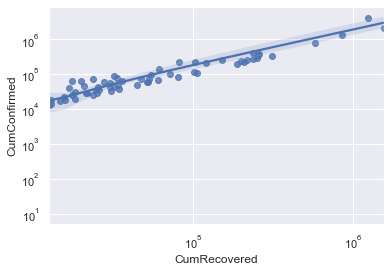

In [786]:
import seaborn as sns; sns.set(color_codes=True)
tips = sns.load_dataset("tips")
ax = sns.regplot(x="CumRecovered", y="CumConfirmed", data=df_tails)
ax.set(xscale="log", yscale="log")

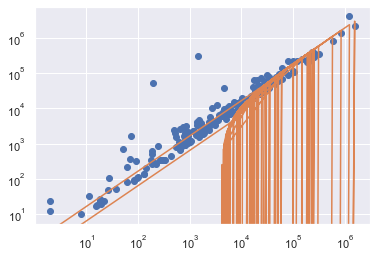

In [795]:
x = df_tails["CumRecovered"]
y = df_tails["CumConfirmed"]
plt.xscale('log')
plt.yscale('log')
plt.plot(x, y, 'o')


m, b = np.polyfit(x, y, 1)



plt.plot(x, m*x + b)

In [797]:
# import seaborn as sns; sns.set(color_codes=True)
# tips = sns.load_dataset("tips")
# ax = sns.regplot(x="Population", y="CumConfirmed", data=df_tails)
import plotly.express as px

# df = px.data.tips()
fig = px.scatter(df_tails, x="CumConfirmed", y="Population",trendline ='lowess', log_x=True,log_y=True)

#, range_y= (10, 1000000), range_x=(100000, 100000000),
# log_x=True,log_y=True                  
#      

fig.show()

In [781]:
fig = px.scatter(df_tails, x="CumConfirmed", y="CumRecovered",trendline ='ols', log_x=True,log_y=True)
fig.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df_tails["Population"], df_tails["CumConfirmed"])

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(df_tails["Population"], y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

In [93]:
#### Visualization 8: Trying

In [94]:
# from scipy.stats import pearsonr

# # corr= pearsonr(df_tails["Population"], df_tails["CumConfirmed"])
# # print('Pearsons correlation: %.3f' % corr)
# df_tails["Population"].corr(df_tails["CumConfirmed"]) # 0.33
# df_tails["Population"].corr(df_tails["Score/100"]) # 0.09
# df_tails["Population"].corr(df_tails["RecoveryRate"]) #0.013

# df_tails["Pop_Density"].corr(df_tails["CumConfirmed"]) # -0.02
# df_tails["RecoveryRate"].corr(df_tails["CumTesting_per_CumConfirmed"]) # 0.26

# df_tails["Score/100"].corr(df_tails["CumTesting_per_CumConfirmed"]) # 0.17
# df_tails["Score/100"].corr(df_tails["RecoveryRate"]) # 0.26
# df_tails["Score/100"].corr(df_tails["CumTesting"]) # 0.27
# df_tails["Score/100"].corr(df_tails["RecoveryRate"]) # 0.27


In [95]:
# # from matplotlib import pyplot
# # pyplot.scatter(df_tails["Population"], df_tails["Score/100"])
# # pyplot.show()
# p9 = figure(x_axis_label = 'Score/100' , y_axis_label ="CumTesting_per_CumConfirmed" , y_axis_type ="linear",x_axis_type ="linear",title =('Correlation between Population and Health Capacity Score') ) #creating figure object 
# # Plotting the graph
# p9.circle(x="Score/100", y = "CumTesting_per_CumConfirmed", size =10, fill_alpha = 0.7,  
#                    source = ColumnDataSource(df_tails))
# # Axes Geometry
#     # p3.x_range = DataRange1d(start = 0, end = 1000 ) # x_range changes according to the active legends
# # p9.y_range = DataRange1d(start = 1000000, end = 50000000, only_visible=True) # y_range changes according to the active legends
# p9.x_range = DataRange1d(only_visible=True)

# # Displaying the layout
# show(p9) 

In [96]:
# mypalette = ['wheat', 'wheat', 'yellow', 'red', 'green']
# mypalette = ["grey", Viridis[6][5], Viridis[6][4], Viridis[6][3], Viridis[6][2]]
# mypalette = ["grey", Magma[7][2], Magma[7][4], Magma[7][5], Magma[7][6]]

# color_mapper = LinearColorMapper(palette = mypalette,low = 0, high = max(df_tails["TestingRate"]))
# color_bar = ColorBar(color_mapper=color_mapper, location = (0,0))

# p3.circle(x='Pop_Density', y="Confirmed", source=df, size = 8, color={'field': 'TestingRate', 'transform': color_mapper},
#           legend_label = "TestingColor", line_color = "black",line_dash = (4,2), alpha = 0.6
#          )
          #, color=factor_cmap('TestingStatus', mypalette, TestingStatusLevels)) # plotting the data using glyph circle
    

#     legend.background_fill_color = "#1f77b4"
#     legend.background_fill_alpha = 0.01
#     legend.label_text_font = "times"
#     legend.label_text_font_size = '12px'

# p4.add_layout(color_bar, 'right')


In [97]:
###### Few Insights:

# - <b>Cambodia</b> has Recovered cases ~ Confirmed Cases but Testing is 0
# Many countries like this


# - <b>Eritria</b> - 1st East African country to tackle COVID-19
# - <b>Fiji, New Zealand, Lesotho, Seychelles</b>: COVID-19 Free
# - <b>Vatican City, Papua New Guinea, Saint Kitts and Nevis, Saint Lucid</b> : Confirmed Cases = Recovered -cases but officially not yet COVID free.
# - <b>Laos</b>: Confirmed Cases = Recovered cases but guessed untrue


# - <b>Iceland, Taiwan</b>: Recovered cases ~ Confirmed Cases

# - <b>Central African Republic, Guinea Bissau, Haiti, Hondurus, Mauritania, Nepal, Zimbabwe</b>:
# Recovered Cases  << compared to confirmed cases


# - <b>Germany, Ireland, Sweden, Singapore, Netherland</b>: Have similar pattern in Testing Counts.
# - <b>Japan, Thailand </b> also have similar pattern in testing.


# - <b>South Sudan,Yemen, UK </b>: Deaths > Recovered Cases


# - <b>Norway</b>: Recovered Cases shoot on 1 single day
# - <b>MS Zaandam</b>: Cruise data
